In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
strings = """[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 40 #100
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[7925, 7250, 2101, 4737, 8784, 5294, 4062, 1796, 2209, 9786, 1793, 722, 2093, 4088, 7366, 1141, 4640, 6958, 986, 4046]
log initialized
Average similarity between family members is 0.9760931406947249 at temperature -1
Average similarity between family and home is 0.9998514519622904 at temperature -1
Average similarity between students and their classroom is 0.7706401236851088 at temperature -1
Average classroom occupancy is 4.477611940298507 and number classrooms is 67
Average similarity between workers is 0.9561132418109008 at temperature -1
Average office occupancy is 3.505434782608696 and number offices is 184
Average friend similarity for adults: 0.8599675019142051 for kids: 0.7307157012972143
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 8 people.
Total of 8 people allocated in this district.
, 
Home (1,0) district with 1 Buildi

avg restaurant similarity 0.6710407954417977
avg restaurant similarity 0.6473221545786129
avg restaurant similarity 0.6979321864220105
avg restaurant similarity 0.7024039290434856
avg restaurant similarity 0.6488395501180187
avg restaurant similarity 0.6629534162988165
avg restaurant similarity 0.6683839213413485
avg restaurant similarity 0.6683312715839352
avg restaurant similarity 0.6316338341053245
avg restaurant similarity 0.6753975455432886
avg restaurant similarity 0.6584512461147072
avg restaurant similarity 0.676706859665719
avg restaurant similarity 0.6878308046539067
avg restaurant similarity 0.6664179097097135
avg restaurant similarity 0.6341927429289003
avg restaurant similarity 0.6819985706727574
avg restaurant similarity 0.663930694848026
avg restaurant similarity 0.6683997531828633
avg restaurant similarity 0.6576420709709156
avg restaurant similarity 0.6653771450310313
avg restaurant similarity 0.6738536365405258
avg restaurant similarity 0.6772691236589322
avg restaura

avg restaurant similarity 0.6603896080811131
avg restaurant similarity 0.6523363450440415
avg restaurant similarity 0.6300947985102567
avg restaurant similarity 0.6939233284483138
avg restaurant similarity 0.6716137166755622
avg restaurant similarity 0.7153355149426165
avg restaurant similarity 0.6664052568576139
avg restaurant similarity 0.6764055484247995
avg restaurant similarity 0.6704745863464309
avg restaurant similarity 0.652463727426996
avg restaurant similarity 0.6685314778970787
avg restaurant similarity 0.6304669194600077
avg restaurant similarity 0.6539013781515024
avg restaurant similarity 0.6122159275159474
avg restaurant similarity 0.703729300631033
avg restaurant similarity 0.6437603716442276
avg restaurant similarity 0.6403008048053335
avg restaurant similarity 0.6628856245950696
avg restaurant similarity 0.6407181328123628
avg restaurant similarity 0.6471401195152997
avg restaurant similarity 0.6326206930183707
avg restaurant similarity 0.6358905263188824
avg restaura

avg restaurant similarity 0.6583508466450264
avg restaurant similarity 0.7163379942508354
avg restaurant similarity 0.6940563671478689
avg restaurant similarity 0.6455417108676924
avg restaurant similarity 0.6608579081355181
avg restaurant similarity 0.6512306028879228
avg restaurant similarity 0.6682197252106475
avg restaurant similarity 0.6400496749446013
avg restaurant similarity 0.7122453488644339
avg restaurant similarity 0.669932170069743
avg restaurant similarity 0.6655887967082398
avg restaurant similarity 0.5898322046690193
avg restaurant similarity 0.6868412136096382
avg restaurant similarity 0.6480032532530261
avg restaurant similarity 0.6824032898615567
avg restaurant similarity 0.6134973317300424
avg restaurant similarity 0.6242089054185213
avg restaurant similarity 0.6919013250498225
avg restaurant similarity 0.6342594828067009
avg restaurant similarity 0.6544003726696226
avg restaurant similarity 0.6138649513252321
avg restaurant similarity 0.6471160145669379
avg restaur

avg restaurant similarity 0.6495284314847853
avg restaurant similarity 0.6433690343334709
avg restaurant similarity 0.6656539439823603
avg restaurant similarity 0.6121653390346646
avg restaurant similarity 0.6546529332269306
avg restaurant similarity 0.6506868306373016
avg restaurant similarity 0.6688934142496388
avg restaurant similarity 0.6774951890797335
avg restaurant similarity 0.6612009085912613
avg restaurant similarity 0.7050866196459624
avg restaurant similarity 0.6646699677796251
avg restaurant similarity 0.701511681172631
avg restaurant similarity 0.6494564431676872
avg restaurant similarity 0.6406764858773774
avg restaurant similarity 0.7134432271918302
avg restaurant similarity 0.6680026140969952
avg restaurant similarity 0.7095514636495093
avg restaurant similarity 0.6643328133946849
avg restaurant similarity 0.6717241572395464
avg restaurant similarity 0.6322272867431313
avg restaurant similarity 0.6784281728320893
avg restaurant similarity 0.6633384372486986
avg restaur

avg restaurant similarity 0.6829012764136361
avg restaurant similarity 0.6796642619088248
avg restaurant similarity 0.6734412354469258
avg restaurant similarity 0.665443958883698
avg restaurant similarity 0.6749624439584633
avg restaurant similarity 0.6833880637309164
avg restaurant similarity 0.6961805161502441
avg restaurant similarity 0.6808689137423248
avg restaurant similarity 0.6306907597078311
avg restaurant similarity 0.7104036024159849
avg restaurant similarity 0.6927289519794539
avg restaurant similarity 0.6859577976343854
avg restaurant similarity 0.7379673583049607
avg restaurant similarity 0.7351839849955236
avg restaurant similarity 0.7154169939790834
avg restaurant similarity 0.6865193721367202
avg restaurant similarity 0.6700206585466546
avg restaurant similarity 0.6912475653217245
avg restaurant similarity 0.7159502741160356
avg restaurant similarity 0.7024186675606758
avg restaurant similarity 0.7374000772122561
avg restaurant similarity 0.6759012400838821
avg restaur

avg restaurant similarity 0.7033197614240857
avg restaurant similarity 0.6221223050335092
avg restaurant similarity 0.6979007136048382
avg restaurant similarity 0.6930889932765557
avg restaurant similarity 0.6749474427179014
avg restaurant similarity 0.726359329907346
avg restaurant similarity 0.6494953151358478
avg restaurant similarity 0.708185792683982
avg restaurant similarity 0.6192941235810959
avg restaurant similarity 0.7063887560490761
avg restaurant similarity 0.7001250118066407
avg restaurant similarity 0.697917173473333
avg restaurant similarity 0.641580515815175
avg restaurant similarity 0.6878197965656931
avg restaurant similarity 0.7214510410371119
avg restaurant similarity 0.6894153894523809
avg restaurant similarity 0.6517630541707405
avg restaurant similarity 0.7280658518202796
avg restaurant similarity 0.757453153542748
avg restaurant similarity 0.6561938552818422
avg restaurant similarity 0.7062624134065689
avg restaurant similarity 0.704055839734031
avg restaurant s

avg restaurant similarity 0.6635056052350012
avg restaurant similarity 0.7169956870526449
avg restaurant similarity 0.7075075035176082
avg restaurant similarity 0.7242040142120417
avg restaurant similarity 0.7118929076829905
avg restaurant similarity 0.6556705924722026
avg restaurant similarity 0.6624659177860845
avg restaurant similarity 0.6761347332907154
avg restaurant similarity 0.690520568893432
avg restaurant similarity 0.6783208571907623
avg restaurant similarity 0.6973527721620729
avg restaurant similarity 0.6685656546824006
avg restaurant similarity 0.6746959566824042
avg restaurant similarity 0.7017383497535855
avg restaurant similarity 0.6640224202528631
avg restaurant similarity 0.6634852742598835
avg restaurant similarity 0.659990569218297
avg restaurant similarity 0.7192815085245793
avg restaurant similarity 0.7013262195115733
avg restaurant similarity 0.6455998340251491
avg restaurant similarity 0.6723438460035097
avg restaurant similarity 0.7113154020091679
avg restaura

avg restaurant similarity 0.7474128744977996
avg restaurant similarity 0.680949380922185
avg restaurant similarity 0.6834240649126958
avg restaurant similarity 0.6955092400953358
avg restaurant similarity 0.658318338760423
avg restaurant similarity 0.7633477427209414
avg restaurant similarity 0.6901136431136795
avg restaurant similarity 0.7467492864730836
avg restaurant similarity 0.6337561751371129
avg restaurant similarity 0.6932737283746179
avg restaurant similarity 0.6883410858371759
avg restaurant similarity 0.6347531404445159
avg restaurant similarity 0.6822097565758225
avg restaurant similarity 0.6898069007138494
avg restaurant similarity 0.6781310334609727
avg restaurant similarity 0.6460649225233875
avg restaurant similarity 0.7097550178945506
avg restaurant similarity 0.6211798342679511
avg restaurant similarity 0.6767953805015203
avg restaurant similarity 0.6769118400963553
avg restaurant similarity 0.6485019299449181
avg restaurant similarity 0.6889581978967835
avg restaura

avg restaurant similarity 0.6407885965014996
avg restaurant similarity 0.6870058242234209
avg restaurant similarity 0.6597413267333505
avg restaurant similarity 0.6813683563888739
avg restaurant similarity 0.655005278221373
avg restaurant similarity 0.6794046122832351
avg restaurant similarity 0.695635207877728
avg restaurant similarity 0.6650930266909192
avg restaurant similarity 0.6357802551203913
avg restaurant similarity 0.6516173833307739
avg restaurant similarity 0.6685237592542018
avg restaurant similarity 0.6714604205987008
avg restaurant similarity 0.6388295611052875
avg restaurant similarity 0.6252264020499679
avg restaurant similarity 0.6215571147811397
avg restaurant similarity 0.6574329664912629
avg restaurant similarity 0.6274568491053785
avg restaurant similarity 0.6937239264377026
avg restaurant similarity 0.6606335500014248
avg restaurant similarity 0.670403766859072
avg restaurant similarity 0.6890799788782114
avg restaurant similarity 0.7004491911732338
avg restauran

avg restaurant similarity 0.6811935013181882
avg restaurant similarity 0.6499927321751519
avg restaurant similarity 0.6426598511578672
avg restaurant similarity 0.6976968725367277
avg restaurant similarity 0.6715166218886384
avg restaurant similarity 0.6095159053792859
avg restaurant similarity 0.6210223243490615
avg restaurant similarity 0.6477466947416237
avg restaurant similarity 0.6546310166674754
avg restaurant similarity 0.6241518876557246
avg restaurant similarity 0.7045956345293718
avg restaurant similarity 0.6624030544828655
avg restaurant similarity 0.656505837388098
avg restaurant similarity 0.6463089922855102
avg restaurant similarity 0.6734252633273448
avg restaurant similarity 0.624777667302819
avg restaurant similarity 0.5943775206625147
avg restaurant similarity 0.6664523310377903
avg restaurant similarity 0.639136789744327
avg restaurant similarity 0.6759222497052884
avg restaurant similarity 0.6540349787853008
avg restaurant similarity 0.6262820224991741
avg restauran

avg restaurant similarity 0.6030309682983723
avg restaurant similarity 0.6731206786735805
avg restaurant similarity 0.6518268597551827
avg restaurant similarity 0.6661386879895383
avg restaurant similarity 0.6325406340082642
avg restaurant similarity 0.6147314206130525
avg restaurant similarity 0.6752452238676183
avg restaurant similarity 0.628566153594006
avg restaurant similarity 0.6441806764172716
avg restaurant similarity 0.6503452192140404
avg restaurant similarity 0.6872021673981368
avg restaurant similarity 0.5940267047695075
avg restaurant similarity 0.6044132706175741
avg restaurant similarity 0.6262168372341301
avg restaurant similarity 0.6008613299632901
avg restaurant similarity 0.6193483139752806
avg restaurant similarity 0.655102342198163
avg restaurant similarity 0.6585981989691467
avg restaurant similarity 0.6159331411803107
avg restaurant similarity 0.6490267525253879
avg restaurant similarity 0.5369782224606021
avg restaurant similarity 0.5760069495298219
avg restaura

avg restaurant similarity 0.6412781323924626
avg restaurant similarity 0.6714532176218012
avg restaurant similarity 0.6267550282147306
avg restaurant similarity 0.576987559654252
avg restaurant similarity 0.6332835840554454
avg restaurant similarity 0.6594495271582492
avg restaurant similarity 0.6056315674104076
avg restaurant similarity 0.6141806734102594
avg restaurant similarity 0.6404756365131471
avg restaurant similarity 0.6473846099851763
avg restaurant similarity 0.6470477563257994
avg restaurant similarity 0.6237681144871197
avg restaurant similarity 0.5999763109209585
avg restaurant similarity 0.6083558473123489
avg restaurant similarity 0.6683408207978717
avg restaurant similarity 0.6255287209747492
avg restaurant similarity 0.6599836070446569
avg restaurant similarity 0.6118957871773392
avg restaurant similarity 0.6392495197032078
avg restaurant similarity 0.6545435535177371
avg restaurant similarity 0.6450292611338991
avg restaurant similarity 0.6253411350404223
avg restaur

avg restaurant similarity 0.6645472278573044
avg restaurant similarity 0.6614021677803055
avg restaurant similarity 0.6509235075304795
avg restaurant similarity 0.6621887225587334
avg restaurant similarity 0.617788241275589
avg restaurant similarity 0.6599249651969683
avg restaurant similarity 0.6512225761151204
avg restaurant similarity 0.6152886226970851
avg restaurant similarity 0.6988729841981296
avg restaurant similarity 0.6686767114697657
avg restaurant similarity 0.6839760223655399
avg restaurant similarity 0.6673789857290662
avg restaurant similarity 0.7040276155495158
avg restaurant similarity 0.6397125881098634
avg restaurant similarity 0.6730570769786891
avg restaurant similarity 0.7053530003073677
avg restaurant similarity 0.6868799881270673
avg restaurant similarity 0.6307120762707991
avg restaurant similarity 0.6343490949469262
avg restaurant similarity 0.6688615055773557
avg restaurant similarity 0.7093708962929864
avg restaurant similarity 0.6765251414877993
avg restaur

avg restaurant similarity 0.6954946870324193
avg restaurant similarity 0.6495329464406047
avg restaurant similarity 0.6105686193916289
avg restaurant similarity 0.6649692397446101
avg restaurant similarity 0.6574336705983913
avg restaurant similarity 0.6758146959125949
avg restaurant similarity 0.6956493420711939
avg restaurant similarity 0.6771520572898488
avg restaurant similarity 0.6801983077137989
avg restaurant similarity 0.6975372304273192
avg restaurant similarity 0.6563719393424007
avg restaurant similarity 0.6740923182374947
avg restaurant similarity 0.660409505357254
avg restaurant similarity 0.685398101202624
avg restaurant similarity 0.7022213695034922
avg restaurant similarity 0.6971130424692186
avg restaurant similarity 0.6673005947694062
avg restaurant similarity 0.6362213327483522
avg restaurant similarity 0.6623311908194982
avg restaurant similarity 0.715140305968617
avg restaurant similarity 0.6994039262368877
avg restaurant similarity 0.7002869477597969
avg restauran

avg restaurant similarity 0.6641246497294019
avg restaurant similarity 0.6894763266538882
avg restaurant similarity 0.7041373176489578
avg restaurant similarity 0.7224335328368083
avg restaurant similarity 0.6649533434635908
avg restaurant similarity 0.6680131003822141
avg restaurant similarity 0.6849047909288077
avg restaurant similarity 0.6639746501307261
avg restaurant similarity 0.7015471745446806
avg restaurant similarity 0.7252781990421545
avg restaurant similarity 0.6796734471471654
avg restaurant similarity 0.681147472425788
avg restaurant similarity 0.7504541260361538
avg restaurant similarity 0.7163373727091965
avg restaurant similarity 0.6568062048541501
avg restaurant similarity 0.6948527497143389
avg restaurant similarity 0.6611974511873796
avg restaurant similarity 0.6929446723927164
avg restaurant similarity 0.7138759844670576
avg restaurant similarity 0.6560332162342369
avg restaurant similarity 0.7078407772219082
avg restaurant similarity 0.692917603983298
avg restaura

avg restaurant similarity 0.6417011409387539
avg restaurant similarity 0.6836900233234434
avg restaurant similarity 0.658755841213362
avg restaurant similarity 0.6784499814669189
avg restaurant similarity 0.7036491994060581
avg restaurant similarity 0.6989775889324088
avg restaurant similarity 0.6486149721616372
avg restaurant similarity 0.7071623316351751
avg restaurant similarity 0.7107738121734127
avg restaurant similarity 0.6357063145763855
avg restaurant similarity 0.6887474831721312
avg restaurant similarity 0.6950373295288591
avg restaurant similarity 0.6623215929527024
avg restaurant similarity 0.6950031329592545
avg restaurant similarity 0.6925749096708906
avg restaurant similarity 0.6806925663392703
avg restaurant similarity 0.6969731741789766
avg restaurant similarity 0.6714488599281419
avg restaurant similarity 0.6858394027844539
avg restaurant similarity 0.6825435458497577
avg restaurant similarity 0.6616583609399281
avg restaurant similarity 0.6867309271329102
avg restaur

avg restaurant similarity 0.6938741746655356
avg restaurant similarity 0.683464192350743
avg restaurant similarity 0.6707698283902873
avg restaurant similarity 0.6410076906892342
avg restaurant similarity 0.6252207361763159
avg restaurant similarity 0.6712214658540769
avg restaurant similarity 0.6375896692413188
avg restaurant similarity 0.6370555411039212
avg restaurant similarity 0.6479105803682321
avg restaurant similarity 0.6310639698023771
avg restaurant similarity 0.6401576920115237
avg restaurant similarity 0.6655111332703368
avg restaurant similarity 0.5959270010793188
avg restaurant similarity 0.6814098038152462
avg restaurant similarity 0.6194358837248212
avg restaurant similarity 0.6534759424469643
avg restaurant similarity 0.6600037475951095
avg restaurant similarity 0.6260087765770288
avg restaurant similarity 0.6609141156519095
avg restaurant similarity 0.6513450985418484
avg restaurant similarity 0.6616389057729488
avg restaurant similarity 0.6519890725553023
avg restaur

avg restaurant similarity 0.7197993306209289
avg restaurant similarity 0.7151798822313107
avg restaurant similarity 0.7220401699139775
avg restaurant similarity 0.6929497734492377
avg restaurant similarity 0.6790132839642112
avg restaurant similarity 0.7234497118835324
avg restaurant similarity 0.6817343476110092
avg restaurant similarity 0.6635390545223935
avg restaurant similarity 0.7149171859737248
avg restaurant similarity 0.7225451254920584
avg restaurant similarity 0.6596841879047936
avg restaurant similarity 0.7113163984006009
avg restaurant similarity 0.6850185099875524
avg restaurant similarity 0.7117297029994705
avg restaurant similarity 0.6860588080902642
avg restaurant similarity 0.6859974233395097
avg restaurant similarity 0.6568375873542962
avg restaurant similarity 0.653913886497435
avg restaurant similarity 0.6989506961512988
avg restaurant similarity 0.6956490332896773
avg restaurant similarity 0.6793137095545991
avg restaurant similarity 0.677490595566478
avg restaura

avg restaurant similarity 0.7161350332634512
avg restaurant similarity 0.7010084640860084
avg restaurant similarity 0.6908417133840328
avg restaurant similarity 0.7413002285645179
avg restaurant similarity 0.7430482770333966
avg restaurant similarity 0.7256115635412791
avg restaurant similarity 0.733940045549601
avg restaurant similarity 0.6763210819830666
avg restaurant similarity 0.6610367543859337
avg restaurant similarity 0.7320773175865993
avg restaurant similarity 0.7221633760548333
avg restaurant similarity 0.7062304119377125
avg restaurant similarity 0.7078215102381006
avg restaurant similarity 0.6706268951640335
avg restaurant similarity 0.7247023005749531
avg restaurant similarity 0.6363985949288904
avg restaurant similarity 0.7053947725470228
avg restaurant similarity 0.7191934469856451
avg restaurant similarity 0.7081826548745646
avg restaurant similarity 0.6811353936672355
avg restaurant similarity 0.6907375171986466
avg restaurant similarity 0.6895115657842015
avg restaur

avg restaurant similarity 0.6809983785502381
avg restaurant similarity 0.745849178941373
avg restaurant similarity 0.6860167271050622
avg restaurant similarity 0.7309629183418258
avg restaurant similarity 0.671985579339311
avg restaurant similarity 0.7118181369572713
avg restaurant similarity 0.735480683868423
avg restaurant similarity 0.6847869060422003
avg restaurant similarity 0.750861785286185
avg restaurant similarity 0.7450942565589805
avg restaurant similarity 0.7059918015741081
avg restaurant similarity 0.734100742337154
avg restaurant similarity 0.7371045726283761
avg restaurant similarity 0.7133220973420411
avg restaurant similarity 0.7140055721883262
avg restaurant similarity 0.7015007663092299
avg restaurant similarity 0.7058720162379827
avg restaurant similarity 0.7074448595489714
avg restaurant similarity 0.7372397460322917
avg restaurant similarity 0.6901368073694537
avg restaurant similarity 0.7355699304731338
avg restaurant similarity 0.7100430642192206
avg restaurant 

avg restaurant similarity 0.6900332480805962
avg restaurant similarity 0.658075126787591
avg restaurant similarity 0.7084993416156662
avg restaurant similarity 0.6742843029802918
avg restaurant similarity 0.6758397551171499
avg restaurant similarity 0.6668440015353246
avg restaurant similarity 0.6407017327170668
avg restaurant similarity 0.7050521545602692
avg restaurant similarity 0.7071969107183731
avg restaurant similarity 0.6827946109037958
avg restaurant similarity 0.6404229823604946
avg restaurant similarity 0.6657598306757102
avg restaurant similarity 0.6971569943743321
avg restaurant similarity 0.6675632456238187
avg restaurant similarity 0.6471564342278368
avg restaurant similarity 0.6592906695903711
avg restaurant similarity 0.7017711917170355
avg restaurant similarity 0.6859610458320531
avg restaurant similarity 0.6562841714475881
avg restaurant similarity 0.6428916455012957
avg restaurant similarity 0.6880477752824324
avg restaurant similarity 0.6635299508582176
avg restaur

avg restaurant similarity 0.7087533988268131
avg restaurant similarity 0.7401533443258691
avg restaurant similarity 0.6865115079941462
avg restaurant similarity 0.7001241302940767
avg restaurant similarity 0.6894359556948763
avg restaurant similarity 0.7056647405111217
avg restaurant similarity 0.6843750486780833
avg restaurant similarity 0.6650814790456002
avg restaurant similarity 0.7128452340980334
avg restaurant similarity 0.6975020263559472
avg restaurant similarity 0.724820103237776
avg restaurant similarity 0.7577418843472302
avg restaurant similarity 0.7146285682040676
avg restaurant similarity 0.713313512869338
avg restaurant similarity 0.663175082858303
avg restaurant similarity 0.6941027899525318
avg restaurant similarity 0.7101249561142469
avg restaurant similarity 0.6660841791279261
avg restaurant similarity 0.6787804566824542
avg restaurant similarity 0.6700933961154955
avg restaurant similarity 0.6856198819711264
avg restaurant similarity 0.6822503054849888
avg restauran

avg restaurant similarity 0.6325183889208389
avg restaurant similarity 0.612711992816914
avg restaurant similarity 0.6282471211136328
avg restaurant similarity 0.6059540412895765
avg restaurant similarity 0.6520235345895709
avg restaurant similarity 0.649815090175902
avg restaurant similarity 0.6332709933872784
avg restaurant similarity 0.6324455312724019
avg restaurant similarity 0.6657958159098899
avg restaurant similarity 0.6446162654799786
avg restaurant similarity 0.6702575721149001
avg restaurant similarity 0.6650222046610733
avg restaurant similarity 0.6390242673155916
avg restaurant similarity 0.6789110280903616
avg restaurant similarity 0.6311034257781468
avg restaurant similarity 0.6447776942877999
avg restaurant similarity 0.6729481398802076
avg restaurant similarity 0.603686326696278
avg restaurant similarity 0.6537552953573755
avg restaurant similarity 0.6166024737832511
avg restaurant similarity 0.6561977732311619
avg restaurant similarity 0.6613660270387667
avg restauran

avg restaurant similarity 0.6319625362886988
avg restaurant similarity 0.6196411942638773
avg restaurant similarity 0.7123410545741365
avg restaurant similarity 0.6590091808709175
avg restaurant similarity 0.6850306344915038
avg restaurant similarity 0.6729001806763372
avg restaurant similarity 0.6329831564986085
avg restaurant similarity 0.6823928034940234
avg restaurant similarity 0.7203232436483242
avg restaurant similarity 0.6383906030665305
avg restaurant similarity 0.6566548600491418
avg restaurant similarity 0.6457009312355926
avg restaurant similarity 0.6576052392461321
avg restaurant similarity 0.7544482238573189
avg restaurant similarity 0.6428087424917918
avg restaurant similarity 0.6712733825313302
avg restaurant similarity 0.7026125676677724
avg restaurant similarity 0.6564103158958254
avg restaurant similarity 0.6526445635606478
avg restaurant similarity 0.5878136834765242
avg restaurant similarity 0.6396877588348906
avg restaurant similarity 0.6583369965953767
avg restau

avg restaurant similarity 0.6508233343859529
avg restaurant similarity 0.6150347975549341
avg restaurant similarity 0.6069939219613805
avg restaurant similarity 0.696696293435112
avg restaurant similarity 0.6187888361839189
avg restaurant similarity 0.7156975430872691
avg restaurant similarity 0.7074889670875417
avg restaurant similarity 0.6516631218610086
avg restaurant similarity 0.6804884747637656
avg restaurant similarity 0.616815904687633
avg restaurant similarity 0.6433757553116396
avg restaurant similarity 0.6821423796953239
avg restaurant similarity 0.6128012394223812
avg restaurant similarity 0.678708802205409
avg restaurant similarity 0.6379707175159791
avg restaurant similarity 0.6644331690466049
avg restaurant similarity 0.6134506917423662
avg restaurant similarity 0.6202677198932826
avg restaurant similarity 0.6350679047097325
avg restaurant similarity 0.6539292072146503
avg restaurant similarity 0.6073437912750843
avg restaurant similarity 0.6793948902994703
avg restauran

avg restaurant similarity 0.6688781370616036
avg restaurant similarity 0.6190466286455769
avg restaurant similarity 0.6138902907471074
avg restaurant similarity 0.5990308774388935
avg restaurant similarity 0.6166546833037415
avg restaurant similarity 0.6058333929029441
avg restaurant similarity 0.6801348464833807
avg restaurant similarity 0.663543421812951
avg restaurant similarity 0.5981963324303768
avg restaurant similarity 0.6756906536192027
avg restaurant similarity 0.6298565079577354
avg restaurant similarity 0.6557947182894527
avg restaurant similarity 0.6655165510850223
avg restaurant similarity 0.6868468629342857
avg restaurant similarity 0.6665391414618822
avg restaurant similarity 0.6334731866269495
avg restaurant similarity 0.5920029450755263
avg restaurant similarity 0.5852452636937175
avg restaurant similarity 0.5935892477311755
avg restaurant similarity 0.6393132630273217
avg restaurant similarity 0.6708729420345425
avg restaurant similarity 0.5970654420490148
avg restaur

avg restaurant similarity 0.6524635411464812
avg restaurant similarity 0.6728450211703685
avg restaurant similarity 0.6731934610032686
avg restaurant similarity 0.6269239287393864
avg restaurant similarity 0.6218714033152761
avg restaurant similarity 0.6507040789867237
avg restaurant similarity 0.6442844445397552
avg restaurant similarity 0.6804934080723102
avg restaurant similarity 0.6250369874931453
avg restaurant similarity 0.6553444753239435
avg restaurant similarity 0.6650711651594358
avg restaurant similarity 0.6641411243302829
avg restaurant similarity 0.6294103615306207
avg restaurant similarity 0.6478671687410877
avg restaurant similarity 0.6515059039345742
avg restaurant similarity 0.7485997721940277
avg restaurant similarity 0.6297817623122031
avg restaurant similarity 0.6540875135243469
avg restaurant similarity 0.6569875183170811
avg restaurant similarity 0.6646583618555244
avg restaurant similarity 0.6619953612844299
avg restaurant similarity 0.6569895701031571
avg restau

avg restaurant similarity 0.6105616378519259
avg restaurant similarity 0.6799748613045341
avg restaurant similarity 0.5857139935283447
avg restaurant similarity 0.6163381107560724
avg restaurant similarity 0.6124046561094553
avg restaurant similarity 0.64135848983066
avg restaurant similarity 0.6316820088070706
avg restaurant similarity 0.688042324892302
avg restaurant similarity 0.6346168467295524
avg restaurant similarity 0.647783207184798
avg restaurant similarity 0.6941472641101794
avg restaurant similarity 0.6427918115538861
avg restaurant similarity 0.6487895022329694
avg restaurant similarity 0.6374510323838792
avg restaurant similarity 0.6331638823102755
avg restaurant similarity 0.6255810666004974
avg restaurant similarity 0.6576001875765689
avg restaurant similarity 0.6828615042696456
avg restaurant similarity 0.6310775513440703
avg restaurant similarity 0.6652069220569268
avg restaurant similarity 0.6591096526922394
avg restaurant similarity 0.6852316366838007
avg restaurant

avg restaurant similarity 0.6892661027863186
avg restaurant similarity 0.6866484108471308
avg restaurant similarity 0.6771485531803009
avg restaurant similarity 0.7080698438257589
avg restaurant similarity 0.7015680277977085
avg restaurant similarity 0.6926588410924149
avg restaurant similarity 0.7015350666421724
avg restaurant similarity 0.6378362576929848
avg restaurant similarity 0.6950911893400992
avg restaurant similarity 0.7055036756153
avg restaurant similarity 0.6997645909220491
avg restaurant similarity 0.7140279131569548
avg restaurant similarity 0.6999754944738359
avg restaurant similarity 0.6981972389607679
avg restaurant similarity 0.6625099823473573
avg restaurant similarity 0.6924522515528925
avg restaurant similarity 0.6863345908474748
avg restaurant similarity 0.700374228436922
avg restaurant similarity 0.7147610233416092
avg restaurant similarity 0.6780793370439855
avg restaurant similarity 0.6914758551721522
avg restaurant similarity 0.7196427371393794
avg restaurant

avg restaurant similarity 0.6995985001607393
avg restaurant similarity 0.725273598987707
avg restaurant similarity 0.6634853345514928
avg restaurant similarity 0.7127429597962268
avg restaurant similarity 0.7129881374991088
avg restaurant similarity 0.6846499932113254
avg restaurant similarity 0.7207898642387268
avg restaurant similarity 0.6629696518769486
avg restaurant similarity 0.703014272140404
avg restaurant similarity 0.6627752096582477
avg restaurant similarity 0.6974770987942815
avg restaurant similarity 0.700509391283726
avg restaurant similarity 0.6943784965304801
avg restaurant similarity 0.6673711983620085
avg restaurant similarity 0.6540353699890035
avg restaurant similarity 0.6665143170674166
avg restaurant similarity 0.6706366452159827
avg restaurant similarity 0.7229263828478472
avg restaurant similarity 0.6950295978287738
avg restaurant similarity 0.6887599825017283
avg restaurant similarity 0.6802950248350227
avg restaurant similarity 0.70013716319912
avg restaurant 

avg restaurant similarity 0.6147079215066479
avg restaurant similarity 0.6226384209349846
avg restaurant similarity 0.6509928942208101
avg restaurant similarity 0.5936267650099406
avg restaurant similarity 0.5986259803139794
avg restaurant similarity 0.6027679765903176
avg restaurant similarity 0.6015467772901775
avg restaurant similarity 0.6177490185295935
avg restaurant similarity 0.6035826106872018
avg restaurant similarity 0.634167305918289
avg restaurant similarity 0.6436021519917247
avg restaurant similarity 0.6263454868042894
avg restaurant similarity 0.6144176092915538
avg restaurant similarity 0.5566203459976986
avg restaurant similarity 0.565280757394513
avg restaurant similarity 0.6042430740823991
avg restaurant similarity 0.6120305061199014
avg restaurant similarity 0.5466647682761744
avg restaurant similarity 0.6432200375402685
avg restaurant similarity 0.628589442074857
avg restaurant similarity 0.5918696415656631
avg restaurant similarity 0.6193248550629286
avg restauran

avg restaurant similarity 0.6151781341861853
avg restaurant similarity 0.6369863367460408
avg restaurant similarity 0.6627642214459455
avg restaurant similarity 0.6059927619611452
avg restaurant similarity 0.6097459063765208
avg restaurant similarity 0.6327992497150281
avg restaurant similarity 0.5876170151874787
avg restaurant similarity 0.5877610325070195
avg restaurant similarity 0.6002405737187719
avg restaurant similarity 0.678581866466535
avg restaurant similarity 0.6047338732812467
avg restaurant similarity 0.6360113529242439
avg restaurant similarity 0.6312818218929235
avg restaurant similarity 0.5984886728547463
avg restaurant similarity 0.5484652678840567
avg restaurant similarity 0.6092700954355994
avg restaurant similarity 0.5622244441380176
avg restaurant similarity 0.6345131775303523
avg restaurant similarity 0.5914735127401403
avg restaurant similarity 0.6084311982371216
avg restaurant similarity 0.6234998377978632
avg restaurant similarity 0.6208998627821581
avg restaur

avg restaurant similarity 0.68255743377771
avg restaurant similarity 0.7195070045340651
avg restaurant similarity 0.6439064692980356
avg restaurant similarity 0.6581305009478179
avg restaurant similarity 0.7152342151945456
avg restaurant similarity 0.6638488181511267
avg restaurant similarity 0.6736190515266818
avg restaurant similarity 0.6614488596558892
avg restaurant similarity 0.7067486363358677
avg restaurant similarity 0.7223730602179866
avg restaurant similarity 0.6653377688624197
avg restaurant similarity 0.6682586791037219
avg restaurant similarity 0.6630268010819358
avg restaurant similarity 0.7062432967788532
avg restaurant similarity 0.6927386343125463
avg restaurant similarity 0.6195205383310414
avg restaurant similarity 0.7258412807678705
avg restaurant similarity 0.6897342436502049
avg restaurant similarity 0.6893313236510716
avg restaurant similarity 0.6566626407502475
avg restaurant similarity 0.7108295418983742
avg restaurant similarity 0.689563308429198
avg restauran

avg restaurant similarity 0.7027914002208667
avg restaurant similarity 0.720208919646362
avg restaurant similarity 0.6997248964623649
avg restaurant similarity 0.6682843312007861
avg restaurant similarity 0.6646129265210465
avg restaurant similarity 0.7128000703124769
avg restaurant similarity 0.7399062125755473
avg restaurant similarity 0.6730582333052969
avg restaurant similarity 0.689560573100278
avg restaurant similarity 0.6690233920464341
avg restaurant similarity 0.690304226631533
avg restaurant similarity 0.706161448296747
avg restaurant similarity 0.6248121259277798
avg restaurant similarity 0.6809093535427331
avg restaurant similarity 0.6358753208841916
avg restaurant similarity 0.6952419532870527
avg restaurant similarity 0.7061165550741547
avg restaurant similarity 0.6843705625071668
avg restaurant similarity 0.6722368380623213
avg restaurant similarity 0.707931636104714
avg restaurant similarity 0.7059486811268452
avg restaurant similarity 0.6539533685683313
avg restaurant 

avg restaurant similarity 0.6872833149557434
avg restaurant similarity 0.6643057796109594
avg restaurant similarity 0.6272368094605658
avg restaurant similarity 0.6846711749084375
avg restaurant similarity 0.6693280314749839
avg restaurant similarity 0.7036041504553483
avg restaurant similarity 0.6136584245359974
avg restaurant similarity 0.6717085925151483
avg restaurant similarity 0.6601725822736927
avg restaurant similarity 0.699761502920194
avg restaurant similarity 0.6745590664696156
avg restaurant similarity 0.6313160391316919
avg restaurant similarity 0.6754444015963056
avg restaurant similarity 0.6914218439802522
avg restaurant similarity 0.6563252543346754
avg restaurant similarity 0.6939053259606783
avg restaurant similarity 0.6661189444936573
avg restaurant similarity 0.6557042070152581
avg restaurant similarity 0.7394438152997589
avg restaurant similarity 0.6510895241761661
avg restaurant similarity 0.7175644446610149
avg restaurant similarity 0.6064572628446315
avg restaur

avg restaurant similarity 0.7018335877884672
avg restaurant similarity 0.6755595929238486
avg restaurant similarity 0.6883525961870259
avg restaurant similarity 0.6238833413316522
avg restaurant similarity 0.654506723233033
avg restaurant similarity 0.6418430246621003
avg restaurant similarity 0.6765623892838883
avg restaurant similarity 0.658510067501952
avg restaurant similarity 0.6843124451018521
avg restaurant similarity 0.6739517026350578
avg restaurant similarity 0.6738500635292066
avg restaurant similarity 0.6894753255143672
avg restaurant similarity 0.6825171572177718
avg restaurant similarity 0.6502735246142956
avg restaurant similarity 0.6615680253793687
avg restaurant similarity 0.6621158042063161
avg restaurant similarity 0.6638098171140664
avg restaurant similarity 0.6554869766911885
avg restaurant similarity 0.617880440627534
avg restaurant similarity 0.6577256163794749
avg restaurant similarity 0.6872864637737393
avg restaurant similarity 0.7051434676658022
avg restauran

avg restaurant similarity 0.636191551414615
avg restaurant similarity 0.6531781265425423
avg restaurant similarity 0.6549207637093958
avg restaurant similarity 0.62593755290716
avg restaurant similarity 0.6706292370571367
avg restaurant similarity 0.5986223438769004
avg restaurant similarity 0.6983144962284441
avg restaurant similarity 0.610016391029535
avg restaurant similarity 0.6493154828489374
avg restaurant similarity 0.6071275449649992
avg restaurant similarity 0.6561548708280597
avg restaurant similarity 0.6848182385811479
avg restaurant similarity 0.6177931649941217
avg restaurant similarity 0.6377720286257896
avg restaurant similarity 0.6762611348433372
avg restaurant similarity 0.7181820896424657
avg restaurant similarity 0.6806671100481813
avg restaurant similarity 0.6848009046577123
avg restaurant similarity 0.6615692543012457
avg restaurant similarity 0.5952584575299853
avg restaurant similarity 0.6465468264388936
avg restaurant similarity 0.6510896679765988
avg restaurant

avg restaurant similarity 0.7007809633526157
avg restaurant similarity 0.6468758106056458
avg restaurant similarity 0.6642753431710599
avg restaurant similarity 0.679100487818205
avg restaurant similarity 0.6618380525626212
avg restaurant similarity 0.713090156675963
avg restaurant similarity 0.5790536904587443
avg restaurant similarity 0.6687646627675121
avg restaurant similarity 0.6103735293318112
avg restaurant similarity 0.6349789533924122
avg restaurant similarity 0.6587159976391253
avg restaurant similarity 0.6724907802483797
avg restaurant similarity 0.6211954779259287
avg restaurant similarity 0.6196096051720005
avg restaurant similarity 0.6387425434085502
avg restaurant similarity 0.6789667580017835
avg restaurant similarity 0.644070947685986
avg restaurant similarity 0.6978590526935654
avg restaurant similarity 0.6872621428245681
avg restaurant similarity 0.6184227801042586
avg restaurant similarity 0.6823744509528196
avg restaurant similarity 0.6273363150269424
avg restauran

avg restaurant similarity 0.5957119695741402
avg restaurant similarity 0.7058016520300028
avg restaurant similarity 0.652413246501415
avg restaurant similarity 0.6535918657011894
avg restaurant similarity 0.6319428815056987
avg restaurant similarity 0.6396381612408023
avg restaurant similarity 0.6526028058327168
avg restaurant similarity 0.6037728372702652
avg restaurant similarity 0.6539276135051068
avg restaurant similarity 0.6353071350136447
avg restaurant similarity 0.6496325639164406
avg restaurant similarity 0.6249556374424828
avg restaurant similarity 0.5964957942874564
avg restaurant similarity 0.629794808031003
avg restaurant similarity 0.6778630787715729
avg restaurant similarity 0.5756853839361906
avg restaurant similarity 0.6147583615551306
avg restaurant similarity 0.6673532410405237
avg restaurant similarity 0.6603127850233552
avg restaurant similarity 0.6140402179861729
avg restaurant similarity 0.6469887393733227
avg restaurant similarity 0.6393742129581317
avg restaura

avg restaurant similarity 0.63415881573749
avg restaurant similarity 0.6619550497991674
avg restaurant similarity 0.6619791494396873
avg restaurant similarity 0.649024545160865
avg restaurant similarity 0.6555119906950145
avg restaurant similarity 0.6336099932059465
avg restaurant similarity 0.6873647587647159
avg restaurant similarity 0.6093901182108304
avg restaurant similarity 0.6448756018027906
avg restaurant similarity 0.6802225854466667
avg restaurant similarity 0.6382435793092417
avg restaurant similarity 0.6121872141607927
avg restaurant similarity 0.6346673112270184
avg restaurant similarity 0.6083743320070077
avg restaurant similarity 0.6478124830289195
avg restaurant similarity 0.644764103156076
avg restaurant similarity 0.6244366089016827
avg restaurant similarity 0.6168004118010918
avg restaurant similarity 0.6910315270287283
avg restaurant similarity 0.6482070097007576
avg restaurant similarity 0.656413242375418
avg restaurant similarity 0.5996748917630152
avg restaurant 

(<function dict.items>, <function dict.items>, <function dict.items>)

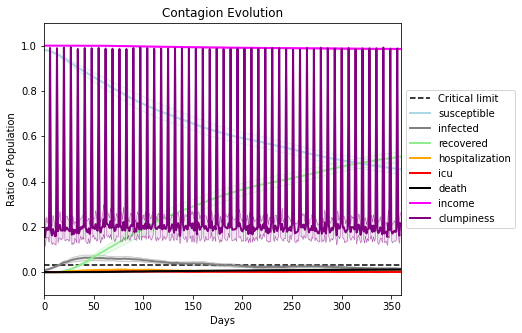

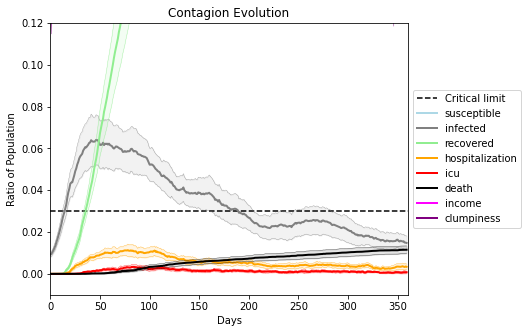

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
              [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], work_home_list = [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[1360, 9710, 8725, 6776, 1745, 2126, 4029, 3969, 4828, 1131, 2510, 6226, 8754, 5508, 2155, 5804, 6073, 6261, 9473, 4093]
Average similarity between family members is 0.9572172836118709 at temperature -0.999
Average similarity between family and home is 0.9998433724507035 at temperature -1
Average similarity between students and their classroom is 0.6396140373237508 at temperature -0.999
Average classroom occupancy is 4.507246376811594 and number classrooms is 69
Average similarity between workers is 0.9330633961049931 at temperature -0.999
Average office occupancy is 3.3247422680412373 and number offices is 194
Average friend similarity for adults: 0.8494639186779207 for kids: 0.696937654373732
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 4 allocated units with a total of 11 people.
Total of 11 people allocated in this district.
, 
Home (1,0) district with 1 Buildi

avg restaurant similarity 0.5604905579301167
avg restaurant similarity 0.6448468286911407
avg restaurant similarity 0.6348961823132129
avg restaurant similarity 0.6788658964980946
avg restaurant similarity 0.6215212393426769
avg restaurant similarity 0.5438398548851452
avg restaurant similarity 0.5971439453310604
avg restaurant similarity 0.5707238462419972
avg restaurant similarity 0.5938785525938957
avg restaurant similarity 0.574079540997852
avg restaurant similarity 0.5577736896885064
avg restaurant similarity 0.6018333290597613
avg restaurant similarity 0.6251980034526338
avg restaurant similarity 0.6155056753098526
avg restaurant similarity 0.5899675706925923
avg restaurant similarity 0.5340172271337071
avg restaurant similarity 0.5862866295576368
avg restaurant similarity 0.5778586345395191
avg restaurant similarity 0.6134412671806845
avg restaurant similarity 0.5477929500624733
avg restaurant similarity 0.5205516839958049
avg restaurant similarity 0.5912939377346315
avg restaur

avg restaurant similarity 0.5548086683849348
avg restaurant similarity 0.5920182908424735
avg restaurant similarity 0.5704440949856601
avg restaurant similarity 0.5779380452925175
avg restaurant similarity 0.5711367295174846
avg restaurant similarity 0.6188599699011237
avg restaurant similarity 0.63427894758663
avg restaurant similarity 0.6293712913810464
avg restaurant similarity 0.6520270664629062
avg restaurant similarity 0.5710090606163943
avg restaurant similarity 0.5758740981791909
avg restaurant similarity 0.5554051179446865
avg restaurant similarity 0.5638480319266728
avg restaurant similarity 0.5346758206823786
avg restaurant similarity 0.5813343833805785
avg restaurant similarity 0.6087956109096542
avg restaurant similarity 0.6339702417833654
avg restaurant similarity 0.5757793801600263
avg restaurant similarity 0.6455182905125166
avg restaurant similarity 0.5784008694389581
avg restaurant similarity 0.5363705517759918
avg restaurant similarity 0.60841841754052
avg restaurant

avg restaurant similarity 0.5557854961209459
avg restaurant similarity 0.5745037330830074
avg restaurant similarity 0.5966814034909945
avg restaurant similarity 0.6046959348967014
avg restaurant similarity 0.5817175746101
avg restaurant similarity 0.599624921070344
avg restaurant similarity 0.6413199470141953
avg restaurant similarity 0.6366932591526493
avg restaurant similarity 0.5877334806765893
avg restaurant similarity 0.5523739558668476
avg restaurant similarity 0.5945299254860578
avg restaurant similarity 0.5966240183049119
avg restaurant similarity 0.5644890060774954
avg restaurant similarity 0.5884590688745669
avg restaurant similarity 0.5738656296017893
avg restaurant similarity 0.5842209815084499
avg restaurant similarity 0.5452108861954345
avg restaurant similarity 0.5429500834352575
avg restaurant similarity 0.5622744624070203
avg restaurant similarity 0.5951368934800365
avg restaurant similarity 0.6055031646349925
avg restaurant similarity 0.5783984511918089
avg restaurant

avg restaurant similarity 0.5524804438360554
avg restaurant similarity 0.5854896462197787
avg restaurant similarity 0.591337536248461
avg restaurant similarity 0.5827283999130011
avg restaurant similarity 0.5918258832993333
avg restaurant similarity 0.6053322120761437
avg restaurant similarity 0.5248695540008707
avg restaurant similarity 0.5430532713834971
avg restaurant similarity 0.5739858258602267
avg restaurant similarity 0.5971065306334906
avg restaurant similarity 0.5981185465300285
avg restaurant similarity 0.5722342179459162
avg restaurant similarity 0.597488660518897
avg restaurant similarity 0.5780260509862941
avg restaurant similarity 0.5570291303328897
avg restaurant similarity 0.6076016616282034
avg restaurant similarity 0.5834316783778333
avg restaurant similarity 0.5959651719899958
avg restaurant similarity 0.5670274705881869
avg restaurant similarity 0.648033827062099
avg restaurant similarity 0.5812257605824205
avg restaurant similarity 0.5715704459002823
avg restauran

avg restaurant similarity 0.6096812707181127
avg restaurant similarity 0.5208507371745886
avg restaurant similarity 0.5870184465963768
avg restaurant similarity 0.5949056840806753
avg restaurant similarity 0.556474672120219
avg restaurant similarity 0.5470813302389926
avg restaurant similarity 0.5720125864373227
avg restaurant similarity 0.5852950473923674
avg restaurant similarity 0.5370335204331164
avg restaurant similarity 0.6151314613581054
avg restaurant similarity 0.5659295055240826
avg restaurant similarity 0.5574507431904208
avg restaurant similarity 0.5560574467042219
avg restaurant similarity 0.5676961859380377
avg restaurant similarity 0.5814586411278633
avg restaurant similarity 0.5464277249679161
avg restaurant similarity 0.6176665455702074
avg restaurant similarity 0.5867705881536219
avg restaurant similarity 0.5773666241207658
avg restaurant similarity 0.5378749735093772
avg restaurant similarity 0.637254326425909
avg restaurant similarity 0.5821700772535046
avg restaura

avg restaurant similarity 0.5939581533236887
avg restaurant similarity 0.6082552763524582
avg restaurant similarity 0.6038900822237285
avg restaurant similarity 0.6050727097869515
avg restaurant similarity 0.6027442781876879
avg restaurant similarity 0.5672998097102406
avg restaurant similarity 0.5576844862585335
avg restaurant similarity 0.5634137785699967
avg restaurant similarity 0.600353332598068
avg restaurant similarity 0.549920989323121
avg restaurant similarity 0.5601439548051035
avg restaurant similarity 0.5861488834331193
avg restaurant similarity 0.5591523587510725
avg restaurant similarity 0.540902052344726
avg restaurant similarity 0.5939256649423977
avg restaurant similarity 0.5605267917873658
avg restaurant similarity 0.596098967830417
avg restaurant similarity 0.5744693906490018
avg restaurant similarity 0.6128253795498746
avg restaurant similarity 0.6052272292838299
avg restaurant similarity 0.5509219963232276
avg restaurant similarity 0.6275605381269072
avg restaurant

avg restaurant similarity 0.6045646884326927
avg restaurant similarity 0.523614930077717
avg restaurant similarity 0.6280766566492179
avg restaurant similarity 0.5982789430539878
avg restaurant similarity 0.5345760685582092
avg restaurant similarity 0.5731287223665557
avg restaurant similarity 0.5690863945657908
avg restaurant similarity 0.5560876519350646
avg restaurant similarity 0.6199751616562835
avg restaurant similarity 0.5403748201955807
avg restaurant similarity 0.5669891626588616
avg restaurant similarity 0.561880414993247
avg restaurant similarity 0.5607616066559518
avg restaurant similarity 0.5894670499443339
avg restaurant similarity 0.5920315366355281
avg restaurant similarity 0.5577794279172527
avg restaurant similarity 0.5713025862568456
avg restaurant similarity 0.5438799952662176
avg restaurant similarity 0.623730605041042
avg restaurant similarity 0.553544946068813
avg restaurant similarity 0.5673085118116888
avg restaurant similarity 0.6271294959544261
avg restaurant

avg restaurant similarity 0.5530963850641051
avg restaurant similarity 0.6268081458319293
avg restaurant similarity 0.6426813035818271
avg restaurant similarity 0.5822988478812106
avg restaurant similarity 0.5774878430081449
avg restaurant similarity 0.6115837660345013
avg restaurant similarity 0.5916821699802878
avg restaurant similarity 0.5653448399027331
avg restaurant similarity 0.5802536735993655
avg restaurant similarity 0.6272909643739978
avg restaurant similarity 0.5564676105140571
avg restaurant similarity 0.6251610896346594
avg restaurant similarity 0.5518624257346734
avg restaurant similarity 0.5983434722345525
avg restaurant similarity 0.608634417907796
avg restaurant similarity 0.5649274811690562
avg restaurant similarity 0.6176709740747959
avg restaurant similarity 0.591960667448026
avg restaurant similarity 0.5586618572990443
avg restaurant similarity 0.6043201696977284
avg restaurant similarity 0.5444897697085433
avg restaurant similarity 0.6028758895889305
avg restaura

avg restaurant similarity 0.5226907060333115
avg restaurant similarity 0.6330041240539183
avg restaurant similarity 0.6574419631126687
avg restaurant similarity 0.665628712398659
avg restaurant similarity 0.597581115261465
avg restaurant similarity 0.6035864213412944
avg restaurant similarity 0.6255619268329304
avg restaurant similarity 0.6608696996702176
avg restaurant similarity 0.6157841088893599
avg restaurant similarity 0.6152613414192375
avg restaurant similarity 0.5838269000577204
avg restaurant similarity 0.728468940010685
avg restaurant similarity 0.6385040737684825
avg restaurant similarity 0.6835357918709157
avg restaurant similarity 0.6568193148325769
avg restaurant similarity 0.553204677979165
avg restaurant similarity 0.6482687166152686
avg restaurant similarity 0.6169006138971984
avg restaurant similarity 0.6868324209100296
avg restaurant similarity 0.6914529687128278
avg restaurant similarity 0.6543858628833275
avg restaurant similarity 0.6849621196606075
avg restaurant

avg restaurant similarity 0.6284155922263192
avg restaurant similarity 0.6946968154182949
avg restaurant similarity 0.665995935712663
avg restaurant similarity 0.6596384759137092
avg restaurant similarity 0.643392296264765
avg restaurant similarity 0.6028753204902167
avg restaurant similarity 0.6840501345585949
avg restaurant similarity 0.6530326545300817
avg restaurant similarity 0.6192542711037089
avg restaurant similarity 0.6555851143744127
avg restaurant similarity 0.5349271288835329
avg restaurant similarity 0.6289955845014062
avg restaurant similarity 0.6284771756739626
avg restaurant similarity 0.7056109961433413
avg restaurant similarity 0.5956145550410163
avg restaurant similarity 0.6670310009880173
avg restaurant similarity 0.6514806020829605
avg restaurant similarity 0.6477628542319243
avg restaurant similarity 0.6009039245264379
avg restaurant similarity 0.612840924503649
avg restaurant similarity 0.6306471298409649
avg restaurant similarity 0.6005153361353051
avg restauran

avg restaurant similarity 0.633167411088133
avg restaurant similarity 0.642760646670188
avg restaurant similarity 0.620249493752635
avg restaurant similarity 0.6208827052346984
avg restaurant similarity 0.5776466774876043
avg restaurant similarity 0.6013660881221797
avg restaurant similarity 0.5952305982057409
avg restaurant similarity 0.6569793382052187
avg restaurant similarity 0.6006644746739368
avg restaurant similarity 0.598407617228034
avg restaurant similarity 0.6097941568215772
avg restaurant similarity 0.5830875692024091
avg restaurant similarity 0.5831932336245402
avg restaurant similarity 0.5978135645089955
avg restaurant similarity 0.6093883002192244
avg restaurant similarity 0.6003053804351127
avg restaurant similarity 0.5751412944266787
avg restaurant similarity 0.6178083442358169
avg restaurant similarity 0.5992438712271021
avg restaurant similarity 0.616744398527885
avg restaurant similarity 0.6028682048721302
avg restaurant similarity 0.6268558013080776
avg restaurant 

avg restaurant similarity 0.5916565534217177
avg restaurant similarity 0.6286388289093825
avg restaurant similarity 0.5649016741007544
avg restaurant similarity 0.6564638295325045
avg restaurant similarity 0.6276408184870492
avg restaurant similarity 0.6092518467906579
avg restaurant similarity 0.6017122891556649
avg restaurant similarity 0.550996189711832
avg restaurant similarity 0.6113807911386633
avg restaurant similarity 0.6062001857343257
avg restaurant similarity 0.6005003405442401
avg restaurant similarity 0.5802201597727739
avg restaurant similarity 0.6069404177363685
avg restaurant similarity 0.6047967165888476
avg restaurant similarity 0.5908824100159654
avg restaurant similarity 0.6369763616543203
avg restaurant similarity 0.642755703291177
avg restaurant similarity 0.6061666358559593
avg restaurant similarity 0.6199269579655863
avg restaurant similarity 0.6494172853433198
avg restaurant similarity 0.6026930788212879
avg restaurant similarity 0.6353609878811619
avg restaura

avg restaurant similarity 0.5363656817950068
avg restaurant similarity 0.49888355149440133
avg restaurant similarity 0.5668320481143748
avg restaurant similarity 0.5768137586474656
avg restaurant similarity 0.4696390711837927
avg restaurant similarity 0.5347917046317596
avg restaurant similarity 0.5448066481294112
avg restaurant similarity 0.5722557166005121
avg restaurant similarity 0.5497075475808879
avg restaurant similarity 0.5502153548456982
avg restaurant similarity 0.5447279694544408
avg restaurant similarity 0.5527641895182452
avg restaurant similarity 0.6023722525649874
avg restaurant similarity 0.5622492006755688
avg restaurant similarity 0.5856554626789925
avg restaurant similarity 0.5604874242657485
avg restaurant similarity 0.48771483834473084
avg restaurant similarity 0.5961820559481387
avg restaurant similarity 0.5231144377771333
avg restaurant similarity 0.6164064005885083
avg restaurant similarity 0.6521927561112009
avg restaurant similarity 0.6244191320637315
avg rest

avg restaurant similarity 0.523511131469663
avg restaurant similarity 0.47432273547826825
avg restaurant similarity 0.5094534084376273
avg restaurant similarity 0.4931727588682844
avg restaurant similarity 0.5624465882283572
avg restaurant similarity 0.4893564683283465
avg restaurant similarity 0.5181948811402314
avg restaurant similarity 0.5777969044734513
avg restaurant similarity 0.5381350102328974
avg restaurant similarity 0.4648036151608043
avg restaurant similarity 0.49447918096308296
avg restaurant similarity 0.5592774368213528
avg restaurant similarity 0.511599619797753
avg restaurant similarity 0.5279917355361089
avg restaurant similarity 0.49138983937614256
avg restaurant similarity 0.5301815408674124
avg restaurant similarity 0.5805519184874369
avg restaurant similarity 0.6133201564893261
avg restaurant similarity 0.5308627405978906
avg restaurant similarity 0.4756733446473125
avg restaurant similarity 0.565842453884054
avg restaurant similarity 0.5850521177352214
avg restau

avg restaurant similarity 0.6285143157443549
avg restaurant similarity 0.6506484518814462
avg restaurant similarity 0.6865137194177665
avg restaurant similarity 0.5984197261125888
avg restaurant similarity 0.5967687689444509
avg restaurant similarity 0.6221134038520829
avg restaurant similarity 0.6480872550967489
avg restaurant similarity 0.6428293731702238
avg restaurant similarity 0.6494448850935597
avg restaurant similarity 0.6204887580778425
avg restaurant similarity 0.6236872552275095
avg restaurant similarity 0.6088522927153253
avg restaurant similarity 0.5575264522305744
avg restaurant similarity 0.5995949405568329
avg restaurant similarity 0.597715275756722
avg restaurant similarity 0.5943230459932777
avg restaurant similarity 0.5973774393530331
avg restaurant similarity 0.6047240655511541
avg restaurant similarity 0.60330966206291
avg restaurant similarity 0.5895656485052073
avg restaurant similarity 0.6325550727503196
avg restaurant similarity 0.5817267721864278
avg restauran

avg restaurant similarity 0.6128868179511524
avg restaurant similarity 0.6328494130118435
avg restaurant similarity 0.5791903468278872
avg restaurant similarity 0.6133121081192212
avg restaurant similarity 0.6537611447616349
avg restaurant similarity 0.5932485526169742
avg restaurant similarity 0.6374872521274725
avg restaurant similarity 0.5579534385372882
avg restaurant similarity 0.5754287716999648
avg restaurant similarity 0.6668925670016788
avg restaurant similarity 0.620395917815686
avg restaurant similarity 0.6109329614896821
avg restaurant similarity 0.6479036726331328
avg restaurant similarity 0.6383559001695437
avg restaurant similarity 0.5810306182447665
avg restaurant similarity 0.6179057329403952
avg restaurant similarity 0.6548770903238336
avg restaurant similarity 0.581923718131167
avg restaurant similarity 0.6275987006961657
avg restaurant similarity 0.569656675016179
avg restaurant similarity 0.6140656255601307
avg restaurant similarity 0.5698470571442789
avg restauran

avg restaurant similarity 0.6539968094294712
avg restaurant similarity 0.6726096134354786
avg restaurant similarity 0.6437518876087963
avg restaurant similarity 0.6157824972706858
avg restaurant similarity 0.615436188808729
avg restaurant similarity 0.6600109165755135
avg restaurant similarity 0.6144607849909317
avg restaurant similarity 0.6072778776025752
avg restaurant similarity 0.597481277986578
avg restaurant similarity 0.591253702431763
avg restaurant similarity 0.6187776586197211
avg restaurant similarity 0.5973326222170685
avg restaurant similarity 0.606121013506143
avg restaurant similarity 0.6327268879049747
avg restaurant similarity 0.6051309519778488
avg restaurant similarity 0.6094097045074298
avg restaurant similarity 0.6159785542689099
avg restaurant similarity 0.6368397961644133
avg restaurant similarity 0.6708676731323308
avg restaurant similarity 0.644621303611746
avg restaurant similarity 0.6041998455099125
avg restaurant similarity 0.5717000571823679
avg restaurant 

avg restaurant similarity 0.6189043661677174
avg restaurant similarity 0.6760238651733592
avg restaurant similarity 0.5973744500555648
avg restaurant similarity 0.6109100974491252
avg restaurant similarity 0.6476967261740882
avg restaurant similarity 0.6268783801087431
avg restaurant similarity 0.665052916840758
avg restaurant similarity 0.6547617751787528
avg restaurant similarity 0.6319146025013291
avg restaurant similarity 0.5795584944498204
avg restaurant similarity 0.6299416301579621
avg restaurant similarity 0.6121885342219955
avg restaurant similarity 0.665912541741597
avg restaurant similarity 0.6209842137819677
avg restaurant similarity 0.5932214293635719
avg restaurant similarity 0.5749210507157838
avg restaurant similarity 0.626004727447365
avg restaurant similarity 0.6340964054120588
avg restaurant similarity 0.6320795581579517
avg restaurant similarity 0.6055470323406819
avg restaurant similarity 0.617336718824375
avg restaurant similarity 0.6229377660044557
avg restaurant

avg restaurant similarity 0.6540322436615248
avg restaurant similarity 0.6048318363519304
avg restaurant similarity 0.6453454843311521
avg restaurant similarity 0.6926354920099339
avg restaurant similarity 0.6544759423761406
avg restaurant similarity 0.6179022350599629
avg restaurant similarity 0.6523147581623123
avg restaurant similarity 0.5810969267856917
avg restaurant similarity 0.6575230474087662
avg restaurant similarity 0.6237203944656534
avg restaurant similarity 0.6564081250559186
avg restaurant similarity 0.628912191712805
avg restaurant similarity 0.6433657366585372
avg restaurant similarity 0.6501462268418471
avg restaurant similarity 0.633715327445123
avg restaurant similarity 0.5900932598334672
avg restaurant similarity 0.5974140795071503
avg restaurant similarity 0.6415174527237006
avg restaurant similarity 0.6205377238547622
avg restaurant similarity 0.5833982569544599
avg restaurant similarity 0.6563158484259018
avg restaurant similarity 0.6375418249201144
avg restaura

avg restaurant similarity 0.6270865008832314
avg restaurant similarity 0.6006146882595874
avg restaurant similarity 0.6633849656461418
avg restaurant similarity 0.6312170280097714
avg restaurant similarity 0.6186098619008334
avg restaurant similarity 0.6246734532285015
avg restaurant similarity 0.6466719061430499
avg restaurant similarity 0.6283741065912765
avg restaurant similarity 0.6182954109229784
avg restaurant similarity 0.6068074759034697
avg restaurant similarity 0.6748222277258831
avg restaurant similarity 0.6262446674272986
avg restaurant similarity 0.6019642531263153
avg restaurant similarity 0.6364847496200756
avg restaurant similarity 0.6188961800913491
avg restaurant similarity 0.6783309340872313
avg restaurant similarity 0.6183434377656921
avg restaurant similarity 0.6412861467466522
avg restaurant similarity 0.6901371237308902
avg restaurant similarity 0.6494234633332683
avg restaurant similarity 0.6195155078297592
avg restaurant similarity 0.7163761702541587
avg restau

avg restaurant similarity 0.6281497196929048
avg restaurant similarity 0.6217608500178461
avg restaurant similarity 0.6084162688279426
avg restaurant similarity 0.6560098696897646
avg restaurant similarity 0.639032861792913
avg restaurant similarity 0.6648881235916081
avg restaurant similarity 0.5702167685084438
avg restaurant similarity 0.6499387340484203
avg restaurant similarity 0.6227087256233746
avg restaurant similarity 0.6306021589321298
avg restaurant similarity 0.6489557268288617
avg restaurant similarity 0.6536447453654306
avg restaurant similarity 0.6129077446840173
avg restaurant similarity 0.6127620249515369
avg restaurant similarity 0.6342073472496959
avg restaurant similarity 0.6718465370108466
avg restaurant similarity 0.674720559502386
avg restaurant similarity 0.6137267558483923
avg restaurant similarity 0.5925252375979181
avg restaurant similarity 0.6160974030682554
avg restaurant similarity 0.6488188499433437
avg restaurant similarity 0.6117640629344843
avg restaura

avg restaurant similarity 0.6854997775121799
avg restaurant similarity 0.621473641234753
avg restaurant similarity 0.6447178433177148
avg restaurant similarity 0.6846553014573926
avg restaurant similarity 0.6574314432618478
avg restaurant similarity 0.578795416514523
avg restaurant similarity 0.6972138189603461
avg restaurant similarity 0.6326199733491589
avg restaurant similarity 0.6622150890520905
avg restaurant similarity 0.5849043167368795
avg restaurant similarity 0.6010977512719299
avg restaurant similarity 0.6253625817350484
avg restaurant similarity 0.6517579772555615
avg restaurant similarity 0.6336146307889206
avg restaurant similarity 0.6569449620256598
avg restaurant similarity 0.5969411484268746
avg restaurant similarity 0.6310128849529617
avg restaurant similarity 0.5918360987712782
avg restaurant similarity 0.6026667286062634
avg restaurant similarity 0.6552299075303815
avg restaurant similarity 0.6423749722069356
avg restaurant similarity 0.6468720407425458
avg restaura

avg restaurant similarity 0.5888755004408381
avg restaurant similarity 0.5742282928469473
avg restaurant similarity 0.5729667508413808
avg restaurant similarity 0.6189541115797078
avg restaurant similarity 0.6332910359053799
avg restaurant similarity 0.6329322060704067
avg restaurant similarity 0.5946014876636302
avg restaurant similarity 0.587061711463376
avg restaurant similarity 0.5976914426005955
avg restaurant similarity 0.5775162836148
avg restaurant similarity 0.5805006474588414
avg restaurant similarity 0.5621502025735942
avg restaurant similarity 0.5392411281882515
avg restaurant similarity 0.5848034297600061
avg restaurant similarity 0.5459989375036984
avg restaurant similarity 0.6275524131735135
avg restaurant similarity 0.5898689113531309
avg restaurant similarity 0.664735809467889
avg restaurant similarity 0.6024931500339668
avg restaurant similarity 0.587853791464244
avg restaurant similarity 0.5975791996656654
avg restaurant similarity 0.5768852422667089
avg restaurant s

avg restaurant similarity 0.5598706914903075
avg restaurant similarity 0.5769329991397587
avg restaurant similarity 0.6563434403631938
avg restaurant similarity 0.5852978986774121
avg restaurant similarity 0.6482470573681691
avg restaurant similarity 0.5423358353218561
avg restaurant similarity 0.6019320112529991
avg restaurant similarity 0.5438242447206448
avg restaurant similarity 0.5793457190934896
avg restaurant similarity 0.6152565969152599
avg restaurant similarity 0.6254019104377481
avg restaurant similarity 0.5887021527493372
avg restaurant similarity 0.5489531912910174
avg restaurant similarity 0.5458357551590765
avg restaurant similarity 0.5552730718476845
avg restaurant similarity 0.5512620740478875
avg restaurant similarity 0.5932969482120732
avg restaurant similarity 0.5725810455381034
avg restaurant similarity 0.547615262927652
avg restaurant similarity 0.5857523750506723
avg restaurant similarity 0.5440499322633712
avg restaurant similarity 0.5651442913494327
avg restaur

avg restaurant similarity 0.6523198302501343
avg restaurant similarity 0.64248831910507
avg restaurant similarity 0.6510719512311998
avg restaurant similarity 0.6409769761538086
avg restaurant similarity 0.6274178896933753
avg restaurant similarity 0.5795677319967799
avg restaurant similarity 0.6255721313112342
avg restaurant similarity 0.5859280869090785
avg restaurant similarity 0.6266727377126111
avg restaurant similarity 0.5853682248950551
avg restaurant similarity 0.6354461051163985
avg restaurant similarity 0.6060272491054379
avg restaurant similarity 0.563556412536224
avg restaurant similarity 0.6234239279497111
avg restaurant similarity 0.5596924816582387
avg restaurant similarity 0.5829018261844092
avg restaurant similarity 0.6436699281879225
avg restaurant similarity 0.5925474983861523
avg restaurant similarity 0.638144930570532
avg restaurant similarity 0.6129882751214016
avg restaurant similarity 0.6075070778790606
avg restaurant similarity 0.5972753680187598
avg restaurant

avg restaurant similarity 0.6106118458376073
avg restaurant similarity 0.6250296504439907
avg restaurant similarity 0.5736465364633121
avg restaurant similarity 0.6100783443560399
avg restaurant similarity 0.6895495130300253
avg restaurant similarity 0.6667686306996835
avg restaurant similarity 0.5864488780588951
avg restaurant similarity 0.5903852352008123
avg restaurant similarity 0.6086874834411085
avg restaurant similarity 0.6291068397673737
avg restaurant similarity 0.636140400142033
avg restaurant similarity 0.6090081489316868
avg restaurant similarity 0.6318166744659649
avg restaurant similarity 0.6791863671078262
avg restaurant similarity 0.6329207105382413
avg restaurant similarity 0.6435325150205115
avg restaurant similarity 0.6381987759478224
avg restaurant similarity 0.6167853166849575
avg restaurant similarity 0.6563689002205143
avg restaurant similarity 0.6156231623545007
avg restaurant similarity 0.5931574591079499
avg restaurant similarity 0.6035209102669858
avg restaur

avg restaurant similarity 0.5669797188162498
avg restaurant similarity 0.5852525401173736
avg restaurant similarity 0.5760959827353512
avg restaurant similarity 0.6076788124285221
avg restaurant similarity 0.5746712589809064
avg restaurant similarity 0.5978316732980139
avg restaurant similarity 0.5773542590041623
avg restaurant similarity 0.5931146907802258
avg restaurant similarity 0.5864369731238874
avg restaurant similarity 0.5872130130905938
avg restaurant similarity 0.5889292997391037
avg restaurant similarity 0.5750831309824915
avg restaurant similarity 0.554984854592728
avg restaurant similarity 0.5824900394861344
avg restaurant similarity 0.6059588167668071
avg restaurant similarity 0.604163552343318
avg restaurant similarity 0.6099498410404026
avg restaurant similarity 0.6223450841814221
avg restaurant similarity 0.585825470996996
avg restaurant similarity 0.5753324041880437
avg restaurant similarity 0.5627420788829333
avg restaurant similarity 0.5980655856728361
avg restauran

avg restaurant similarity 0.577072340217031
avg restaurant similarity 0.5782724990369825
avg restaurant similarity 0.5755619154348773
avg restaurant similarity 0.5868585703088315
avg restaurant similarity 0.5756255376434395
avg restaurant similarity 0.555538589614255
avg restaurant similarity 0.6117206227851294
avg restaurant similarity 0.6201524423582176
avg restaurant similarity 0.6030497150924403
avg restaurant similarity 0.5623477818474996
avg restaurant similarity 0.6235122699305512
avg restaurant similarity 0.584676717262978
avg restaurant similarity 0.6430474814259534
avg restaurant similarity 0.6048277932970366
avg restaurant similarity 0.5893091854903652
avg restaurant similarity 0.6069280467423884
avg restaurant similarity 0.6242693506657746
avg restaurant similarity 0.6031559186758031
avg restaurant similarity 0.5917576298161675
avg restaurant similarity 0.5821260400572171
avg restaurant similarity 0.6071430084682835
avg restaurant similarity 0.6386559300332861
avg restauran

avg restaurant similarity 0.5401512379621101
avg restaurant similarity 0.5861428305861336
avg restaurant similarity 0.5672926991500318
avg restaurant similarity 0.5743422293658332
avg restaurant similarity 0.5587077136146847
avg restaurant similarity 0.5446707738773682
avg restaurant similarity 0.5553209160072179
avg restaurant similarity 0.6081154146443029
avg restaurant similarity 0.5319555479563457
avg restaurant similarity 0.5539523738197898
avg restaurant similarity 0.5883266962185835
avg restaurant similarity 0.5493774093765004
avg restaurant similarity 0.5836960918853357
avg restaurant similarity 0.6113366600373418
avg restaurant similarity 0.6293232614010353
avg restaurant similarity 0.5582658832201645
avg restaurant similarity 0.5859188508590152
avg restaurant similarity 0.5513726920715828
avg restaurant similarity 0.554375436269583
avg restaurant similarity 0.5883259400017489
avg restaurant similarity 0.5731135739561676
avg restaurant similarity 0.5860722274579767
avg restaur

avg restaurant similarity 0.5863425911142642
avg restaurant similarity 0.5454339282035611
avg restaurant similarity 0.544010695061434
avg restaurant similarity 0.6171042174350614
avg restaurant similarity 0.6234994287907621
avg restaurant similarity 0.5784061069476473
avg restaurant similarity 0.5662576156856856
avg restaurant similarity 0.5737001133485998
avg restaurant similarity 0.5521940884186263
avg restaurant similarity 0.5352974378616857
avg restaurant similarity 0.6340343575943209
avg restaurant similarity 0.5681379369805635
avg restaurant similarity 0.5582979797516329
avg restaurant similarity 0.5491289228513315
avg restaurant similarity 0.564563560715098
avg restaurant similarity 0.5402783347205987
avg restaurant similarity 0.5989205429836973
avg restaurant similarity 0.6081304036869278
avg restaurant similarity 0.6174108915262027
avg restaurant similarity 0.5481985634525037
avg restaurant similarity 0.5752897235768886
avg restaurant similarity 0.539154633238924
avg restauran

avg restaurant similarity 0.6144967979356838
avg restaurant similarity 0.657030986407089
avg restaurant similarity 0.5909746944978831
avg restaurant similarity 0.6614127123329445
avg restaurant similarity 0.6385893908819443
avg restaurant similarity 0.6851676706096709
avg restaurant similarity 0.6683970975941108
avg restaurant similarity 0.6646525532051905
avg restaurant similarity 0.6052634312807296
avg restaurant similarity 0.6230477292319477
avg restaurant similarity 0.6212145473091998
avg restaurant similarity 0.6672782439924151
avg restaurant similarity 0.679460410293236
avg restaurant similarity 0.605079192239021
avg restaurant similarity 0.6656841634647093
avg restaurant similarity 0.64063863523837
avg restaurant similarity 0.6624001298548453
avg restaurant similarity 0.6496040624881655
avg restaurant similarity 0.6408488186537704
avg restaurant similarity 0.6523029531714818
avg restaurant similarity 0.672243405900171
avg restaurant similarity 0.6791466326096787
avg restaurant s

avg restaurant similarity 0.6186119437915863
avg restaurant similarity 0.6385273539795312
avg restaurant similarity 0.6783719347517713
avg restaurant similarity 0.6668672236701111
avg restaurant similarity 0.6322165979865937
avg restaurant similarity 0.6473208233133054
avg restaurant similarity 0.6461625896496329
avg restaurant similarity 0.6124523714053394
avg restaurant similarity 0.6631477735299303
avg restaurant similarity 0.6233790078137301
avg restaurant similarity 0.6305018664848869
avg restaurant similarity 0.5798563343859017
avg restaurant similarity 0.591545526965304
avg restaurant similarity 0.5898716942615658
avg restaurant similarity 0.6030168444245063
avg restaurant similarity 0.6156585788056159
avg restaurant similarity 0.6237279890552159
avg restaurant similarity 0.6455542983841455
avg restaurant similarity 0.6404404195333556
avg restaurant similarity 0.5739090631274668
avg restaurant similarity 0.635047083599683
avg restaurant similarity 0.643419129543357
avg restauran

avg restaurant similarity 0.610185265262324
avg restaurant similarity 0.6138946785070607
avg restaurant similarity 0.6624892705271952
avg restaurant similarity 0.6249392285753105
avg restaurant similarity 0.6268110412114103
avg restaurant similarity 0.6312389188502033
avg restaurant similarity 0.6561126929328908
avg restaurant similarity 0.6505934125571649
avg restaurant similarity 0.6634615716104899
avg restaurant similarity 0.6598967911116868
avg restaurant similarity 0.6338489266751163
avg restaurant similarity 0.6534190022045485
avg restaurant similarity 0.6523782038815782
avg restaurant similarity 0.6365423509271039
avg restaurant similarity 0.5798381954617955
avg restaurant similarity 0.6851525714783512
avg restaurant similarity 0.6485992848152616
avg restaurant similarity 0.6412018347573152
avg restaurant similarity 0.5889746659079097
avg restaurant similarity 0.651917701870435
avg restaurant similarity 0.6713109530905194
avg restaurant similarity 0.6622871258381838
avg restaura

avg restaurant similarity 0.6597467957169199
avg restaurant similarity 0.5996797732574879
avg restaurant similarity 0.6399248001940185
avg restaurant similarity 0.6361056804700503
avg restaurant similarity 0.5931377455740326
avg restaurant similarity 0.6065025110482598
avg restaurant similarity 0.6698419925071835
avg restaurant similarity 0.6249653052511102
avg restaurant similarity 0.6496360694979841
avg restaurant similarity 0.6613384613926008
avg restaurant similarity 0.6923580651880334
avg restaurant similarity 0.6585367507375365
avg restaurant similarity 0.6366303144108572
avg restaurant similarity 0.6596172338984903
avg restaurant similarity 0.6319936569483916
avg restaurant similarity 0.6755267042041873
avg restaurant similarity 0.630565341579007
avg restaurant similarity 0.5932592233853133
avg restaurant similarity 0.7065658586639453
avg restaurant similarity 0.6238643247207513
avg restaurant similarity 0.6368809975285454
avg restaurant similarity 0.7063719193616218
avg restaur

avg restaurant similarity 0.5625713770006702
avg restaurant similarity 0.5995826663162741
avg restaurant similarity 0.5661782204060632
avg restaurant similarity 0.5955152924430107
avg restaurant similarity 0.6196250100851464
avg restaurant similarity 0.6125760460358621
avg restaurant similarity 0.570672481628657
avg restaurant similarity 0.6303327758047955
avg restaurant similarity 0.6096517554180001
avg restaurant similarity 0.5970424174569989
avg restaurant similarity 0.6256861478373923
avg restaurant similarity 0.5935574040818609
avg restaurant similarity 0.5871818660381571
avg restaurant similarity 0.6235582570539662
avg restaurant similarity 0.5768138485733334
avg restaurant similarity 0.6262242768977383
avg restaurant similarity 0.6421245646582487
avg restaurant similarity 0.5796302483642713
avg restaurant similarity 0.6423708931154731
avg restaurant similarity 0.5893851625800165
avg restaurant similarity 0.6121616956189765
avg restaurant similarity 0.6033911148269819
avg restaur

avg restaurant similarity 0.578190954618204
avg restaurant similarity 0.6029900974639016
avg restaurant similarity 0.5958296547776367
avg restaurant similarity 0.6204257277930276
avg restaurant similarity 0.6274775200209765
avg restaurant similarity 0.6436389523164863
avg restaurant similarity 0.5586837222831899
avg restaurant similarity 0.6632769140193289
avg restaurant similarity 0.5777658561241155
avg restaurant similarity 0.6327456222592368
avg restaurant similarity 0.5883482702493764
avg restaurant similarity 0.6084518739781534
avg restaurant similarity 0.6259179765959476
avg restaurant similarity 0.5653094833878427
avg restaurant similarity 0.6816532916999379
avg restaurant similarity 0.5910511844574767
avg restaurant similarity 0.6043060833662184
avg restaurant similarity 0.6063537081759633
avg restaurant similarity 0.6046899054533331
avg restaurant similarity 0.6142069914362347
avg restaurant similarity 0.5922484764387432
avg restaurant similarity 0.5766374300622603
avg restaur

avg restaurant similarity 0.6195551623083213
avg restaurant similarity 0.5453452097669992
avg restaurant similarity 0.5794098011872814
avg restaurant similarity 0.5307854162487762
avg restaurant similarity 0.5834170545368411
avg restaurant similarity 0.5839301952828705
avg restaurant similarity 0.5734422767997728
avg restaurant similarity 0.5021454892286706
avg restaurant similarity 0.5821241277169431
avg restaurant similarity 0.5516996979094637
avg restaurant similarity 0.5609596352522508
avg restaurant similarity 0.557562290964405
avg restaurant similarity 0.5987938811561134
avg restaurant similarity 0.5379194399904909
avg restaurant similarity 0.5428742692484294
avg restaurant similarity 0.5754092440961858
avg restaurant similarity 0.5793798637468893
avg restaurant similarity 0.584954886478253
avg restaurant similarity 0.5491372066165177
avg restaurant similarity 0.5689708394689277
avg restaurant similarity 0.5684746805737626
avg restaurant similarity 0.5908818187964648
avg restaura

avg restaurant similarity 0.5693905943650737
avg restaurant similarity 0.5349838351339329
avg restaurant similarity 0.5321220188669293
avg restaurant similarity 0.5863291706386382
avg restaurant similarity 0.5828182008661955
avg restaurant similarity 0.5837753329202086
avg restaurant similarity 0.5311331333490035
avg restaurant similarity 0.5331984702904946
avg restaurant similarity 0.6174292831255237
avg restaurant similarity 0.5703778629493067
avg restaurant similarity 0.5551402392197673
avg restaurant similarity 0.5677309419021748
avg restaurant similarity 0.5862995494188091
avg restaurant similarity 0.5681728412954403
avg restaurant similarity 0.6163516081293923
avg restaurant similarity 0.585926103491028
avg restaurant similarity 0.4948802753868374
avg restaurant similarity 0.5546538819488418
avg restaurant similarity 0.5616313480327535
avg restaurant similarity 0.5625278228750112
avg restaurant similarity 0.559989165883181
avg restaurant similarity 0.5705655826620606
avg restaura

avg restaurant similarity 0.6056227891797739
avg restaurant similarity 0.628836913059055
avg restaurant similarity 0.570801996553709
avg restaurant similarity 0.6142283109911281
avg restaurant similarity 0.5555585435027052
avg restaurant similarity 0.5724805347061419
avg restaurant similarity 0.5972848848415852
avg restaurant similarity 0.605591188616444
avg restaurant similarity 0.6027871595680604
avg restaurant similarity 0.6119466026522724
avg restaurant similarity 0.591063057467526
avg restaurant similarity 0.5801970893018435
avg restaurant similarity 0.6042888109913244
avg restaurant similarity 0.5873390650199187
avg restaurant similarity 0.6586101479416246
avg restaurant similarity 0.5736375962749091
avg restaurant similarity 0.5470455106136456
avg restaurant similarity 0.5859528717954962
avg restaurant similarity 0.5935200309456495
avg restaurant similarity 0.574979440326072
avg restaurant similarity 0.58314359579112
avg restaurant similarity 0.5780629918366498
avg restaurant si

avg restaurant similarity 0.5874979119904131
avg restaurant similarity 0.5411212988988854
avg restaurant similarity 0.5971422253783452
avg restaurant similarity 0.5606382139455778
avg restaurant similarity 0.6377928246993118
avg restaurant similarity 0.5749227388575902
avg restaurant similarity 0.595196828442615
avg restaurant similarity 0.6304921034386792
avg restaurant similarity 0.5947083345939862
avg restaurant similarity 0.6062889877520891
avg restaurant similarity 0.62032630467459
avg restaurant similarity 0.6448974680748317
avg restaurant similarity 0.6211867380110029
avg restaurant similarity 0.5927039976198916
avg restaurant similarity 0.5951046003212048
avg restaurant similarity 0.5525201828608962
avg restaurant similarity 0.6118593356584979
avg restaurant similarity 0.6452189496939138
avg restaurant similarity 0.5655705872188943
avg restaurant similarity 0.6919777886890441
avg restaurant similarity 0.5742180671682322
avg restaurant similarity 0.578921782853553
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

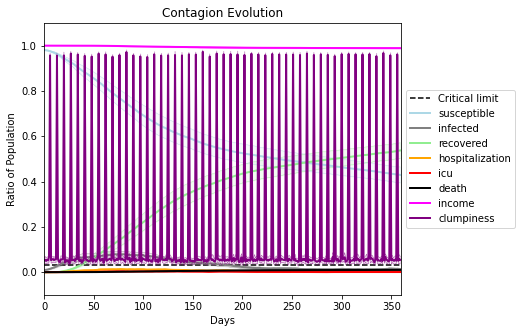

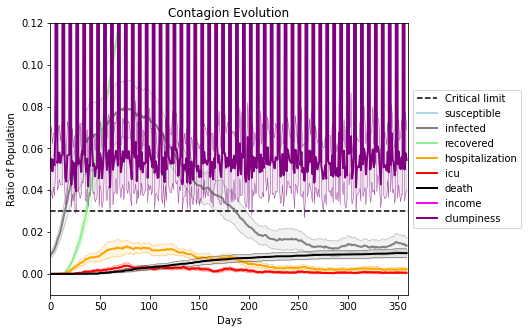

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 100
seeds = [2252]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],
              work_home_list = 
            
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],listeners = listeners)

Save these seeds if you want to rerun a scenario
[4126, 8749, 4768, 9607, 5662, 9404, 4247, 6121, 9553, 3075, 2902, 3300, 5125, 1213, 1645, 9277, 535, 3133, 1630, 2459]
Average similarity between family members is 0.010745483841788308 at temperature 1
Average similarity between family and home is 0.9998511365422581 at temperature -1
Average similarity between students and their classroom is 0.02115381976141417 at temperature 1
Average classroom occupancy is 3.9565217391304346 and number classrooms is 69
Average similarity between workers is 0.0015085397226928777 at temperature 1
Average office occupancy is 3.355 and number offices is 200
Average friend similarity for adults: 0.08236758190424417 for kids: 0.07247540156759169
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 3 allocated units with a total of 7 people.
Total of 7 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuildi

avg restaurant similarity -0.014804905714749777
avg restaurant similarity -0.008713190693818547
avg restaurant similarity -0.003777398385549707
avg restaurant similarity 0.02499898938964542
avg restaurant similarity 0.005799397770807035
avg restaurant similarity 0.043858959830271306
avg restaurant similarity -0.008078645581166976
avg restaurant similarity 0.009149375192390029
avg restaurant similarity 0.008985173020612986
avg restaurant similarity 0.03583509087130643
avg restaurant similarity -0.005719421578942868
avg restaurant similarity 0.026431524471644586
avg restaurant similarity 0.02585478419221659
avg restaurant similarity 0.020644202480737655
avg restaurant similarity 0.02728032626417106
avg restaurant similarity 0.013696884706150644
avg restaurant similarity 0.10558762693043698
avg restaurant similarity -0.026378002146045826
avg restaurant similarity -0.0012198994245366513
avg restaurant similarity 0.006684612607394695
avg restaurant similarity -0.033924967246162924
avg resta

avg restaurant similarity 0.023929745452500026
avg restaurant similarity 0.028248277991063327
avg restaurant similarity -0.0046945940919313305
avg restaurant similarity -0.025232939520633952
avg restaurant similarity 0.027734351996534862
avg restaurant similarity 0.013798177782956143
avg restaurant similarity 0.028915060872895415
avg restaurant similarity -0.05001283107944345
avg restaurant similarity 0.05022975466835089
avg restaurant similarity -0.037170442940955575
avg restaurant similarity 0.02152220675945794
avg restaurant similarity 0.022423813808377692
avg restaurant similarity -0.04870720082952602
avg restaurant similarity 0.021980503537295328
avg restaurant similarity 0.010040807641438198
avg restaurant similarity -0.0031163319153939277
avg restaurant similarity 0.032130513322154504
avg restaurant similarity -0.02244335940179725
avg restaurant similarity 0.0660088628688487
avg restaurant similarity 0.025138506121974838
avg restaurant similarity 0.02088808774770882
avg restaura

avg restaurant similarity 0.0365916959880721
avg restaurant similarity 0.0012067997345733344
avg restaurant similarity -0.025776069308756838
avg restaurant similarity 0.010863358607376339
avg restaurant similarity -0.0016269133727547685
avg restaurant similarity -0.011549846922944081
avg restaurant similarity 0.04416023683769313
avg restaurant similarity 0.02623554804397943
avg restaurant similarity 0.03307069780628307
avg restaurant similarity 0.0551341452611881
avg restaurant similarity -0.0019650324895059174
avg restaurant similarity -0.017475372009297926
avg restaurant similarity 0.022704932354517305
avg restaurant similarity 0.004745654523174077
avg restaurant similarity -0.03267897526438595
avg restaurant similarity 0.007794616978482138
avg restaurant similarity 0.02321209996655174
avg restaurant similarity -0.004245114685735634
avg restaurant similarity 0.0093905468425133
avg restaurant similarity 0.02606226351846621
avg restaurant similarity 0.0025648123645750794
avg restaurant

avg restaurant similarity -0.04712813546054483
avg restaurant similarity 0.022695101621158568
avg restaurant similarity 0.020255540012980078
avg restaurant similarity -0.025972079165757687
avg restaurant similarity 0.039803207804099135
avg restaurant similarity -0.010130147557341897
avg restaurant similarity 0.008510284537052689
avg restaurant similarity -0.016124757052249188
avg restaurant similarity -0.03563089492840814
avg restaurant similarity -0.014989786567477218
avg restaurant similarity -0.00687140820461937
avg restaurant similarity 0.033629597776702026
avg restaurant similarity -0.006533853886869244
avg restaurant similarity -0.010895259137288926
avg restaurant similarity -0.0077495509804503026
avg restaurant similarity 0.015091046233683115
avg restaurant similarity 0.015330455380992059
avg restaurant similarity 0.030683191029463725
avg restaurant similarity 0.020933430181444102
avg restaurant similarity -0.02176949513886708
avg restaurant similarity 0.02694581100896551
avg re

avg restaurant similarity -0.015500404747955724
avg restaurant similarity 0.023557193116192022
avg restaurant similarity 0.015219828730245294
avg restaurant similarity -0.027358561807544472
avg restaurant similarity 0.000943597837576614
avg restaurant similarity 0.05290069677442086
avg restaurant similarity -0.0040961775836361085
avg restaurant similarity 0.025445408449287756
avg restaurant similarity 0.03976499942669414
avg restaurant similarity 0.04074475935741188
avg restaurant similarity 0.019010265875525567
avg restaurant similarity 0.01109778999785426
avg restaurant similarity -0.015375526212227519
avg restaurant similarity 0.027007368104694195
avg restaurant similarity 0.03732867408646175
avg restaurant similarity 0.02857668343572
avg restaurant similarity 0.03799651019509022
avg restaurant similarity 0.03422708671845182
avg restaurant similarity -0.0028383365901265556
avg restaurant similarity 0.023370536995210012
avg restaurant similarity -0.018727424442078245
avg restaurant s

avg restaurant similarity 0.05284542738156702
avg restaurant similarity -0.01018979725260629
avg restaurant similarity 0.06685514505362182
avg restaurant similarity 0.03535583990756389
avg restaurant similarity 0.05318926554782841
avg restaurant similarity 0.0650067514887613
avg restaurant similarity 0.027867613248664005
avg restaurant similarity 0.03696344647369714
avg restaurant similarity 0.006505989440985532
avg restaurant similarity 0.004715135708037116
avg restaurant similarity -0.014764955856788406
avg restaurant similarity 0.019424785252741907
avg restaurant similarity 0.01471777311544683
avg restaurant similarity -0.0045819384157856635
avg restaurant similarity 0.025085465102351552
avg restaurant similarity 0.010410629567177964
avg restaurant similarity 0.03777215827291501
avg restaurant similarity 0.01576887965527202
avg restaurant similarity 0.02157035268733403
avg restaurant similarity -0.013369812472489721
avg restaurant similarity 0.03552725295848374
avg restaurant simila

avg restaurant similarity 0.028045484230883468
avg restaurant similarity 0.014110976814396861
avg restaurant similarity 0.016543507428177808
avg restaurant similarity 0.03141389385591185
avg restaurant similarity 0.013993762288749278
avg restaurant similarity 0.04868145606400006
avg restaurant similarity 0.05738547204202151
avg restaurant similarity 0.021820564295587232
avg restaurant similarity 0.029955412893929004
avg restaurant similarity 0.03689696320685429
avg restaurant similarity 0.0026082618893744523
avg restaurant similarity 0.00892342344362319
avg restaurant similarity -2.6277960686012406e-05
avg restaurant similarity 0.02567657930358854
avg restaurant similarity 0.05181505024055843
avg restaurant similarity 0.0182614132308061
avg restaurant similarity 0.024982601132588787
avg restaurant similarity 0.0580772932405213
avg restaurant similarity 0.020845509842726633
avg restaurant similarity 0.032062415568247606
avg restaurant similarity 0.03280873300766737
avg restaurant simila

avg restaurant similarity 0.030691224739200267
avg restaurant similarity 0.005840683411923197
avg restaurant similarity 0.0139436752577178
avg restaurant similarity 0.04538499272607576
avg restaurant similarity 0.057318218331412346
avg restaurant similarity 0.002598824180087867
avg restaurant similarity 0.052886935629847864
avg restaurant similarity 0.05618492032174366
avg restaurant similarity 0.03644009926469509
avg restaurant similarity 0.014509294517095022
avg restaurant similarity 0.04450691392885369
avg restaurant similarity 0.04450656774714635
avg restaurant similarity 0.053983748000921
avg restaurant similarity 0.07484777986168889
avg restaurant similarity 0.04388122883575845
avg restaurant similarity 0.05566914206247928
avg restaurant similarity 0.08237210136159485
avg restaurant similarity -0.02966940753088557
avg restaurant similarity 0.04532239568058815
avg restaurant similarity 0.053728772959874736
avg restaurant similarity 0.025735073105906153
avg restaurant similarity 0.

avg restaurant similarity 0.02637387620519131
avg restaurant similarity -0.002370139206708945
avg restaurant similarity 0.02928372778031762
avg restaurant similarity 0.046739190969998026
avg restaurant similarity 0.04549261056589086
avg restaurant similarity 0.025107193585434458
avg restaurant similarity 0.026894103398230108
avg restaurant similarity 0.03198069637283208
avg restaurant similarity 0.03129049527858953
avg restaurant similarity 0.02625877866670323
avg restaurant similarity 0.008251326596407866
avg restaurant similarity 0.0160821264750223
avg restaurant similarity 0.030512254562502776
avg restaurant similarity 0.017174150434603793
avg restaurant similarity 0.023013289082815025
avg restaurant similarity 0.0011697782227158377
avg restaurant similarity -0.004248715837307682
avg restaurant similarity 0.017541863987492242
avg restaurant similarity 0.027145375945681473
avg restaurant similarity 0.009334646169102317
avg restaurant similarity 0.0007836367148740676
avg restaurant si

avg restaurant similarity -0.004467260762496574
avg restaurant similarity 0.005620725159002307
avg restaurant similarity -0.023709570427314065
avg restaurant similarity -0.01123637280081011
avg restaurant similarity 0.011023012955426466
avg restaurant similarity 0.000541139422695529
avg restaurant similarity 0.05216933838894281
avg restaurant similarity -0.00607545125468888
avg restaurant similarity -0.012669494321844152
avg restaurant similarity 0.027471908324650216
avg restaurant similarity 0.005758868712190931
avg restaurant similarity -0.004975125706314382
avg restaurant similarity 0.005144690953893726
avg restaurant similarity 0.01674435738638735
avg restaurant similarity -0.005646000883933989
avg restaurant similarity 0.014204739290053957
avg restaurant similarity 0.014852221578768001
avg restaurant similarity 0.022721112440526308
avg restaurant similarity 0.027199839449051758
avg restaurant similarity 0.038073342266166106
avg restaurant similarity 0.027646560423795537
avg restau

avg restaurant similarity -0.02448071413394493
avg restaurant similarity -0.002740792392486104
avg restaurant similarity 0.006389107535002921
avg restaurant similarity 0.060602944219254586
avg restaurant similarity -0.03131948417043917
avg restaurant similarity -0.022386090927922167
avg restaurant similarity 0.006360065115287215
avg restaurant similarity 0.028009733705772262
avg restaurant similarity 0.02140375141756675
avg restaurant similarity 0.016031999000432926
avg restaurant similarity -0.021265296983281678
avg restaurant similarity 0.004003889942317459
avg restaurant similarity 0.005006412839926036
avg restaurant similarity 0.00748896282814706
avg restaurant similarity -0.03309347170790349
avg restaurant similarity 0.025942353555534352
avg restaurant similarity 0.007980413281273488
avg restaurant similarity 0.02099706444244279
avg restaurant similarity 0.005145208116928487
avg restaurant similarity -0.03722582563799039
avg restaurant similarity 0.00811230214135085
avg restaurant

avg restaurant similarity 0.020914760279397634
avg restaurant similarity 0.0005244966406012836
avg restaurant similarity 0.008354375986284432
avg restaurant similarity -0.03091376911861804
avg restaurant similarity 0.023130668113009664
avg restaurant similarity -0.016149000083382607
avg restaurant similarity -0.007740571367533715
avg restaurant similarity 0.03493676421881399
avg restaurant similarity 0.0012784448038766984
avg restaurant similarity 0.0022332927303338745
avg restaurant similarity 0.04437078562741874
avg restaurant similarity -0.005468321563190767
avg restaurant similarity 0.01772441196631346
avg restaurant similarity 0.0288701617362239
avg restaurant similarity -0.022658870005119954
avg restaurant similarity -0.0074416304560959295
avg restaurant similarity 0.004100732138734723
avg restaurant similarity 0.013688147278738478
avg restaurant similarity 0.001161075131316746
avg restaurant similarity 0.005825822157101531
avg restaurant similarity 0.007021046283994681
avg resta

avg restaurant similarity 0.024425127995453027
avg restaurant similarity 0.008774873930586945
avg restaurant similarity -0.035761932535284834
avg restaurant similarity 0.02032552074513697
avg restaurant similarity -0.030144487308658208
avg restaurant similarity 0.02056507114659933
avg restaurant similarity 0.00037729052199029947
avg restaurant similarity 0.0003399857400191508
avg restaurant similarity -0.01668023625717284
avg restaurant similarity -0.009056181065006469
avg restaurant similarity -0.034237532517403545
avg restaurant similarity 0.011048978998698377
avg restaurant similarity 0.003676332875200222
avg restaurant similarity 0.02502323675451862
avg restaurant similarity -0.0015371400528167677
avg restaurant similarity 0.0009785540326817236
avg restaurant similarity 0.014795913381766324
avg restaurant similarity 0.008380097795796494
avg restaurant similarity -0.0005895986144824286
avg restaurant similarity 0.007308378932964864
avg restaurant similarity -0.0035931461861848867
av

avg restaurant similarity 0.008096083456987858
avg restaurant similarity -0.005847040275271437
avg restaurant similarity 0.01415560152783927
avg restaurant similarity -0.00014158168535128763
avg restaurant similarity 0.003702273601204086
avg restaurant similarity -0.007679740918900649
avg restaurant similarity 0.027658793831083096
avg restaurant similarity 0.0020826960674690705
avg restaurant similarity 0.06156499188131127
avg restaurant similarity 0.038777779675088934
avg restaurant similarity 0.0204949726073647
avg restaurant similarity -0.014774015117861245
avg restaurant similarity 0.01703161069834608
avg restaurant similarity 0.015957421903249717
avg restaurant similarity 0.018585167656485255
avg restaurant similarity -0.006551603962085263
avg restaurant similarity 0.020224828620107552
avg restaurant similarity 0.0018852771050890688
avg restaurant similarity -0.009501062438940968
avg restaurant similarity 0.008935316381544841
avg restaurant similarity 0.002289559296549721
avg rest

avg restaurant similarity 0.0030742418653749116
avg restaurant similarity -0.0037366177840274443
avg restaurant similarity -0.012575290308147842
avg restaurant similarity 0.0033639511258163573
avg restaurant similarity -0.006424123446215318
avg restaurant similarity -0.03200240657745475
avg restaurant similarity 0.017257256169370506
avg restaurant similarity 0.010219308836541171
avg restaurant similarity -0.007574766027581724
avg restaurant similarity -0.008933031661421011
avg restaurant similarity 0.04039850767337315
avg restaurant similarity -0.004481463653647865
avg restaurant similarity 0.002602962148461701
avg restaurant similarity -0.010718705232682809
avg restaurant similarity -0.007233667389565964
avg restaurant similarity -0.009230100655616233
avg restaurant similarity 0.021489694830427522
avg restaurant similarity -0.019913263659003873
avg restaurant similarity 0.06786014938590508
avg restaurant similarity 0.0010750672945935473
avg restaurant similarity -0.016820432777548498


avg restaurant similarity 0.022664595078612394
avg restaurant similarity -0.02200019219865272
avg restaurant similarity 0.01295413711917525
avg restaurant similarity -0.0036603202891048424
avg restaurant similarity 0.016989433844102286
avg restaurant similarity 0.011089911080448723
avg restaurant similarity -0.044067925871283414
avg restaurant similarity 0.028848203431270474
avg restaurant similarity -0.018140904027678935
avg restaurant similarity 0.008734628463952518
avg restaurant similarity 0.01613813730098977
avg restaurant similarity 0.0393506293848698
avg restaurant similarity 0.005975190847470936
avg restaurant similarity 0.008433352202716838
avg restaurant similarity 0.02347442128107047
avg restaurant similarity -0.0072450763670457745
avg restaurant similarity 0.006220379155178418
avg restaurant similarity 0.02133370784052433
avg restaurant similarity -0.013840654381609597
avg restaurant similarity 0.016535451841415954
avg restaurant similarity -0.010144963945994593
avg restaur

avg restaurant similarity 0.01479438737481851
avg restaurant similarity 0.006779479261844756
avg restaurant similarity 0.003549913242940965
avg restaurant similarity 0.01930030444501313
avg restaurant similarity -0.008617187378791682
avg restaurant similarity -0.003679279458578589
avg restaurant similarity 0.0011189018420770546
avg restaurant similarity -0.016154081261353766
avg restaurant similarity 0.01688560902307531
avg restaurant similarity 0.013220362187338481
avg restaurant similarity 0.028378095106881024
avg restaurant similarity 0.006478534882711023
avg restaurant similarity -0.028609198795397826
avg restaurant similarity 0.0008336403264623316
avg restaurant similarity 0.02922191556744975
avg restaurant similarity 0.019565779557353735
avg restaurant similarity 0.012967519211922896
avg restaurant similarity -0.025987931261037416
avg restaurant similarity 0.029669585742791285
avg restaurant similarity 0.0014898071600151378
avg restaurant similarity 0.030836907195902614
avg resta

avg restaurant similarity -0.00751719748641225
avg restaurant similarity -0.0050990811397666844
avg restaurant similarity -0.024351851669856064
avg restaurant similarity -0.046148147491808504
avg restaurant similarity 0.03343056026228056
avg restaurant similarity -0.02640618093415905
avg restaurant similarity -0.010159813543635068
avg restaurant similarity -0.01975804733899034
avg restaurant similarity -0.01729821121577939
avg restaurant similarity 0.011681403633373265
avg restaurant similarity 0.004322778082127141
avg restaurant similarity 0.0438079817777186
avg restaurant similarity -0.020888078302099756
avg restaurant similarity -0.003795591730198966
avg restaurant similarity 0.026686250899082452
avg restaurant similarity 0.010452044343909037
avg restaurant similarity 0.021594795026162066
avg restaurant similarity 0.028673859659694254
avg restaurant similarity -0.01273566981985843
avg restaurant similarity 0.010632508153714759
avg restaurant similarity 0.011435965850120508
avg resta

avg restaurant similarity 0.043930226271401
avg restaurant similarity 0.021460371265409818
avg restaurant similarity 0.02405505619410081
avg restaurant similarity -0.018131313965540775
avg restaurant similarity 0.008869321028390812
avg restaurant similarity -0.015481028997796097
avg restaurant similarity -0.017639441221391057
avg restaurant similarity 0.0052047118778860025
avg restaurant similarity -0.050670975457394705
avg restaurant similarity 0.006324229670777765
avg restaurant similarity -0.008295046270939826
avg restaurant similarity 0.011383607117679996
avg restaurant similarity -0.04646359870704366
avg restaurant similarity 0.020207199423500598
avg restaurant similarity 0.01278049416856808
avg restaurant similarity -0.025422662886935236
avg restaurant similarity -0.033053195514045376
avg restaurant similarity -0.04750179795368432
avg restaurant similarity 0.015346731685672022
avg restaurant similarity 0.015740546551599156
avg restaurant similarity 0.03284323546233415
avg restaur

avg restaurant similarity 0.005780257838745205
avg restaurant similarity -0.017424197058020282
avg restaurant similarity -0.01024675548359969
avg restaurant similarity 0.018705508881943993
avg restaurant similarity -0.04310829189462192
avg restaurant similarity -0.0005140437129755403
avg restaurant similarity 0.011694131452095873
avg restaurant similarity 0.059506027635187406
avg restaurant similarity -0.018139432166707256
avg restaurant similarity 0.02759812230589005
avg restaurant similarity 0.012647600883794862
avg restaurant similarity -0.021899930531228046
avg restaurant similarity 0.035618793505100395
avg restaurant similarity 0.025128921618105857
avg restaurant similarity 0.0009427222626809518
avg restaurant similarity -0.0009117311623352012
avg restaurant similarity -0.03390441407192165
avg restaurant similarity 0.04971265166989551
avg restaurant similarity -0.012724982252082446
avg restaurant similarity -0.004316677760243636
avg restaurant similarity 0.03758973257398462
avg re

avg restaurant similarity -0.0102056298498044
avg restaurant similarity -0.013339870889880907
avg restaurant similarity -0.005337740872547005
avg restaurant similarity -0.006754858327245862
avg restaurant similarity 0.060870830894895415
avg restaurant similarity 8.195290254968935e-05
avg restaurant similarity -0.02007863780425749
avg restaurant similarity 0.034628830610196844
avg restaurant similarity -0.014277359417755105
avg restaurant similarity 0.028996545120572394
avg restaurant similarity 0.021142622035171154
avg restaurant similarity -0.006640928009471158
avg restaurant similarity -0.009960121784993904
avg restaurant similarity -0.005444668703237495
avg restaurant similarity 0.011712245278300571
avg restaurant similarity 0.03548065795420108
avg restaurant similarity 0.026203857033583387
avg restaurant similarity -0.02743573047868452
avg restaurant similarity 0.02466368601555103
avg restaurant similarity -0.0005681535389126994
avg restaurant similarity 0.0019796148701405063
avg r

avg restaurant similarity 0.04052290323678651
avg restaurant similarity -0.002990241908921459
avg restaurant similarity 0.0022602983156932203
avg restaurant similarity 0.028575791077803236
avg restaurant similarity 0.036649953981313356
avg restaurant similarity 0.008328484158165077
avg restaurant similarity -0.0039873481596157416
avg restaurant similarity -0.019268473431742702
avg restaurant similarity 0.019509339135986927
avg restaurant similarity 0.02728224702252334
avg restaurant similarity 0.025553187726450828
avg restaurant similarity 0.040703489471647265
avg restaurant similarity 0.01471678655053477
avg restaurant similarity 0.023143158569498903
avg restaurant similarity 0.026683081665766398
avg restaurant similarity -0.004432585787185646
avg restaurant similarity 0.01963253042225162
avg restaurant similarity 0.0005367765091830034
avg restaurant similarity 0.02211350606237013
avg restaurant similarity 0.0534268809631029
avg restaurant similarity 0.05089339138648711
avg restaurant

avg restaurant similarity 0.010240959767598812
avg restaurant similarity -0.006747831785111507
avg restaurant similarity -0.0212619084435981
avg restaurant similarity -0.014041169480101439
avg restaurant similarity 0.007242434190327683
avg restaurant similarity -0.0042928740386025035
avg restaurant similarity -0.014695850591453107
avg restaurant similarity -0.02048051265138829
avg restaurant similarity -0.047993869893989315
avg restaurant similarity 0.01991212463069079
avg restaurant similarity 0.031050748735395164
avg restaurant similarity 0.032805288149462285
avg restaurant similarity 0.052209167001864835
avg restaurant similarity 0.015363797701165721
avg restaurant similarity 0.008646084651950577
avg restaurant similarity -0.009715711221745072
avg restaurant similarity -5.9153546230129576e-05
avg restaurant similarity 0.02004270267478921
avg restaurant similarity 0.046972900266566225
avg restaurant similarity 0.0325834392467196
avg restaurant similarity 0.02322030258476109
avg resta

avg restaurant similarity 0.030183258614232218
avg restaurant similarity 0.0261403004444369
avg restaurant similarity -0.03801298837118964
avg restaurant similarity 0.0487148421103819
avg restaurant similarity -0.01943104462707366
avg restaurant similarity 0.03517557261322181
avg restaurant similarity -0.012682214318967426
avg restaurant similarity -0.04297544518693235
avg restaurant similarity 0.04830754151563647
avg restaurant similarity 0.0052959151566234096
avg restaurant similarity 0.06834050890971938
avg restaurant similarity 0.02775845873481522
avg restaurant similarity -0.0018028903351776245
avg restaurant similarity -0.057820640213034576
avg restaurant similarity -0.0027877340083388414
avg restaurant similarity 0.07144023189988843
avg restaurant similarity 0.013593324906209575
avg restaurant similarity -0.004936174322008853
avg restaurant similarity 0.022696870182681197
avg restaurant similarity 0.026200175847211158
avg restaurant similarity 0.022262074147311885
avg restaurant

avg restaurant similarity 0.029631690391158393
avg restaurant similarity -0.0032767230988701365
avg restaurant similarity 0.03474516743916556
avg restaurant similarity 0.035321136259906356
avg restaurant similarity -0.024895742266538744
avg restaurant similarity -0.007165597586485827
avg restaurant similarity 0.004076880922136885
avg restaurant similarity 0.014877055098970134
avg restaurant similarity 0.00892680907921689
avg restaurant similarity 0.012034112206518623
avg restaurant similarity 0.010665763423070705
avg restaurant similarity 0.02855268592500984
avg restaurant similarity -0.020796367011332965
avg restaurant similarity -0.013375681757386454
avg restaurant similarity -0.008964680070960265
avg restaurant similarity 0.04514292949927865
avg restaurant similarity 0.020916561229621437
avg restaurant similarity 0.005591598380717059
avg restaurant similarity 0.010608695866450298
avg restaurant similarity 0.013775620427661025
avg restaurant similarity -0.00016895330479868424
avg res

avg restaurant similarity 0.004299844988115561
avg restaurant similarity -0.005034994257276212
avg restaurant similarity 0.01953982866670453
avg restaurant similarity 0.010949186264392202
avg restaurant similarity 0.014722340293702856
avg restaurant similarity -0.006114627216221724
avg restaurant similarity 0.003695861140773633
avg restaurant similarity 0.024834907821625878
avg restaurant similarity -0.009171037227221289
avg restaurant similarity 0.0016649728745560875
avg restaurant similarity 0.023203338430266958
avg restaurant similarity -0.005462933054106096
avg restaurant similarity 0.036310512772181336
avg restaurant similarity -0.012810439441212039
avg restaurant similarity 0.001007913718740049
avg restaurant similarity 0.02182100700301859
avg restaurant similarity -0.006823225025932403
avg restaurant similarity 0.0009220043011007419
avg restaurant similarity 0.03699442233191386
avg restaurant similarity 0.01358117993456289
avg restaurant similarity 0.027962879560379843
avg resta

avg restaurant similarity 0.009484013233036503
avg restaurant similarity 0.03684448130778906
avg restaurant similarity 0.023336645753271882
avg restaurant similarity 0.04294768650065691
avg restaurant similarity -0.024114923192111417
avg restaurant similarity -0.001156108760031117
avg restaurant similarity 0.05889898886870169
avg restaurant similarity 0.0703658676349132
avg restaurant similarity 0.0024482777258243086
avg restaurant similarity -0.0070371351686220615
avg restaurant similarity 0.021981894967275577
avg restaurant similarity 0.044836068911223645
avg restaurant similarity 0.019903827279097272
avg restaurant similarity -0.011473874297753288
avg restaurant similarity 0.022136133119639544
avg restaurant similarity 0.02832797525642507
avg restaurant similarity 0.04670647989711132
avg restaurant similarity 0.012301426346404415
avg restaurant similarity 0.045826778436522234
avg restaurant similarity 0.03705089352872348
avg restaurant similarity -0.01064145288142299
avg restaurant 

avg restaurant similarity 0.06427879562481822
avg restaurant similarity 0.003525412943767181
avg restaurant similarity 0.02211061989184661
avg restaurant similarity 0.022412949234978243
avg restaurant similarity 0.029182644752065726
avg restaurant similarity 0.01062793223220718
avg restaurant similarity 0.016069111555772075
avg restaurant similarity -0.008991059616998564
avg restaurant similarity 0.03743525035227752
avg restaurant similarity 0.0011297855080237857
avg restaurant similarity 0.027465743625347528
avg restaurant similarity 0.022785083791828007
avg restaurant similarity 0.010589310455109163
avg restaurant similarity 0.023258498568780053
avg restaurant similarity -0.017546544386146057
avg restaurant similarity 0.04320015810585662
avg restaurant similarity 0.007133446164341169
avg restaurant similarity 0.04596620245473464
avg restaurant similarity 0.01626313308016461
avg restaurant similarity 0.014052797361488154
avg restaurant similarity 0.018845362869601107
avg restaurant si

avg restaurant similarity 0.03834202022415379
avg restaurant similarity 0.017223320530771618
avg restaurant similarity 0.034658079741182374
avg restaurant similarity 0.06399840736966769
avg restaurant similarity -0.029646937727110335
avg restaurant similarity -0.0023849532447817604
avg restaurant similarity 0.02235899974069801
avg restaurant similarity 0.009948845365422742
avg restaurant similarity 0.026305903000676527
avg restaurant similarity 0.02047732381286301
avg restaurant similarity 0.01539098293429591
avg restaurant similarity 0.030191164148461427
avg restaurant similarity 0.026633968747113976
avg restaurant similarity 0.02635211467927381
avg restaurant similarity 0.004968381614785785
avg restaurant similarity 0.0363778161340308
avg restaurant similarity -0.006183139789252845
avg restaurant similarity 0.05425412320861572
avg restaurant similarity 0.018706772842557243
avg restaurant similarity 0.06490723480106313
avg restaurant similarity -0.006950851076769709
avg restaurant sim

avg restaurant similarity 0.04347343759268765
avg restaurant similarity 0.0231436739845709
avg restaurant similarity 0.042292192260615834
avg restaurant similarity -0.03420772758250858
avg restaurant similarity -0.012720032005823438
avg restaurant similarity -0.03145293743320172
avg restaurant similarity 0.008418351769459221
avg restaurant similarity 0.031761077284630054
avg restaurant similarity 0.0356725110956458
avg restaurant similarity 0.013097323929971968
avg restaurant similarity -0.007478463563980625
avg restaurant similarity 0.043160110472704426
avg restaurant similarity -0.012421416154835137
avg restaurant similarity 0.002972370586504791
avg restaurant similarity 0.014635670377669278
avg restaurant similarity 0.038562685182739434
avg restaurant similarity 0.009556943775881994
avg restaurant similarity 0.049602865913084035
avg restaurant similarity 0.03783845445844222
avg restaurant similarity 0.004015894557662546
avg restaurant similarity -0.02709974804364296
avg restaurant s

avg restaurant similarity 0.0076415517524557105
avg restaurant similarity 0.008056900789918095
avg restaurant similarity -0.0014450472321157373
avg restaurant similarity 0.0326498055781859
avg restaurant similarity -0.015129119903217034
avg restaurant similarity -0.035931491869903964
avg restaurant similarity 0.02518059621197948
avg restaurant similarity 0.021082477687669965
avg restaurant similarity 0.00631329036044198
avg restaurant similarity 0.02676781219822829
avg restaurant similarity -0.03431308693194954
avg restaurant similarity 0.02193922184919221
avg restaurant similarity 0.003860616893542783
avg restaurant similarity -0.018486486216022703
avg restaurant similarity 0.010469358008172672
avg restaurant similarity 0.007985517281522334
avg restaurant similarity 0.0054187481068891765
avg restaurant similarity 0.02472373366910692
avg restaurant similarity 0.003606451267562557
avg restaurant similarity -0.022670248128494993
avg restaurant similarity 0.019732240519226504
avg restaura

avg restaurant similarity -0.011963901816429243
avg restaurant similarity 0.049687409769197596
avg restaurant similarity -0.05036191830727213
avg restaurant similarity -0.022944099737072933
avg restaurant similarity 0.0029023852416085495
avg restaurant similarity 0.02893031430065858
avg restaurant similarity 0.01301251877624012
avg restaurant similarity -0.023767221799901397
avg restaurant similarity 0.028201534619098276
avg restaurant similarity 0.011972837949076366
avg restaurant similarity 0.021816685248440347
avg restaurant similarity -0.0051104378864714065
avg restaurant similarity -0.02333571411626151
avg restaurant similarity -0.008835973474179516
avg restaurant similarity -0.016137567638301785
avg restaurant similarity -0.00047985347207759373
avg restaurant similarity -0.0003454125052030704
avg restaurant similarity 0.020017117897123887
avg restaurant similarity 0.01586057079349411
avg restaurant similarity 0.0003239018821763315
avg restaurant similarity 0.017367410030461432
av

avg restaurant similarity 0.003525386951549509
avg restaurant similarity 0.05382642176847335
avg restaurant similarity 0.025855355729251663
avg restaurant similarity 0.06517845948199745
avg restaurant similarity 0.025337232041001884
avg restaurant similarity 0.021493521863776725
avg restaurant similarity 0.047329655692384474
avg restaurant similarity 0.034702961468331836
avg restaurant similarity 0.055400725532623304
avg restaurant similarity 0.018580775728327975
avg restaurant similarity 0.03924187862891181
avg restaurant similarity 0.05346135536834438
avg restaurant similarity 0.03928073042659889
avg restaurant similarity 0.01361500590393578
avg restaurant similarity 0.01799480885178886
avg restaurant similarity 0.007484967107207242
avg restaurant similarity 0.0011305398969067091
avg restaurant similarity 0.04412183283820229
avg restaurant similarity 0.0030678724903262207
avg restaurant similarity 0.009522205428099438
avg restaurant similarity 0.010962271323214472
avg restaurant simi

avg restaurant similarity 0.04217819578241865
avg restaurant similarity 0.07861580502688738
avg restaurant similarity 0.08463542129557587
avg restaurant similarity 0.05667729365582454
avg restaurant similarity 0.054542833658143906
avg restaurant similarity 0.06100869336654421
avg restaurant similarity 0.03210998119827648
avg restaurant similarity 0.029288901620915388
avg restaurant similarity 0.04698283408420794
avg restaurant similarity -0.004329015787266049
avg restaurant similarity 0.03777798907853803
avg restaurant similarity 0.04966183940350699
avg restaurant similarity 0.016153683239902673
avg restaurant similarity 0.041524958839110886
avg restaurant similarity 0.06683527329519011
avg restaurant similarity 0.029274480704230416
avg restaurant similarity 0.07400853241034293
avg restaurant similarity 0.03395108757217669
avg restaurant similarity 0.051227290788489456
avg restaurant similarity 0.03247449652944125
avg restaurant similarity -0.0006144466680750212
avg restaurant similari

avg restaurant similarity 0.025380645232248727
avg restaurant similarity 0.02299004510930178
avg restaurant similarity 0.012962411929682893
avg restaurant similarity 0.023222564949198922
avg restaurant similarity 0.031889983467918014
avg restaurant similarity 0.01797382484928319
avg restaurant similarity 0.007632219984657117
avg restaurant similarity -0.0021440789183655717
avg restaurant similarity -0.02139161967387967
avg restaurant similarity -0.015924830887272194
avg restaurant similarity -0.008647632633984428
avg restaurant similarity -0.001074986312180655
avg restaurant similarity 0.004213566348048658
avg restaurant similarity 0.013952974286652705
avg restaurant similarity 0.011854073619535157
avg restaurant similarity 0.03940562298591864
avg restaurant similarity 0.004721928995360659
avg restaurant similarity 0.032523997065491035
avg restaurant similarity -0.014555119288595455
avg restaurant similarity 0.04267167135489116
avg restaurant similarity 0.007737486092254287
avg restaur

avg restaurant similarity -0.05081645002925849
avg restaurant similarity -0.023153622448454484
avg restaurant similarity -0.023750354778246486
avg restaurant similarity -0.013587130091385175
avg restaurant similarity 0.0063379144046963745
avg restaurant similarity -0.00765399614106096
avg restaurant similarity 0.030115636056214912
avg restaurant similarity -0.01495130830276617
avg restaurant similarity -0.0035957846317190563
avg restaurant similarity 0.02666517252953023
avg restaurant similarity -0.025520576771594597
avg restaurant similarity 0.014566447281865756
avg restaurant similarity 0.04349347708270899
avg restaurant similarity -0.015353633554691215
avg restaurant similarity -0.03148316734179025
avg restaurant similarity -0.01194538299111419
avg restaurant similarity -0.010885484595380416
avg restaurant similarity 0.020109986890185533
avg restaurant similarity 0.006029924111101843
avg restaurant similarity -0.010698857173785199
avg restaurant similarity -0.01436454821450733
avg r

avg restaurant similarity 0.02763936707340421
avg restaurant similarity 0.027364465653198538
avg restaurant similarity 0.012760564694147124
avg restaurant similarity 0.020053190847315557
avg restaurant similarity 0.011696167047375113
avg restaurant similarity 0.020004785785166936
avg restaurant similarity 0.04472747126657197
avg restaurant similarity -0.011363805984055212
avg restaurant similarity 0.034995167143967866
avg restaurant similarity 0.043532877634905036
avg restaurant similarity 0.012755494279486601
avg restaurant similarity 0.07199338375868358
avg restaurant similarity 0.015196775584713728
avg restaurant similarity 0.03432618894402779
avg restaurant similarity 0.0325800001871459
avg restaurant similarity 0.04009782609621247
avg restaurant similarity -0.02338483168462209
avg restaurant similarity 0.0214504839077239
avg restaurant similarity 0.057540635466255916
avg restaurant similarity 0.02246421460173543
avg restaurant similarity 0.040045582224056214
avg restaurant similar

avg restaurant similarity 0.00727386895438697
avg restaurant similarity 0.05468151177849856
avg restaurant similarity 0.05693298728926234
avg restaurant similarity 0.0006970080839375033
avg restaurant similarity 0.025485855230129976
avg restaurant similarity 0.04946892605331896
avg restaurant similarity 0.041929416591513655
avg restaurant similarity -0.0032705299538411956
avg restaurant similarity 0.03817793097600233
avg restaurant similarity 0.024807452977179765
avg restaurant similarity 0.04196946127284952
avg restaurant similarity 0.054703614518053466
avg restaurant similarity -0.021277427816753475
avg restaurant similarity 0.019049725774442194
avg restaurant similarity 0.01880041778748213
avg restaurant similarity -0.0036461217643460942
avg restaurant similarity 0.06018723938862779
avg restaurant similarity 0.02497826677334
avg restaurant similarity 0.057336606601487275
avg restaurant similarity 0.030773038985910734
avg restaurant similarity 0.011467740630773791
avg restaurant simi

avg restaurant similarity 0.04108277056866778
avg restaurant similarity 0.0017755055800583765
avg restaurant similarity 0.03390614255754882
avg restaurant similarity -0.030891667244836107
avg restaurant similarity -0.034455485145447995
avg restaurant similarity -0.0005621440677338981
avg restaurant similarity 0.03690605792403208
avg restaurant similarity 0.0075260054936204445
avg restaurant similarity -0.02721907166742646
avg restaurant similarity 0.0017066296700380488
avg restaurant similarity 0.01588528882520853
avg restaurant similarity -0.01938117894847542
avg restaurant similarity 0.02910806851264249
avg restaurant similarity 0.01207092061384571
avg restaurant similarity 0.01989391439969911
avg restaurant similarity -0.04180430437184225
avg restaurant similarity 0.027572556898492057
avg restaurant similarity 0.04044366141978137
avg restaurant similarity -0.02387633368165228
avg restaurant similarity 0.02393048537709905
avg restaurant similarity -0.034959725897808464
avg restaurant

avg restaurant similarity 0.007555925935627861
avg restaurant similarity 0.03627257076670978
avg restaurant similarity 0.029436485465821734
avg restaurant similarity 0.03335459237629786
avg restaurant similarity -0.014747729941903402
avg restaurant similarity -0.0059131473851947265
avg restaurant similarity 0.05080415699178885
avg restaurant similarity -0.049209282496760716
avg restaurant similarity -0.003611047325541398
avg restaurant similarity 0.018820033621062594
avg restaurant similarity -0.020237484201140434
avg restaurant similarity -0.003243185874099428
avg restaurant similarity 0.00019006290264726491
avg restaurant similarity 0.010889539843556754
avg restaurant similarity 0.00313654651557379
avg restaurant similarity 0.04870929931348364
avg restaurant similarity 0.001488876989773258
avg restaurant similarity 0.025223317797811885
avg restaurant similarity -0.004950781324651262
avg restaurant similarity -0.028689073561877092
avg restaurant similarity -0.038714694371976305
avg re

(<function dict.items>, <function dict.items>, <function dict.items>)

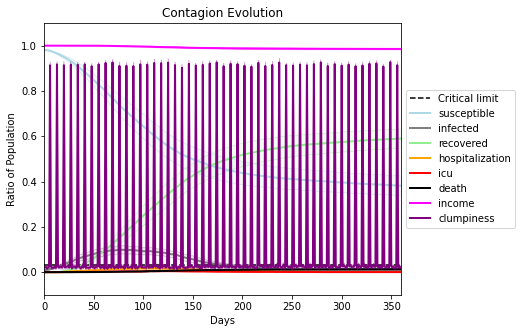

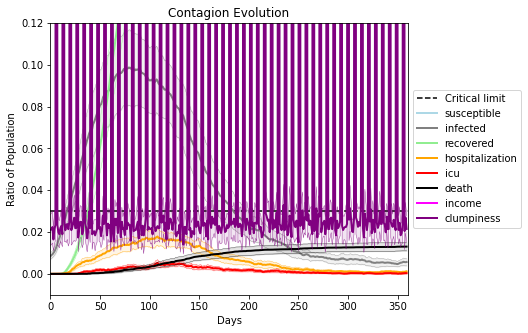

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[25, 7160, 2229, 3818, 7562, 5175, 4216, 9412, 8262, 5605, 9563, 6106, 3364, 7308, 774, 1252, 2396, 4270, 6888, 9205]
Average similarity between family members is 0.14384765475224137 at temperature 0
Average similarity between family and home is 0.9998579543529484 at temperature -1
Average similarity between students and their classroom is 0.13396434904690996 at temperature 0
Average classroom occupancy is 3.9420289855072466 and number classrooms is 69
Average similarity between workers is 0.14670722827240085 at temperature 0
Average office occupancy is 3.2058823529411766 and number offices is 204
Average friend similarity for adults: 0.2045228487752668 for kids: 0.18823859077188965
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 6 people.
Total of 6 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Homogeneou

avg restaurant similarity 0.028482116212964148
avg restaurant similarity 0.012346917646009738
avg restaurant similarity 0.0672165112787895
avg restaurant similarity 0.0487207881284064
avg restaurant similarity 0.08307606940941145
avg restaurant similarity 0.03470630748570804
avg restaurant similarity 0.06425271849120126
avg restaurant similarity 0.03331536074362799
avg restaurant similarity 0.03517564008703225
avg restaurant similarity 0.0534877637305478
avg restaurant similarity 0.05800417898019721
avg restaurant similarity 0.025696622164076564
avg restaurant similarity 0.04278729855909026
avg restaurant similarity 0.04003582483702404
avg restaurant similarity 0.01710591923723663
avg restaurant similarity 0.03583657136764529
avg restaurant similarity 0.05669406139269289
avg restaurant similarity 0.05097626312387976
avg restaurant similarity 0.053125718341064075
avg restaurant similarity 0.06656763491952673
avg restaurant similarity 0.07322358806838475
avg restaurant similarity 0.03753

avg restaurant similarity 0.03571411577282323
avg restaurant similarity 0.05602624255468438
avg restaurant similarity 0.02015093450500175
avg restaurant similarity 0.09885301001616464
avg restaurant similarity 0.03323470236264157
avg restaurant similarity 0.06810733004508869
avg restaurant similarity 0.07393333186831373
avg restaurant similarity 0.03217637869567785
avg restaurant similarity 0.07927575846176353
avg restaurant similarity 0.05508070512725361
avg restaurant similarity 0.06986387299326796
avg restaurant similarity 0.048696681343316936
avg restaurant similarity 0.0892180112587514
avg restaurant similarity 0.03756500373203218
avg restaurant similarity 0.085288567220192
avg restaurant similarity 0.05671190169632214
avg restaurant similarity 0.07627480229828255
avg restaurant similarity 0.059929184730722285
avg restaurant similarity 0.08239148563052512
avg restaurant similarity 0.05625890386815092
avg restaurant similarity 0.06465236248297113
avg restaurant similarity 0.0442690

avg restaurant similarity 0.042406895680215724
avg restaurant similarity 0.06676598231015768
avg restaurant similarity 0.0720194703648608
avg restaurant similarity 0.07322845297176744
avg restaurant similarity 0.1119386841074421
avg restaurant similarity 0.04268390756520646
avg restaurant similarity 0.04822796930003657
avg restaurant similarity 0.04615934820948371
avg restaurant similarity 0.053124914850723584
avg restaurant similarity 0.04614277430862836
avg restaurant similarity 0.043291825057667016
avg restaurant similarity 0.07112142564927987
avg restaurant similarity 0.010294912486178077
avg restaurant similarity 0.023886092972661123
avg restaurant similarity -0.014564834239266052
avg restaurant similarity 0.015316589593769235
avg restaurant similarity 0.10872594187640683
avg restaurant similarity 0.08790925536414705
avg restaurant similarity 0.06798263127132559
avg restaurant similarity 0.031978610097105495
avg restaurant similarity 0.06114858935318413
avg restaurant similarity 0

avg restaurant similarity 0.040860415615651104
avg restaurant similarity 0.07335754027402851
avg restaurant similarity 0.020472325993442713
avg restaurant similarity 0.046478498954380776
avg restaurant similarity 0.045532056711321094
avg restaurant similarity 0.022052260264452308
avg restaurant similarity 0.03552925903242753
avg restaurant similarity 0.009479269891196804
avg restaurant similarity 0.010165406354176114
avg restaurant similarity 0.06110039399925936
avg restaurant similarity 0.08883095262561481
avg restaurant similarity 0.04553911375896259
avg restaurant similarity 0.01565695442129219
avg restaurant similarity 0.01880859282802482
avg restaurant similarity 0.0565810565914821
avg restaurant similarity 0.033615226002088584
avg restaurant similarity 0.08301526359117489
avg restaurant similarity 0.018780387817419246
avg restaurant similarity 0.09754595612275549
avg restaurant similarity 0.06229962641025113
avg restaurant similarity 0.06773619324036731
avg restaurant similarity 

avg restaurant similarity 0.06858966236986358
avg restaurant similarity 0.0019983871835074145
avg restaurant similarity 0.03310817373613361
avg restaurant similarity 0.0635136176136388
avg restaurant similarity 0.017400426875599555
avg restaurant similarity 0.041663588594176376
avg restaurant similarity 0.07468907473112969
avg restaurant similarity -0.009765436484344563
avg restaurant similarity 0.034447118741622436
avg restaurant similarity 0.10578617649218934
avg restaurant similarity 0.02657596206126833
avg restaurant similarity 0.06816534904331072
avg restaurant similarity 0.021796356987328715
avg restaurant similarity -0.015299020149075157
avg restaurant similarity 0.0385793628467053
avg restaurant similarity 0.059967343155410566
avg restaurant similarity 0.04819581627922727
avg restaurant similarity 0.07512094249998288
avg restaurant similarity 0.03112131328476125
avg restaurant similarity 0.042028862058750796
avg restaurant similarity 0.024140034352439957
avg restaurant similari

avg restaurant similarity 0.056183829668470034
avg restaurant similarity 0.052442508225479446
avg restaurant similarity 0.06068742622167835
avg restaurant similarity 0.01143178050056793
avg restaurant similarity 0.04544062244150806
avg restaurant similarity 0.047956104821192405
avg restaurant similarity 0.08350896922532673
avg restaurant similarity 0.08810279544103625
avg restaurant similarity 0.014004027338147198
avg restaurant similarity 0.04871228632678621
avg restaurant similarity 0.01749410758461719
avg restaurant similarity 0.045106877935008796
avg restaurant similarity 0.04344159453755018
avg restaurant similarity 0.04742322575209355
avg restaurant similarity 0.024451044584792723
avg restaurant similarity 0.08528428810718737
avg restaurant similarity 0.05536822196847289
avg restaurant similarity 0.05999410636622756
avg restaurant similarity -0.004481195560466246
avg restaurant similarity 0.016981634942565837
avg restaurant similarity 0.06912907089394978
avg restaurant similarity

avg restaurant similarity 0.03628350187276585
avg restaurant similarity 0.10102219307879698
avg restaurant similarity 0.05275471642789552
avg restaurant similarity 0.08990064135745085
avg restaurant similarity 0.04178077549669698
avg restaurant similarity 0.022070865174639374
avg restaurant similarity 0.11233889292185716
avg restaurant similarity 0.059292921827395983
avg restaurant similarity -0.0006302826198441098
avg restaurant similarity 0.07340526936184022
avg restaurant similarity 0.06799088884213197
avg restaurant similarity 0.0436987338996514
avg restaurant similarity 0.06244862859931064
avg restaurant similarity 0.09979304251984386
avg restaurant similarity 0.051479387677295874
avg restaurant similarity 0.08684661727490438
avg restaurant similarity 0.11344850452538703
avg restaurant similarity 0.04001385541970485
avg restaurant similarity 0.07119599731515737
avg restaurant similarity 0.0765575299757186
avg restaurant similarity 0.026465576824761614
avg restaurant similarity 0.0

avg restaurant similarity 0.023516691418262008
avg restaurant similarity 0.024226693385503918
avg restaurant similarity 0.03065811337377601
avg restaurant similarity 0.06943852467508374
avg restaurant similarity 0.08030004320847284
avg restaurant similarity 0.08108748400942152
avg restaurant similarity 0.06407213209577507
avg restaurant similarity 0.07977919040205343
avg restaurant similarity 0.07106446360691895
avg restaurant similarity 0.01380441344028968
avg restaurant similarity 0.08340442395236293
avg restaurant similarity 0.04216640145858399
avg restaurant similarity 0.01765292557895523
avg restaurant similarity 0.08471388622640354
avg restaurant similarity 0.10574215006059523
avg restaurant similarity 0.08694392058497574
avg restaurant similarity 0.0377931220061302
avg restaurant similarity 0.03618747196375984
avg restaurant similarity 0.0111390994287086
avg restaurant similarity 0.052463458878274694
avg restaurant similarity 0.03314101882090845
avg restaurant similarity 0.07405

avg restaurant similarity 0.05565009149247076
avg restaurant similarity 0.046362752841544196
avg restaurant similarity 0.05757522084742565
avg restaurant similarity 0.06059187503142205
avg restaurant similarity 0.07292049869104172
avg restaurant similarity 0.08206869853460007
avg restaurant similarity 0.044772907582636204
avg restaurant similarity 0.07505106929569375
avg restaurant similarity 0.00885706229565252
avg restaurant similarity 0.06699761582178372
avg restaurant similarity 0.05689509078891427
avg restaurant similarity 0.05383486703068106
avg restaurant similarity 0.11647907773479717
avg restaurant similarity 0.03910377759810674
avg restaurant similarity 0.03919860888073958
avg restaurant similarity 0.07380518421992041
avg restaurant similarity 0.043264730566224055
avg restaurant similarity 0.04532877257199964
avg restaurant similarity 0.05088898330783158
avg restaurant similarity 0.07589628410758875
avg restaurant similarity 0.05075690028979175
avg restaurant similarity 0.031

avg restaurant similarity 0.048395441595543064
avg restaurant similarity 0.08096400532055611
avg restaurant similarity 0.08204436686823148
avg restaurant similarity 0.04477701252964352
avg restaurant similarity 0.08248618409618813
avg restaurant similarity 0.052565438267673084
avg restaurant similarity 0.05581385812284239
avg restaurant similarity 0.09180593430985758
avg restaurant similarity 0.07484959180889668
avg restaurant similarity 0.08341064626269404
avg restaurant similarity 0.07632718869451709
avg restaurant similarity 0.06800418454205738
avg restaurant similarity 0.07481131716511924
avg restaurant similarity 0.047530034599198356
avg restaurant similarity 0.0771257828909681
avg restaurant similarity 0.09154170073916977
avg restaurant similarity 0.06939483514930349
avg restaurant similarity 0.04051475641519491
avg restaurant similarity 0.05386929425505494
avg restaurant similarity 0.08981135233925204
avg restaurant similarity 0.055101877661401094
avg restaurant similarity 0.015

avg restaurant similarity 0.054483002019408644
avg restaurant similarity 0.03434398732369546
avg restaurant similarity 0.09486531026134817
avg restaurant similarity 0.06310328689915976
avg restaurant similarity 0.06127720672191799
avg restaurant similarity 0.07717113790933924
avg restaurant similarity 0.08779003402151525
avg restaurant similarity 0.08653458053385313
avg restaurant similarity 0.04242561702455451
avg restaurant similarity 0.08228633707002936
avg restaurant similarity 0.07264137533779712
avg restaurant similarity 0.05187155599624581
avg restaurant similarity 0.07684482042393484
avg restaurant similarity 0.005862466387990311
avg restaurant similarity 0.06786758179512395
avg restaurant similarity 0.0811820838160275
avg restaurant similarity 0.06343039299932528
avg restaurant similarity 0.1000002078645206
avg restaurant similarity 0.08649511731674714
avg restaurant similarity 0.018297540327485557
avg restaurant similarity 0.08795928025571569
avg restaurant similarity 0.08401

avg restaurant similarity 0.05002830048146563
avg restaurant similarity 0.06811919728772993
avg restaurant similarity 0.08626709960140855
avg restaurant similarity 0.05851340876874675
avg restaurant similarity 0.08336591831597936
avg restaurant similarity 0.08914859388680366
avg restaurant similarity 0.08260507229296876
avg restaurant similarity 0.07534337057008791
avg restaurant similarity 0.1025488590540581
avg restaurant similarity 0.0326800677607815
avg restaurant similarity 0.09466883057117675
avg restaurant similarity 0.07678041875716228
avg restaurant similarity 0.031026031196592044
avg restaurant similarity 0.0563362080043367
avg restaurant similarity 0.04845479914153708
avg restaurant similarity 0.10403083616681788
avg restaurant similarity 0.08852685367160983
avg restaurant similarity 0.0942124276335693
avg restaurant similarity 0.10716166314757714
avg restaurant similarity 0.09969761216498917
avg restaurant similarity 0.08479685998459585
avg restaurant similarity 0.121628299

avg restaurant similarity 0.04144063084133967
avg restaurant similarity 0.06010039520990065
avg restaurant similarity 0.08672310058758767
avg restaurant similarity 0.04879283239419143
avg restaurant similarity 0.07320640020712822
avg restaurant similarity 0.027132280772669316
avg restaurant similarity 0.10797685146835143
avg restaurant similarity 0.08361307268738027
avg restaurant similarity 0.018573214387920145
avg restaurant similarity 0.06786181677963675
avg restaurant similarity 0.06131134771996116
avg restaurant similarity 0.031022528632377443
avg restaurant similarity 0.040490277616206195
avg restaurant similarity 0.03071840966263213
avg restaurant similarity 0.05312889099717631
avg restaurant similarity 0.02433383793332382
avg restaurant similarity 0.06107943696471981
avg restaurant similarity 0.10319483544819844
avg restaurant similarity 0.03445638618388629
avg restaurant similarity 0.055031763527906515
avg restaurant similarity 0.03412381939832324
avg restaurant similarity 0.0

avg restaurant similarity -0.0031041500393266357
avg restaurant similarity 0.02511608116808314
avg restaurant similarity 0.05060094711446594
avg restaurant similarity 0.06913546875244943
avg restaurant similarity 0.09545936525559427
avg restaurant similarity 0.07751268720422166
avg restaurant similarity 0.04883829393591803
avg restaurant similarity 0.05336299052639803
avg restaurant similarity 0.03379639910201201
avg restaurant similarity 0.062303441167685714
avg restaurant similarity 0.0253312007957703
avg restaurant similarity 0.010019193775096462
avg restaurant similarity 0.030587136677164884
avg restaurant similarity 0.011093120588123173
avg restaurant similarity 0.06739424323416343
avg restaurant similarity 0.028387562048769806
avg restaurant similarity 0.042578075671930816
avg restaurant similarity 0.06838762482781696
avg restaurant similarity 0.05126963393088579
avg restaurant similarity 0.037728869447545256
avg restaurant similarity 0.04927229501012048
avg restaurant similarity

avg restaurant similarity 0.03517032208868432
avg restaurant similarity 0.05601039182437872
avg restaurant similarity 0.06734454352656956
avg restaurant similarity 0.06436595125180823
avg restaurant similarity 0.045763572838437336
avg restaurant similarity 0.030275792752876306
avg restaurant similarity 0.055203641944241974
avg restaurant similarity 0.07814731525920943
avg restaurant similarity 0.07063215121908595
avg restaurant similarity 0.060065992934765854
avg restaurant similarity 0.07433275344745158
avg restaurant similarity 0.02035564988180512
avg restaurant similarity 0.06004247118681617
avg restaurant similarity 0.07483630307125913
avg restaurant similarity 0.05325208604218333
avg restaurant similarity 0.0429341390019406
avg restaurant similarity 0.025973216424590894
avg restaurant similarity 0.06936195178845585
avg restaurant similarity 0.04579754873066487
avg restaurant similarity 0.016610363592539933
avg restaurant similarity 0.06697262030577443
avg restaurant similarity 0.0

avg restaurant similarity 0.09336381723690872
avg restaurant similarity 0.059886517102226505
avg restaurant similarity 0.06759415268604406
avg restaurant similarity 0.08843745020670643
avg restaurant similarity 0.023201495390124338
avg restaurant similarity 0.10297413405502902
avg restaurant similarity 0.05640102007831529
avg restaurant similarity 0.034831492081397145
avg restaurant similarity 0.028193547503556286
avg restaurant similarity 0.05812995592379222
avg restaurant similarity 0.06750206735706483
avg restaurant similarity 0.05994969462533416
avg restaurant similarity 0.043493706827309166
avg restaurant similarity 0.03867461341212592
avg restaurant similarity 0.045426884158473034
avg restaurant similarity 0.047167222030122836
avg restaurant similarity 0.03226451464096612
avg restaurant similarity 0.09614303949296281
avg restaurant similarity 0.057474414917201296
avg restaurant similarity 0.051452855129896544
avg restaurant similarity 0.08099175549584733
avg restaurant similarity

avg restaurant similarity 0.09428337581849756
avg restaurant similarity -0.012211198105321857
avg restaurant similarity -0.02913213734727776
avg restaurant similarity 0.07068876131345798
avg restaurant similarity 0.07661000465381626
avg restaurant similarity 0.039389161666326604
avg restaurant similarity 0.04096495620427303
avg restaurant similarity 0.08024574990014918
avg restaurant similarity 0.006304469657992338
avg restaurant similarity 0.04290299047615137
avg restaurant similarity 0.025050684313870884
avg restaurant similarity 0.05632690367531602
avg restaurant similarity 0.017817341204839153
avg restaurant similarity 0.041839732026646814
avg restaurant similarity 0.0626830987543222
avg restaurant similarity 0.021307219639245183
avg restaurant similarity 0.051179250857794116
avg restaurant similarity 0.04435825561377646
avg restaurant similarity 0.052513939547768236
avg restaurant similarity 0.0781964529270413
avg restaurant similarity 0.033248279657970364
avg restaurant similarit

avg restaurant similarity 0.05042790262665963
avg restaurant similarity 0.002958999412458276
avg restaurant similarity 0.08009570102621405
avg restaurant similarity 0.02610457204101579
avg restaurant similarity 0.003481193205879264
avg restaurant similarity 0.08489854060225141
avg restaurant similarity 0.07803508735482896
avg restaurant similarity 0.05822633822097084
avg restaurant similarity 0.023370374089612664
avg restaurant similarity 0.060049345594240744
avg restaurant similarity 0.03073774005470653
avg restaurant similarity 0.06605245889544828
avg restaurant similarity 0.07271874430326218
avg restaurant similarity 0.09572217086974445
avg restaurant similarity 0.04432817358363692
avg restaurant similarity 0.07795144916024464
avg restaurant similarity 0.050482093250608547
avg restaurant similarity 0.04940163169820646
avg restaurant similarity 0.0844942827379069
avg restaurant similarity 0.06691997332167939
avg restaurant similarity 0.08886240846521555
avg restaurant similarity 0.07

avg restaurant similarity 0.03815239521134885
avg restaurant similarity 0.051197238486547454
avg restaurant similarity 0.05474554262274106
avg restaurant similarity 0.05488553665782695
avg restaurant similarity 0.06010740762399221
avg restaurant similarity 0.026886239823225456
avg restaurant similarity 0.030564260555597557
avg restaurant similarity 0.04739902051351637
avg restaurant similarity 0.07752275839208318
avg restaurant similarity 0.0121674453608056
avg restaurant similarity 0.030008191330586926
avg restaurant similarity 0.05197488741414926
avg restaurant similarity 0.021134708503263683
avg restaurant similarity 0.06248180387277847
avg restaurant similarity 0.037374141611065566
avg restaurant similarity 0.04137423172857491
avg restaurant similarity 0.022664793457851606
avg restaurant similarity 0.014008566972952302
avg restaurant similarity 0.06470276390684584
avg restaurant similarity 0.05659980628431977
avg restaurant similarity 0.05287411575306752
avg restaurant similarity 0

avg restaurant similarity 0.041500263127269184
avg restaurant similarity 0.04172163446291601
avg restaurant similarity 0.046241837441753524
avg restaurant similarity 0.05649579574792879
avg restaurant similarity 0.032584523957726916
avg restaurant similarity 0.06967399962505946
avg restaurant similarity 0.015629535120030243
avg restaurant similarity 0.09965385039261797
avg restaurant similarity 0.022626479982169205
avg restaurant similarity 0.030566763323974306
avg restaurant similarity 0.053088794996764735
avg restaurant similarity 0.016930109795884236
avg restaurant similarity 0.013693923767332446
avg restaurant similarity 0.06865772655229663
avg restaurant similarity 0.07482113835062361
avg restaurant similarity 0.03103097821534585
avg restaurant similarity 0.08825795989468645
avg restaurant similarity 0.02479966718831286
avg restaurant similarity -0.012211487988066724
avg restaurant similarity 0.019692071687945647
avg restaurant similarity 0.05496710819753812
avg restaurant similar

avg restaurant similarity 0.07796025952676941
avg restaurant similarity 0.0653136848874535
avg restaurant similarity 0.052644945348539855
avg restaurant similarity 0.10510976955964307
avg restaurant similarity 0.0376305877708827
avg restaurant similarity 0.0563746677904998
avg restaurant similarity 0.035216221110013574
avg restaurant similarity 0.028013253957812328
avg restaurant similarity 0.07248208998025418
avg restaurant similarity 0.056937222109783865
avg restaurant similarity 0.05271971357613473
avg restaurant similarity 0.08095677769229663
avg restaurant similarity 0.04993619033098268
avg restaurant similarity 0.0562203963053516
avg restaurant similarity 0.05671487572752059
avg restaurant similarity 0.0824062830266764
avg restaurant similarity 0.04830616409886211
avg restaurant similarity 0.09013739372306641
avg restaurant similarity 0.07918828706458485
avg restaurant similarity 0.047294965929984605
avg restaurant similarity 0.07959009537511107
avg restaurant similarity 0.080941

avg restaurant similarity 0.03056129016859872
avg restaurant similarity 0.024763988103237437
avg restaurant similarity 0.06501237371674809
avg restaurant similarity 0.05371759792341994
avg restaurant similarity 0.05190916438331094
avg restaurant similarity 0.06203442203735604
avg restaurant similarity 0.08032664428794191
avg restaurant similarity 0.004200848300494903
avg restaurant similarity 0.06562021808249331
avg restaurant similarity 0.05570142997070877
avg restaurant similarity 0.0029690983194473487
avg restaurant similarity 0.03949791147497917
avg restaurant similarity 0.05856673359821369
avg restaurant similarity 0.08562674687521407
avg restaurant similarity 0.0375078623726727
avg restaurant similarity 0.08332849824307802
avg restaurant similarity 0.04718385969719362
avg restaurant similarity 0.02608336246634226
avg restaurant similarity 0.06684683696924883
avg restaurant similarity 0.05303736017048948
avg restaurant similarity 0.05692847343623601
avg restaurant similarity 0.029

avg restaurant similarity 0.026660431348461276
avg restaurant similarity 0.004327080093330013
avg restaurant similarity 0.10381302708610562
avg restaurant similarity 0.03706905189548014
avg restaurant similarity 0.05065653959958713
avg restaurant similarity 0.09920692764223452
avg restaurant similarity 0.06836635458556511
avg restaurant similarity 0.16486143891720692
avg restaurant similarity 0.12852690684058615
avg restaurant similarity 0.06926674224473428
avg restaurant similarity -0.045458102478673344
avg restaurant similarity 0.06534463319564564
avg restaurant similarity 0.09622658587072183
avg restaurant similarity 0.04438854201943428
avg restaurant similarity 0.09002017151060147
avg restaurant similarity 0.0436454186598441
avg restaurant similarity -0.006084646877879822
avg restaurant similarity 0.04308467436699543
avg restaurant similarity 0.08970590984890195
avg restaurant similarity 0.06505032076096083
avg restaurant similarity 0.05406344723382868
avg restaurant similarity 0.1

avg restaurant similarity 0.08073171089962872
avg restaurant similarity 0.0991108895897136
avg restaurant similarity 0.055648597224281934
avg restaurant similarity 0.034139719184700594
avg restaurant similarity -0.008704698863737852
avg restaurant similarity 0.08140525730445013
avg restaurant similarity 0.0327263278902155
avg restaurant similarity 0.05214147102325442
avg restaurant similarity 0.038319296513777544
avg restaurant similarity 0.03222551050923443
avg restaurant similarity 0.0070768965330161885
avg restaurant similarity 0.0407160973010099
avg restaurant similarity 0.02033661563178985
avg restaurant similarity 0.020712581597865952
avg restaurant similarity 0.07151331507853967
avg restaurant similarity 0.10511944333740815
avg restaurant similarity 0.09250007337578436
avg restaurant similarity 0.03769207600510757
avg restaurant similarity 0.014123537113836931
avg restaurant similarity 0.08895178157812747
avg restaurant similarity 0.10294360591167821
avg restaurant similarity 0.

avg restaurant similarity 0.07017438276455916
avg restaurant similarity 0.06412418402815541
avg restaurant similarity 0.02811573679928802
avg restaurant similarity 0.0813011002440527
avg restaurant similarity 0.010577150415490589
avg restaurant similarity 0.05763361889483812
avg restaurant similarity 0.06388755021652745
avg restaurant similarity 0.06264467288190079
avg restaurant similarity 0.046413591553944096
avg restaurant similarity 0.019694971362829043
avg restaurant similarity 0.08845063784280924
avg restaurant similarity 0.08911318354505354
avg restaurant similarity 0.055671595784184756
avg restaurant similarity 0.1119084395985104
avg restaurant similarity 0.06547328110351303
avg restaurant similarity 0.06872411984150874
avg restaurant similarity 0.05846227341047444
avg restaurant similarity 0.04814865424919207
avg restaurant similarity 0.09667350237187342
avg restaurant similarity 0.012988021860464648
avg restaurant similarity 0.06596912887999838
avg restaurant similarity 0.025

avg restaurant similarity 0.05587561953109688
avg restaurant similarity 0.04354046757460756
avg restaurant similarity 0.03747500536529817
avg restaurant similarity 0.07032489825438255
avg restaurant similarity 0.07217672967496043
avg restaurant similarity 0.08467702419333967
avg restaurant similarity 0.05113521362862792
avg restaurant similarity 0.019805806488555094
avg restaurant similarity 0.04254829670576831
avg restaurant similarity 0.02574590682643038
avg restaurant similarity 0.07025665115454517
avg restaurant similarity -0.005462311007715914
avg restaurant similarity 0.01386866693682328
avg restaurant similarity 0.047472940224566704
avg restaurant similarity 0.0444659874126654
avg restaurant similarity 0.06621334702091583
avg restaurant similarity 0.02369837930354343
avg restaurant similarity 0.04004490319624368
avg restaurant similarity 0.08709208327589438
avg restaurant similarity 0.016284002841580426
avg restaurant similarity 0.03633446723916143
avg restaurant similarity 0.02

avg restaurant similarity 0.029947295338387022
avg restaurant similarity 0.061218643170270245
avg restaurant similarity 0.06425346167655512
avg restaurant similarity 0.05337530778900521
avg restaurant similarity 0.0740932408181621
avg restaurant similarity 0.05093144610030614
avg restaurant similarity 0.04501262559002045
avg restaurant similarity 0.05403367733034699
avg restaurant similarity 0.04630671376275432
avg restaurant similarity 0.046601132475709496
avg restaurant similarity 0.042903590909996174
avg restaurant similarity 0.04956795614528909
avg restaurant similarity 0.02926132593374871
avg restaurant similarity 0.0342277097629748
avg restaurant similarity 0.022056147949798748
avg restaurant similarity 0.08307313318680876
avg restaurant similarity 0.09636838991818518
avg restaurant similarity 0.04794988262499335
avg restaurant similarity 0.03465316009612864
avg restaurant similarity 0.08878604928177668
avg restaurant similarity 0.05761296735233328
avg restaurant similarity 0.071

avg restaurant similarity 0.048638921909243134
avg restaurant similarity 0.053361118794290424
avg restaurant similarity 0.058326735581822525
avg restaurant similarity 0.06725710892653658
avg restaurant similarity 0.02498773354025099
avg restaurant similarity 0.03046537436558997
avg restaurant similarity 0.02422546139049615
avg restaurant similarity 0.04674354485968374
avg restaurant similarity 0.03410428994211532
avg restaurant similarity 0.044909562501293396
avg restaurant similarity 0.07951463065083074
avg restaurant similarity 0.0507018431138914
avg restaurant similarity 0.057525664569741175
avg restaurant similarity 0.058938031455513205
avg restaurant similarity 0.05302815916100967
avg restaurant similarity 0.05571317814538916
avg restaurant similarity 0.014766227119039504
avg restaurant similarity 0.06580503769179258
avg restaurant similarity 0.04304709554583533
avg restaurant similarity 0.06917758224553983
avg restaurant similarity 0.11158614680376315
avg restaurant similarity 0.

avg restaurant similarity 0.06966795488826633
avg restaurant similarity 0.0749675850762415
avg restaurant similarity 0.0643103774828218
avg restaurant similarity 0.06590638226502699
avg restaurant similarity 0.1409406105154887
avg restaurant similarity 0.09470485061984193
avg restaurant similarity 0.027946033408678055
avg restaurant similarity 0.02389354359549775
avg restaurant similarity 0.10973339260588973
avg restaurant similarity 0.07220945468639552
avg restaurant similarity 0.071264132195946
avg restaurant similarity 0.09728423811978465
avg restaurant similarity 0.0868146702772213
avg restaurant similarity 0.09014864655369169
avg restaurant similarity 0.07310318011271673
avg restaurant similarity 0.0685838390735321
avg restaurant similarity 0.08616613061080253
avg restaurant similarity 0.07671775099655258
avg restaurant similarity 0.043438582818299744
avg restaurant similarity 0.08214910599327971
avg restaurant similarity 0.10501973850109736
avg restaurant similarity 0.05355582424

avg restaurant similarity 0.004979568320756913
avg restaurant similarity 0.06415215964233563
avg restaurant similarity 0.05860485445168519
avg restaurant similarity 0.1003752109942528
avg restaurant similarity 0.08738430033876134
avg restaurant similarity 0.06186735446262394
avg restaurant similarity 0.062321343769914876
avg restaurant similarity 0.07888445992873487
avg restaurant similarity 0.04894672389215749
avg restaurant similarity 0.0007523163172846565
avg restaurant similarity 0.10484563720685644
avg restaurant similarity 0.07041059877615809
avg restaurant similarity 0.10243284567328795
avg restaurant similarity 0.04085690872886336
avg restaurant similarity 0.09244794855930252
avg restaurant similarity 0.02131047983760264
avg restaurant similarity 0.049214201007241345
avg restaurant similarity 0.07435460872243076
avg restaurant similarity 0.08046036918786209
avg restaurant similarity 0.046410645724675424
avg restaurant similarity 0.09730191849459943
avg restaurant similarity 0.0

avg restaurant similarity 0.05987996408619381
avg restaurant similarity 0.08074610741700997
avg restaurant similarity 0.05143049888095951
avg restaurant similarity 0.08937695534641761
avg restaurant similarity 0.03868870649534362
avg restaurant similarity 0.01910405528919587
avg restaurant similarity 0.054427751810088174
avg restaurant similarity -0.00354195956711582
avg restaurant similarity 0.07966387104054307
avg restaurant similarity 0.041756248208603707
avg restaurant similarity 0.044143386001440826
avg restaurant similarity 0.0805486043112111
avg restaurant similarity 0.051137256290777984
avg restaurant similarity 0.10135252492554415
avg restaurant similarity 0.08059945869869375
avg restaurant similarity 0.06953033031924985
avg restaurant similarity 0.0359658521887695
avg restaurant similarity 0.07698768608029248
avg restaurant similarity 0.0815751450484345
avg restaurant similarity 0.07571161911729644
avg restaurant similarity 0.05587276376246785
avg restaurant similarity 0.0985

avg restaurant similarity 0.029554523953088906
avg restaurant similarity 0.07715802331976931
avg restaurant similarity 0.08730424298100081
avg restaurant similarity 0.07204883075082337
avg restaurant similarity 0.06423906314806892
avg restaurant similarity 0.06015588871782124
avg restaurant similarity 0.04460767985651037
avg restaurant similarity 0.033302897327992353
avg restaurant similarity 0.0574823515141371
avg restaurant similarity 0.09698128989855116
avg restaurant similarity 0.04258557697126011
avg restaurant similarity 0.042567280553991026
avg restaurant similarity 0.05204777858845015
avg restaurant similarity 0.05871813189851727
avg restaurant similarity 0.09972586027507561
avg restaurant similarity 0.07953918165860313
avg restaurant similarity 0.03281983801099427
avg restaurant similarity 0.0922560015837804
avg restaurant similarity 0.08028429765258827
avg restaurant similarity 0.06293038833325036
avg restaurant similarity 0.07855414791425942
avg restaurant similarity 0.01142

avg restaurant similarity 0.008589112467860427
avg restaurant similarity 0.01521821478870567
avg restaurant similarity 0.044408115990093415
avg restaurant similarity 0.02431544863616027
avg restaurant similarity 0.034753220394119794
avg restaurant similarity 0.04972847191197088
avg restaurant similarity 0.03153727279941059
avg restaurant similarity 0.05219584084153584
avg restaurant similarity 0.02002667331212619
avg restaurant similarity 0.019238242183090653
avg restaurant similarity 0.009674770612382852
avg restaurant similarity 0.093462775039231
avg restaurant similarity 0.05224700276421547
avg restaurant similarity 0.008220483262458849
avg restaurant similarity 0.03132773264548522
avg restaurant similarity 0.0414006995057117
avg restaurant similarity 0.023942144977443926
avg restaurant similarity 0.09670227016663845
avg restaurant similarity -0.004998585730345363
avg restaurant similarity 0.06297637415929934
avg restaurant similarity 0.022614447268417402
avg restaurant similarity 0

avg restaurant similarity 0.013932729823372047
avg restaurant similarity 0.048758991301349024
avg restaurant similarity 0.010202165262176306
avg restaurant similarity 0.05382908962984174
avg restaurant similarity 0.018216397631269487
avg restaurant similarity 0.056540240066797844
avg restaurant similarity 0.04805060478760188
avg restaurant similarity 0.02389347867950352
avg restaurant similarity -0.005862006387952773
avg restaurant similarity 0.056676972066289195
avg restaurant similarity 0.018753546025653458
avg restaurant similarity 0.04495614631877169
avg restaurant similarity 0.052914701173445086
avg restaurant similarity 0.006370026522727406
avg restaurant similarity 0.07192473723890079
avg restaurant similarity 0.027327800896139096
avg restaurant similarity -0.005571536391611232
avg restaurant similarity 0.03503727922292225
avg restaurant similarity 0.04964533947465312
avg restaurant similarity 0.039063299884824584
avg restaurant similarity -0.006771840060908404
avg restaurant si

avg restaurant similarity 0.06882806894362686
avg restaurant similarity 0.08419517698655583
avg restaurant similarity 0.0445456944339677
avg restaurant similarity 0.018671273794192436
avg restaurant similarity 0.06877506117252914
avg restaurant similarity 0.07169991878816889
avg restaurant similarity 0.04750156777922
avg restaurant similarity 0.11528965149568242
avg restaurant similarity 0.027286565794930513
avg restaurant similarity 0.043164285312586335
avg restaurant similarity 0.04431950911310996
avg restaurant similarity 0.0312888114985845
avg restaurant similarity 0.010379968489430085
avg restaurant similarity 0.053605681835951206
avg restaurant similarity 0.02976677780647194
avg restaurant similarity 0.08495040247588079
avg restaurant similarity 0.01779532760990277
avg restaurant similarity 0.06497370627761295
avg restaurant similarity 0.06545387332543776
avg restaurant similarity 0.056793638594526616
avg restaurant similarity 0.07171205612181702
avg restaurant similarity 0.03528

avg restaurant similarity 0.07122009692924518
avg restaurant similarity 0.015475414564769113
avg restaurant similarity 0.034288127734679694
avg restaurant similarity 0.048465141394400654
avg restaurant similarity 0.03787749151131753
avg restaurant similarity 0.06970921441628528
avg restaurant similarity 0.049788077624714745
avg restaurant similarity -0.01869457323993233
avg restaurant similarity 0.05076675451145579
avg restaurant similarity 0.052639645099438546
avg restaurant similarity 0.06035166784670674
avg restaurant similarity 0.059900177891335456
avg restaurant similarity 0.04385481797616312
avg restaurant similarity 0.01274824172586495
avg restaurant similarity 0.0398664480319023
avg restaurant similarity 0.01612969416132397
avg restaurant similarity 0.08070809696152173
avg restaurant similarity 0.025408258086212644
avg restaurant similarity 0.07412130577796536
avg restaurant similarity 0.07981997991197308
avg restaurant similarity 0.01730957743992201
avg restaurant similarity 0

avg restaurant similarity 0.030420529025645158
avg restaurant similarity 0.06814188864990249
avg restaurant similarity 0.07487179287068402
avg restaurant similarity 0.039695627972401594
avg restaurant similarity 0.06569779436810534
avg restaurant similarity 0.055969171564203946
avg restaurant similarity 0.04410023703974238
avg restaurant similarity 0.0659669755232465
avg restaurant similarity 0.06044126941386946
avg restaurant similarity 0.03711966215636713
avg restaurant similarity 0.09904238563893598
avg restaurant similarity 0.06910877463241846
avg restaurant similarity 0.08404762432932751
avg restaurant similarity 0.05375579546073707
avg restaurant similarity 0.05599346989356268
avg restaurant similarity 0.030965714231036258
avg restaurant similarity 0.08626074043480664
avg restaurant similarity 0.062488176254777275
avg restaurant similarity 0.0828011415752612
avg restaurant similarity 0.07931065751526749
avg restaurant similarity 0.058546603799217695
avg restaurant similarity 0.04

avg restaurant similarity 0.06426087512454942
avg restaurant similarity 0.0576102899790883
avg restaurant similarity 0.026541213633402644
avg restaurant similarity 0.05530166342005169
avg restaurant similarity 0.07506283636398531
avg restaurant similarity 0.03972443913320725
avg restaurant similarity 0.062069058823275264
avg restaurant similarity 0.08025911199204021
avg restaurant similarity 0.08281574637868805
avg restaurant similarity 0.05628406809242671
avg restaurant similarity 0.03458916022725121
avg restaurant similarity 0.07930355077098195
avg restaurant similarity 0.040655842780854344
avg restaurant similarity 0.051286590842276415
avg restaurant similarity 0.07530603024388474
avg restaurant similarity 0.09677108662641239
avg restaurant similarity 0.04923173186272116
avg restaurant similarity 0.0508665037632016
avg restaurant similarity 0.056513704617684436
avg restaurant similarity 0.029632880321553833
avg restaurant similarity 0.08429838391335442
avg restaurant similarity 0.05

avg restaurant similarity 0.09694124199292448
avg restaurant similarity 0.06800489791637618
avg restaurant similarity 0.027963371049139343
avg restaurant similarity 0.09547036686406786
avg restaurant similarity 0.06377810163754158
avg restaurant similarity 0.059592865179479815
avg restaurant similarity 0.031486480136272615
avg restaurant similarity 0.041210488971094694
avg restaurant similarity 0.03292862013321208
avg restaurant similarity 0.0635122321632747
avg restaurant similarity 0.047839472459045095
avg restaurant similarity 0.030025311880657313
avg restaurant similarity 0.06264689538937739
avg restaurant similarity 0.10476671298069855
avg restaurant similarity 0.03908551402698808
avg restaurant similarity 0.012649171149674525
avg restaurant similarity 0.09087401668649817
avg restaurant similarity 0.06354120431732016
avg restaurant similarity 0.10851001903676223
avg restaurant similarity 0.0599398508846144
avg restaurant similarity 0.0963100596547754
avg restaurant similarity 0.04

avg restaurant similarity 0.08927742134795816
avg restaurant similarity 0.08021788215653612
avg restaurant similarity 0.10546907449740969
avg restaurant similarity -0.011591988194040012
avg restaurant similarity 0.07962377671136517
avg restaurant similarity 0.07111325770027276
avg restaurant similarity 0.07997757740041311
avg restaurant similarity 0.06990114621477479
avg restaurant similarity 0.06305150804169947
avg restaurant similarity 0.10430033441290089
avg restaurant similarity 0.11608506011050788
avg restaurant similarity 0.05279001714379498
avg restaurant similarity 0.07854052447067686
avg restaurant similarity 0.1101046588316503
avg restaurant similarity 0.04155167130888853
avg restaurant similarity 0.10148749014312915
avg restaurant similarity 0.0801488859516463
avg restaurant similarity 0.020618748192661435
avg restaurant similarity 0.07287194820435852
avg restaurant similarity 0.041996664005189956
avg restaurant similarity 0.06055019067601175
avg restaurant similarity 0.0798

(<function dict.items>, <function dict.items>, <function dict.items>)

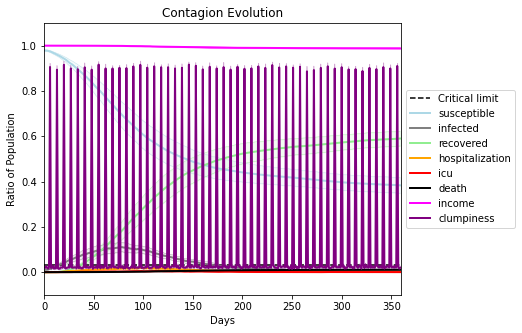

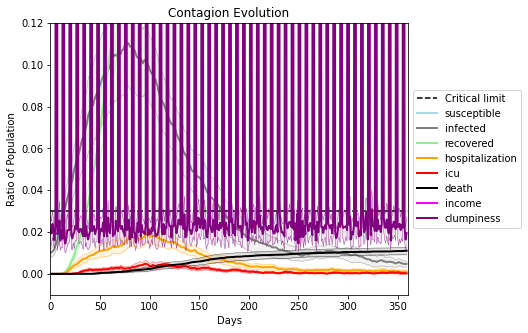

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
              [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
], listeners = listeners)

Save these seeds if you want to rerun a scenario
[5509, 1178, 9696, 4383, 4733, 1175, 487, 1023, 1522, 5297, 8016, 7944, 8543, 8059, 181, 8615, 2789, 3343, 1488, 9888]
Average similarity between family members is 0.45652364578144083 at temperature -0.9
Average similarity between family and home is 0.9998553162862112 at temperature -1
Average similarity between students and their classroom is 0.183646171523103 at temperature -0.9
Average classroom occupancy is 4.394366197183099 and number classrooms is 71
Average similarity between workers is 0.33837610604989143 at temperature -0.9
Average office occupancy is 3.196969696969697 and number offices is 198
Average friend similarity for adults: 0.5143328079593282 for kids: 0.38660058488406923
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 5 allocated units with a total of 15 people.
Total of 15 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
Ho

avg restaurant similarity 0.13826314886119098
avg restaurant similarity 0.14053705441696857
avg restaurant similarity 0.0992764522920224
avg restaurant similarity 0.14304432944365636
avg restaurant similarity 0.1360946436295607
avg restaurant similarity 0.13136105995741373
avg restaurant similarity 0.1185642553578933
avg restaurant similarity 0.07459525476301182
avg restaurant similarity 0.09732084721720659
avg restaurant similarity 0.08326440684711787
avg restaurant similarity 0.09278917258834468
avg restaurant similarity 0.11972553793354514
avg restaurant similarity 0.08547772928300212
avg restaurant similarity 0.12626839084732538
avg restaurant similarity 0.09195828618388058
avg restaurant similarity 0.15672992388615106
avg restaurant similarity 0.10200500824996975
avg restaurant similarity 0.1241168736393711
avg restaurant similarity 0.12932406234256655
avg restaurant similarity 0.1386801826085543
avg restaurant similarity 0.13446665870687416
avg restaurant similarity 0.09213159596

avg restaurant similarity 0.05134858083493119
avg restaurant similarity 0.09769097976801062
avg restaurant similarity 0.11440073440714088
avg restaurant similarity 0.10841548350404374
avg restaurant similarity 0.14733494434714753
avg restaurant similarity 0.12242627590724518
avg restaurant similarity 0.11280599831025344
avg restaurant similarity 0.1604003986787581
avg restaurant similarity 0.0947304996494817
avg restaurant similarity 0.13017865443648055
avg restaurant similarity 0.1415719948932816
avg restaurant similarity 0.16021921376064002
avg restaurant similarity 0.11808760323561202
avg restaurant similarity 0.10822048589593349
avg restaurant similarity 0.11803661106523575
avg restaurant similarity 0.11224962089696128
avg restaurant similarity 0.18121186023856306
avg restaurant similarity 0.1060516471383572
avg restaurant similarity 0.07867228603001504
avg restaurant similarity 0.124653778978473
avg restaurant similarity 0.15926343980896013
avg restaurant similarity 0.140790515906

avg restaurant similarity 0.08178289484643671
avg restaurant similarity 0.05902000458000312
avg restaurant similarity 0.11130153076492084
avg restaurant similarity 0.042293063169392874
avg restaurant similarity 0.04314847250446585
avg restaurant similarity 0.07900833387264561
avg restaurant similarity 0.07191958852965064
avg restaurant similarity 0.0376256206334774
avg restaurant similarity 0.03789635991678219
avg restaurant similarity 0.03071157124141581
avg restaurant similarity 0.0651075953314146
avg restaurant similarity 0.025720477619979736
avg restaurant similarity 0.0901075493518628
avg restaurant similarity 0.06429928372053044
avg restaurant similarity 0.09407997891151684
avg restaurant similarity -0.00024216933234077616
avg restaurant similarity 0.07213548179240067
avg restaurant similarity 0.09572898915155167
avg restaurant similarity 0.04706314698306905
avg restaurant similarity 0.06359027222725193
avg restaurant similarity 0.025392166299433347
avg restaurant similarity 0.08

avg restaurant similarity 0.12337832000624119
avg restaurant similarity 0.11373630240542802
avg restaurant similarity 0.03982252632725083
avg restaurant similarity 0.06980161204262449
avg restaurant similarity 0.10595115303201134
avg restaurant similarity 0.04806319248372973
avg restaurant similarity 0.08560614109036946
avg restaurant similarity 0.10770835854553437
avg restaurant similarity 0.0649132757655437
avg restaurant similarity 0.1336043587844135
avg restaurant similarity 0.04524476295491479
avg restaurant similarity 0.0072800156484324734
avg restaurant similarity 0.14831074017439713
avg restaurant similarity 0.08787861015732051
avg restaurant similarity 0.10447015499724982
avg restaurant similarity 0.07469872262282151
avg restaurant similarity 0.1033640524039233
avg restaurant similarity 0.036537997022834084
avg restaurant similarity 0.11483857391534051
avg restaurant similarity 0.13116736606053375
avg restaurant similarity 0.08656676489736051
avg restaurant similarity 0.061643

avg restaurant similarity 0.0830769700785854
avg restaurant similarity 0.08565842657132618
avg restaurant similarity 0.03461920078456833
avg restaurant similarity 0.10004946879680493
avg restaurant similarity 0.10117500032881419
avg restaurant similarity 0.10735547080928118
avg restaurant similarity 0.06645645258483408
avg restaurant similarity 0.0550415551901322
avg restaurant similarity 0.12063353533499058
avg restaurant similarity 0.015425034169397223
avg restaurant similarity 0.07424761992151584
avg restaurant similarity 0.12478818367875211
avg restaurant similarity 0.07164172219648843
avg restaurant similarity 0.08151544424493325
avg restaurant similarity 0.1136673270919726
avg restaurant similarity 0.10736404270334797
avg restaurant similarity 0.08672213430187796
avg restaurant similarity 0.078795658279739
avg restaurant similarity 0.11354355637884254
avg restaurant similarity 0.10933145934123192
avg restaurant similarity 0.10270202822517664
avg restaurant similarity 0.0616164708

avg restaurant similarity 0.09547734993238488
avg restaurant similarity 0.05129291022257157
avg restaurant similarity 0.11180337843805771
avg restaurant similarity 0.08421102425199255
avg restaurant similarity 0.036240001789002496
avg restaurant similarity 0.07942023038952867
avg restaurant similarity 0.058023296564349604
avg restaurant similarity 0.01827452146900048
avg restaurant similarity 0.06060822644309297
avg restaurant similarity 0.05656314737909428
avg restaurant similarity 0.0029543668059500362
avg restaurant similarity 0.08837258763400309
avg restaurant similarity 0.08448857073523855
avg restaurant similarity 0.03449370121472259
avg restaurant similarity 0.0931532800505099
avg restaurant similarity 0.03362626368773235
avg restaurant similarity 0.09162592090118668
avg restaurant similarity 0.13133622392340139
avg restaurant similarity 0.08127601887468557
avg restaurant similarity 0.08106797216005353
avg restaurant similarity 0.07267038787983256
avg restaurant similarity 0.112

avg restaurant similarity 0.09919766866392758
avg restaurant similarity 0.11261601583859429
avg restaurant similarity 0.0898910405919815
avg restaurant similarity 0.07858431826154101
avg restaurant similarity 0.16072709500842144
avg restaurant similarity 0.11802844452216793
avg restaurant similarity 0.13554209335375897
avg restaurant similarity 0.08546284621304065
avg restaurant similarity 0.09609610627270161
avg restaurant similarity 0.04724186599265496
avg restaurant similarity 0.08169691534146854
avg restaurant similarity 0.0645326885283173
avg restaurant similarity 0.10021768272401341
avg restaurant similarity 0.10297067304344176
avg restaurant similarity 0.08183505617183132
avg restaurant similarity 0.1443637387690193
avg restaurant similarity 0.07502911392627142
avg restaurant similarity 0.051409506763762505
avg restaurant similarity 0.12965687715341956
avg restaurant similarity 0.14868841061779342
avg restaurant similarity 0.08879381677962908
avg restaurant similarity 0.08014525

avg restaurant similarity 0.08603280315200125
avg restaurant similarity 0.0791971159493261
avg restaurant similarity 0.10912652649419982
avg restaurant similarity 0.09446592998709841
avg restaurant similarity 0.11409957464812566
avg restaurant similarity 0.04394489740480073
avg restaurant similarity 0.13223161133272474
avg restaurant similarity 0.10975989311350351
avg restaurant similarity 0.08943952673462653
avg restaurant similarity 0.0968237736448201
avg restaurant similarity 0.06531123607305497
avg restaurant similarity 0.09034611602639156
avg restaurant similarity 0.023683840767235356
avg restaurant similarity 0.04035421970018854
avg restaurant similarity 0.16798720794886005
avg restaurant similarity 0.15055498724322056
avg restaurant similarity 0.09504721686859535
avg restaurant similarity 0.06861355520822668
avg restaurant similarity 0.1031617066452896
avg restaurant similarity 0.05391666418310403
avg restaurant similarity 0.08522827039218399
avg restaurant similarity 0.07920342

avg restaurant similarity 0.11152307993165156
avg restaurant similarity 0.10218360523159398
avg restaurant similarity 0.14531631845414128
avg restaurant similarity 0.1449387184669906
avg restaurant similarity 0.07537977316642984
avg restaurant similarity 0.1274534578550129
avg restaurant similarity 0.050619198250905745
avg restaurant similarity 0.08955445281416141
avg restaurant similarity 0.04527212009323423
avg restaurant similarity 0.06440124164672024
avg restaurant similarity 0.07661021966180119
avg restaurant similarity 0.09193693673732542
avg restaurant similarity 0.14026461358794992
avg restaurant similarity 0.07475408099010816
avg restaurant similarity 0.11833768515029731
avg restaurant similarity 0.17375239299768666
avg restaurant similarity 0.08092023869759074
avg restaurant similarity 0.14511548569600277
avg restaurant similarity 0.10932077482765395
avg restaurant similarity 0.1555327380965779
avg restaurant similarity 0.11246602851604157
avg restaurant similarity 0.13255255

avg restaurant similarity 0.1329100121790491
avg restaurant similarity 0.14144722613594238
avg restaurant similarity 0.12601464228414058
avg restaurant similarity 0.12444944885831172
avg restaurant similarity 0.1535553566204697
avg restaurant similarity 0.169369133843487
avg restaurant similarity 0.1562254630577027
avg restaurant similarity 0.13468627711607073
avg restaurant similarity 0.09262837007425125
avg restaurant similarity 0.03412127061208492
avg restaurant similarity 0.05153174555733642
avg restaurant similarity 0.07171031662358292
avg restaurant similarity 0.12248220370758299
avg restaurant similarity 0.18132505042492408
avg restaurant similarity 0.0938530019327082
avg restaurant similarity 0.13972900242532604
avg restaurant similarity 0.10400391235140276
avg restaurant similarity 0.07537730168468469
avg restaurant similarity 0.16807628099853958
avg restaurant similarity 0.05929512839765363
avg restaurant similarity 0.08431796513372175
avg restaurant similarity 0.063571388325

avg restaurant similarity 0.06564888337691267
avg restaurant similarity 0.12097704723776048
avg restaurant similarity 0.13642452035177619
avg restaurant similarity 0.12945205473390345
avg restaurant similarity 0.11786892731343476
avg restaurant similarity 0.11500565685178141
avg restaurant similarity 0.08843810017185441
avg restaurant similarity 0.08880358812035193
avg restaurant similarity 0.15629642056857107
avg restaurant similarity 0.13220094360187554
avg restaurant similarity 0.0837969823386504
avg restaurant similarity 0.085894529299447
avg restaurant similarity 0.0857816691114939
avg restaurant similarity 0.08044028235082423
avg restaurant similarity 0.13377706198987735
avg restaurant similarity 0.10479607297580619
avg restaurant similarity 0.051112669574717245
avg restaurant similarity 0.0889539111633048
avg restaurant similarity 0.10020668556366344
avg restaurant similarity 0.12213026849424377
avg restaurant similarity 0.10265912451153573
avg restaurant similarity 0.1792894096

avg restaurant similarity 0.04500925255435711
avg restaurant similarity 0.11110975600246467
avg restaurant similarity 0.09710210193906957
avg restaurant similarity 0.09030061289370253
avg restaurant similarity 0.07173664879604004
avg restaurant similarity 0.12771608610857274
avg restaurant similarity 0.10333719279443031
avg restaurant similarity 0.16161330420324474
avg restaurant similarity 0.10889642644168711
avg restaurant similarity 0.10220591197295441
avg restaurant similarity 0.13118317580225922
avg restaurant similarity 0.08053508644416218
avg restaurant similarity 0.10880970152649241
avg restaurant similarity 0.12686377963130066
avg restaurant similarity 0.08861121261622279
avg restaurant similarity 0.1528396873320397
avg restaurant similarity 0.15250472016482441
avg restaurant similarity 0.11733930026014365
avg restaurant similarity 0.10740080791897097
avg restaurant similarity 0.060856209242570417
avg restaurant similarity 0.12444994741284482
avg restaurant similarity 0.098781

avg restaurant similarity 0.042457515428742
avg restaurant similarity 0.02592938499575573
avg restaurant similarity 0.06442797088730087
avg restaurant similarity 0.06988246966433517
avg restaurant similarity -0.0023100062622346666
avg restaurant similarity 0.04794347748819841
avg restaurant similarity 0.09319973371172208
avg restaurant similarity 0.09620342902642075
avg restaurant similarity 0.011966650335263574
avg restaurant similarity 0.02479334341009877
avg restaurant similarity 0.12149500058387655
avg restaurant similarity 0.13808389713115207
avg restaurant similarity 0.10805202266877088
avg restaurant similarity 0.11526470123110187
avg restaurant similarity 0.09295535390367145
avg restaurant similarity 0.016204604619945318
avg restaurant similarity 0.07113393562619022
avg restaurant similarity 0.10220913748369444
avg restaurant similarity 0.09463762175328196
avg restaurant similarity 0.07427356097769566
avg restaurant similarity 0.0948181325957804
avg restaurant similarity 0.0946

avg restaurant similarity 0.11196675328449628
avg restaurant similarity 0.021677808360526796
avg restaurant similarity 0.04351478735634962
avg restaurant similarity 0.060708799078829076
avg restaurant similarity 0.1043972007849691
avg restaurant similarity 0.08113698497829477
avg restaurant similarity 0.10912941884514638
avg restaurant similarity 0.11784460001469589
avg restaurant similarity 0.056220908417551715
avg restaurant similarity 0.05758986790145788
avg restaurant similarity 0.06291896574473395
avg restaurant similarity 0.027769130554232354
avg restaurant similarity 0.10740430948890155
avg restaurant similarity 0.10598744324997902
avg restaurant similarity 0.05657752111365325
avg restaurant similarity 0.13384490845819008
avg restaurant similarity 0.10861868588113986
avg restaurant similarity 0.09059801246173965
avg restaurant similarity 0.01422966124377639
avg restaurant similarity 0.10211865918213965
avg restaurant similarity 0.09634991697885086
avg restaurant similarity 0.071

avg restaurant similarity 0.05849483216473541
avg restaurant similarity 0.1047804580035539
avg restaurant similarity 0.09352893756873598
avg restaurant similarity 0.10286157059533317
avg restaurant similarity 0.09827067327066318
avg restaurant similarity 0.14225223236657278
avg restaurant similarity 0.04924662992014193
avg restaurant similarity 0.127379363432747
avg restaurant similarity 0.06619963571510319
avg restaurant similarity 0.07180944045975454
avg restaurant similarity 0.1154082835333214
avg restaurant similarity 0.1571864981880039
avg restaurant similarity 0.06132371205358715
avg restaurant similarity 0.12475703884684403
avg restaurant similarity 0.14233713809357657
avg restaurant similarity 0.05776518629268472
avg restaurant similarity 0.04394416622168577
avg restaurant similarity 0.059575556236275355
avg restaurant similarity 0.1093907825701972
avg restaurant similarity 0.07298684476782633
avg restaurant similarity 0.09288190735872612
avg restaurant similarity 0.10502273884

avg restaurant similarity 0.11217551505664296
avg restaurant similarity 0.16389913565556363
avg restaurant similarity 0.10141918012636242
avg restaurant similarity 0.11755144803481632
avg restaurant similarity 0.0742512954248494
avg restaurant similarity 0.07131449398171553
avg restaurant similarity 0.10058955042278811
avg restaurant similarity 0.04789677012942715
avg restaurant similarity 0.13546497671157323
avg restaurant similarity 0.08048357744955449
avg restaurant similarity 0.11826991856516546
avg restaurant similarity 0.077888900781032
avg restaurant similarity 0.07741464505669648
avg restaurant similarity 0.1415360382725977
avg restaurant similarity 0.04506735554872672
avg restaurant similarity 0.10101145461424706
avg restaurant similarity 0.0666317868228038
avg restaurant similarity 0.0765593687324224
avg restaurant similarity 0.043945265729125264
avg restaurant similarity 0.08543436024753051
avg restaurant similarity 0.10926124220411479
avg restaurant similarity 0.10364080553

avg restaurant similarity 0.13550813246645116
avg restaurant similarity 0.07596103849568013
avg restaurant similarity 0.04269223900319665
avg restaurant similarity 0.06778481684335465
avg restaurant similarity 0.08380024467700437
avg restaurant similarity 0.14829907232387318
avg restaurant similarity 0.0977718526851034
avg restaurant similarity 0.1141301930726846
avg restaurant similarity 0.14917418163069696
avg restaurant similarity 0.11443978673444402
avg restaurant similarity 0.11838090687059467
avg restaurant similarity 0.13110874548559917
avg restaurant similarity 0.1645530543835496
avg restaurant similarity 0.06073690209125987
avg restaurant similarity 0.16967688301071776
avg restaurant similarity 0.15177695614892703
avg restaurant similarity 0.14384748388476024
avg restaurant similarity 0.12419487441922118
avg restaurant similarity 0.1460276779567847
avg restaurant similarity 0.13588356990307007
avg restaurant similarity 0.09249594322119681
avg restaurant similarity 0.1245351842

avg restaurant similarity 0.12459507626528565
avg restaurant similarity 0.03715630735578501
avg restaurant similarity 0.08591940387019498
avg restaurant similarity 0.13400291344236143
avg restaurant similarity 0.0776171685643148
avg restaurant similarity 0.07388571943005108
avg restaurant similarity 0.1347611450498291
avg restaurant similarity 0.0716972531178296
avg restaurant similarity 0.1087371695992414
avg restaurant similarity 0.09767217046417716
avg restaurant similarity 0.07645424983155295
avg restaurant similarity 0.1145684617121018
avg restaurant similarity 0.09892077476792131
avg restaurant similarity 0.12141093785185425
avg restaurant similarity 0.09071053660266476
avg restaurant similarity 0.0559982512246532
avg restaurant similarity 0.15944037919832904
avg restaurant similarity 0.10437268981957329
avg restaurant similarity 0.11651259499806549
avg restaurant similarity 0.1536952686699089
avg restaurant similarity 0.07189738645477427
avg restaurant similarity 0.1309803597771

avg restaurant similarity 0.07485495092327663
avg restaurant similarity 0.06460483517138063
avg restaurant similarity 0.05161795642827175
avg restaurant similarity 0.031706972196807855
avg restaurant similarity 0.10893539926616624
avg restaurant similarity 0.0827573907876868
avg restaurant similarity 0.13356717013803718
avg restaurant similarity 0.14146602111304202
avg restaurant similarity 0.13213888881900743
avg restaurant similarity 0.09410598879686588
avg restaurant similarity 0.0987125531378715
avg restaurant similarity 0.11247229936460712
avg restaurant similarity 0.08506231351373594
avg restaurant similarity 0.12505514488258831
avg restaurant similarity 0.10187044111960794
avg restaurant similarity 0.12444043703671075
avg restaurant similarity 0.13763170572715305
avg restaurant similarity 0.047483763653666716
avg restaurant similarity 0.14725901266925695
avg restaurant similarity 0.059659218071180645
avg restaurant similarity 0.11750656234233788
avg restaurant similarity 0.10812

avg restaurant similarity 0.07544309235751744
avg restaurant similarity 0.044360000343194754
avg restaurant similarity 0.1286751387308104
avg restaurant similarity 0.02912018645796558
avg restaurant similarity 0.11842715368659332
avg restaurant similarity 0.1112077514730545
avg restaurant similarity 0.12987692233787745
avg restaurant similarity 0.03531526167433477
avg restaurant similarity 0.07869710504886919
avg restaurant similarity 0.13353264848125065
avg restaurant similarity 0.07997609722260401
avg restaurant similarity 0.10880880594525941
avg restaurant similarity 0.13629850716379938
avg restaurant similarity 0.11786839647125932
avg restaurant similarity 0.09938429754796904
avg restaurant similarity 0.07952493107363137
avg restaurant similarity 0.1237980178370121
avg restaurant similarity 0.09705941079993363
avg restaurant similarity 0.10631573801300288
avg restaurant similarity 0.1555706618317875
avg restaurant similarity 0.15497209997399441
avg restaurant similarity 0.100545710

avg restaurant similarity 0.11449001833072317
avg restaurant similarity 0.0976006259977792
avg restaurant similarity 0.08436305877108412
avg restaurant similarity 0.11360122722155463
avg restaurant similarity 0.017407089263322618
avg restaurant similarity 0.12555941636509188
avg restaurant similarity 0.18042913405949343
avg restaurant similarity 0.08070229909912782
avg restaurant similarity 0.18748663492265188
avg restaurant similarity 0.09788832397784425
avg restaurant similarity 0.08971100229314034
avg restaurant similarity 0.10025605592607419
avg restaurant similarity 0.14131688251807523
avg restaurant similarity 0.17684012686961845
avg restaurant similarity 0.07167259417654047
avg restaurant similarity 0.03668736078328845
avg restaurant similarity 0.042050077170388486
avg restaurant similarity 0.09538130763112218
avg restaurant similarity 0.04081654697163606
avg restaurant similarity 0.20224906705204995
avg restaurant similarity 0.06911943573928601
avg restaurant similarity 0.13305

avg restaurant similarity 0.12563766828273343
avg restaurant similarity 0.12602359639587687
avg restaurant similarity 0.1377403311943171
avg restaurant similarity 0.06650919394532082
avg restaurant similarity 0.0967985632257714
avg restaurant similarity 0.10874411614108362
avg restaurant similarity 0.04841738261871329
avg restaurant similarity 0.06349586823473571
avg restaurant similarity 0.10807006050260094
avg restaurant similarity 0.09570184748261763
avg restaurant similarity 0.14527424504358125
avg restaurant similarity 0.1370839348990412
avg restaurant similarity 0.12714141636132112
avg restaurant similarity 0.08729151696128729
avg restaurant similarity 0.12258277288285016
avg restaurant similarity 0.08802285032967272
avg restaurant similarity 0.142547799844995
avg restaurant similarity 0.18535083389715976
avg restaurant similarity 0.20647764519612447
avg restaurant similarity 0.07642009618910542
avg restaurant similarity 0.16464690684853384
avg restaurant similarity 0.01935295112

avg restaurant similarity 0.12491666920901325
avg restaurant similarity 0.05328086875193314
avg restaurant similarity 0.04952152448194466
avg restaurant similarity 0.11262597196568241
avg restaurant similarity 0.10870307300961302
avg restaurant similarity 0.11120236242877364
avg restaurant similarity 0.1661356421293553
avg restaurant similarity 0.046529030862776356
avg restaurant similarity 0.06404474699509512
avg restaurant similarity 0.0703759627523705
avg restaurant similarity 0.08580134011312641
avg restaurant similarity 0.16511133173881787
avg restaurant similarity 0.06631259493911378
avg restaurant similarity 0.09544446783339307
avg restaurant similarity 0.09713665857643382
avg restaurant similarity 0.11228837512329512
avg restaurant similarity 0.008204618730608557
avg restaurant similarity 0.12565927318973763
avg restaurant similarity 0.10447212412432723
avg restaurant similarity 0.08495271060787876
avg restaurant similarity 0.10009058405438347
avg restaurant similarity 0.096548

avg restaurant similarity 0.09187887146287994
avg restaurant similarity 0.11181689407881197
avg restaurant similarity 0.061146735235837864
avg restaurant similarity 0.10337968352298893
avg restaurant similarity 0.056953421223781595
avg restaurant similarity 0.03684009211163157
avg restaurant similarity 0.09372854621222276
avg restaurant similarity 0.09130031955356258
avg restaurant similarity 0.09827700792953997
avg restaurant similarity 0.12192416398209648
avg restaurant similarity 0.12150395656458964
avg restaurant similarity 0.10452520864424375
avg restaurant similarity 0.12828882412702589
avg restaurant similarity 0.03073802137943429
avg restaurant similarity 0.09923071893840757
avg restaurant similarity 0.1092415344186079
avg restaurant similarity 0.04548308455527583
avg restaurant similarity 0.07852807723855706
avg restaurant similarity 0.07142612413492576
avg restaurant similarity 0.08794262584535349
avg restaurant similarity 0.1525243647943323
avg restaurant similarity 0.121817

avg restaurant similarity 0.06837036339900898
avg restaurant similarity 0.07860880083677348
avg restaurant similarity 0.10331275397955804
avg restaurant similarity 0.06694949378709139
avg restaurant similarity 0.04513715059006977
avg restaurant similarity 0.11403594220890555
avg restaurant similarity 0.11361549320619782
avg restaurant similarity 0.058332433089774115
avg restaurant similarity 0.017774298740541226
avg restaurant similarity 0.08905082779175576
avg restaurant similarity 0.018736360972293066
avg restaurant similarity 0.10340063237955982
avg restaurant similarity 0.07449348914515733
avg restaurant similarity 0.041298189856424895
avg restaurant similarity 0.07860047363065188
avg restaurant similarity 0.03491246881306884
avg restaurant similarity 0.045405499532455
avg restaurant similarity -0.011039884457189932
avg restaurant similarity 0.10082288070122467
avg restaurant similarity 0.09093044891785473
avg restaurant similarity 0.03722225012063177
avg restaurant similarity 0.10

avg restaurant similarity 0.0680940185710463
avg restaurant similarity 0.0901997355947776
avg restaurant similarity 0.04917901810794843
avg restaurant similarity 0.05544884955099157
avg restaurant similarity 0.07430416553209461
avg restaurant similarity -0.013137092224172756
avg restaurant similarity 0.04141946885415384
avg restaurant similarity 0.1355317805963142
avg restaurant similarity 0.04339919445127821
avg restaurant similarity 0.005349104843459409
avg restaurant similarity 0.043154371675962144
avg restaurant similarity 0.04476798347372923
avg restaurant similarity 0.1306983536103733
avg restaurant similarity 0.05046243454552471
avg restaurant similarity 0.10447746046760731
avg restaurant similarity 0.08941358589313379
avg restaurant similarity 0.08859525312565945
avg restaurant similarity 0.04042996673367133
avg restaurant similarity 0.028596894859402432
avg restaurant similarity 0.0220748506667518
avg restaurant similarity 0.13892757182397125
avg restaurant similarity 0.011400

avg restaurant similarity 0.03147333198934806
avg restaurant similarity 0.046920922696446016
avg restaurant similarity 0.03714185261590126
avg restaurant similarity 0.06666885039936678
avg restaurant similarity 0.048737336999714
avg restaurant similarity 0.060964405004606675
avg restaurant similarity 0.120556422253419
avg restaurant similarity 0.08223843444146023
avg restaurant similarity 0.11671662634048952
avg restaurant similarity 0.054438809652061854
avg restaurant similarity 0.19817150786913054
avg restaurant similarity 0.04623930940188152
avg restaurant similarity 0.11658823255296086
avg restaurant similarity 0.05861791253879134
avg restaurant similarity 0.08730164847812474
avg restaurant similarity 0.08425750871235071
avg restaurant similarity 0.00958840460557061
avg restaurant similarity 0.09384146609441543
avg restaurant similarity 0.06699392748157747
avg restaurant similarity 0.06741762441836327
avg restaurant similarity 0.0900978264148305
avg restaurant similarity 0.08695857

avg restaurant similarity 0.039430413790448676
avg restaurant similarity 0.10525368198508493
avg restaurant similarity 0.0044747667376177505
avg restaurant similarity 0.03407311985945389
avg restaurant similarity 0.12223714617267888
avg restaurant similarity 0.1553412043508493
avg restaurant similarity 0.08669313055331197
avg restaurant similarity 0.07158939146027272
avg restaurant similarity 0.006020401537253077
avg restaurant similarity 0.15790213014300947
avg restaurant similarity 0.10955422524080799
avg restaurant similarity 0.10793444476584377
avg restaurant similarity 0.10662770911374324
avg restaurant similarity 0.07225503355009068
avg restaurant similarity 0.11743152025820161
avg restaurant similarity 0.034716540040929646
avg restaurant similarity 0.016847813368725376
avg restaurant similarity 0.11814184703677655
avg restaurant similarity 0.051856407759932936
avg restaurant similarity 0.12207622154524478
avg restaurant similarity 0.06002282212688614
avg restaurant similarity 0.

avg restaurant similarity 0.09463516021929139
avg restaurant similarity 0.09550039948062249
avg restaurant similarity 0.07023281597737387
avg restaurant similarity 0.12405743798238156
avg restaurant similarity 0.022948603923223215
avg restaurant similarity 0.15883954045976645
avg restaurant similarity 0.09006646060740314
avg restaurant similarity 0.0829201374348724
avg restaurant similarity 0.04928620068239268
avg restaurant similarity 0.09082897868292075
avg restaurant similarity 0.020338263303431012
avg restaurant similarity 0.039731584956235313
avg restaurant similarity 0.10177202727940099
avg restaurant similarity 0.08129192508438499
avg restaurant similarity 0.05763433199607901
avg restaurant similarity 0.1065726383863836
avg restaurant similarity 0.12736694552524727
avg restaurant similarity 0.05232551665357579
avg restaurant similarity 0.06300103465927105
avg restaurant similarity 0.08457118290470456
avg restaurant similarity 0.07450498740143648
avg restaurant similarity 0.13926

avg restaurant similarity 0.042725472905023695
avg restaurant similarity 0.14011083848742295
avg restaurant similarity 0.1357322196506661
avg restaurant similarity 0.08812511283282042
avg restaurant similarity 0.011984227946835591
avg restaurant similarity 0.04112022837791617
avg restaurant similarity 0.12145518014508666
avg restaurant similarity 0.05587060643998991
avg restaurant similarity 0.10142967306215933
avg restaurant similarity 0.08322660984780057
avg restaurant similarity 0.14306062197293984
avg restaurant similarity 0.08216222314631547
avg restaurant similarity 0.06707810287655548
avg restaurant similarity 0.09752723553753638
avg restaurant similarity 0.14886975767170824
avg restaurant similarity 0.08603550807596204
avg restaurant similarity 0.08025858607160058
avg restaurant similarity 0.07473645827475062
avg restaurant similarity 0.15138397878956492
avg restaurant similarity 0.07357270979891484
avg restaurant similarity 0.11299820068393526
avg restaurant similarity 0.10094

avg restaurant similarity 0.08778175232295357
avg restaurant similarity 0.09987513577943076
avg restaurant similarity 0.04240158659780727
avg restaurant similarity 0.051636630308877295
avg restaurant similarity 0.014092351812887186
avg restaurant similarity 0.034766779965489505
avg restaurant similarity 0.1411590274107682
avg restaurant similarity 0.06600802400749783
avg restaurant similarity 0.017481886732592638
avg restaurant similarity 0.1001058275478779
avg restaurant similarity 0.09533742634912051
avg restaurant similarity 0.06018208169188793
avg restaurant similarity 0.048183626879009366
avg restaurant similarity 0.11830306032326536
avg restaurant similarity 0.04854017130452426
avg restaurant similarity 0.008221373341900406
avg restaurant similarity 0.06155560776044287
avg restaurant similarity 0.07638173604146091
avg restaurant similarity 0.04126549811151258
avg restaurant similarity 0.14291818158624456
avg restaurant similarity 0.13638115130470066
avg restaurant similarity 0.08

avg restaurant similarity 0.14848619772285934
avg restaurant similarity 0.08988558389801848
avg restaurant similarity 0.09348729473683477
avg restaurant similarity 0.022748977931306924
avg restaurant similarity 0.13416214736145995
avg restaurant similarity -0.008365397953876048
avg restaurant similarity 0.06767052677194417
avg restaurant similarity 0.08855623439751074
avg restaurant similarity 0.10200821565651423
avg restaurant similarity 0.11616823961915386
avg restaurant similarity 0.08797953701808621
avg restaurant similarity 0.06161998746395958
avg restaurant similarity 0.060430542121672405
avg restaurant similarity 0.08902014235214888
avg restaurant similarity 0.13102719962938772
avg restaurant similarity 0.06207041856256801
avg restaurant similarity 0.08133022722250924
avg restaurant similarity 0.06262169213867326
avg restaurant similarity 0.06338254588387038
avg restaurant similarity 0.1281391882295262
avg restaurant similarity 0.10546902163105788
avg restaurant similarity 0.024

avg restaurant similarity 0.09497567492037784
avg restaurant similarity 0.10136937241218795
avg restaurant similarity 0.14101263657844962
avg restaurant similarity 0.1359702297001683
avg restaurant similarity 0.09625087745152532
avg restaurant similarity 0.161053657364769
avg restaurant similarity 0.1283394281556626
avg restaurant similarity 0.025897662676832276
avg restaurant similarity 0.07730377355508336
avg restaurant similarity 0.07194001156735638
avg restaurant similarity 0.0990025098915717
avg restaurant similarity 0.0525485068608038
avg restaurant similarity 0.13260862908749446
avg restaurant similarity 0.16690981941940872
avg restaurant similarity 0.0882693844747136
avg restaurant similarity 0.12106871337114196
avg restaurant similarity 0.09732385359763905
avg restaurant similarity 0.09020687919163943
avg restaurant similarity 0.09553504870107504
avg restaurant similarity 0.08041137117709825
avg restaurant similarity 0.09166846819395288
avg restaurant similarity 0.104787636754

avg restaurant similarity 0.07770106348961366
avg restaurant similarity 0.04067337023341158
avg restaurant similarity 0.0913833789431214
avg restaurant similarity 0.0805259164029727
avg restaurant similarity 0.13652748030680154
avg restaurant similarity 0.031007477064338863
avg restaurant similarity 0.10188195654725854
avg restaurant similarity 0.11973969230443793
avg restaurant similarity 0.047785439508711496
avg restaurant similarity 0.07633975931503457
avg restaurant similarity 0.1725282473336564
avg restaurant similarity 0.14551317801970232
avg restaurant similarity 0.20959292638655025
avg restaurant similarity 0.04934639789948512
avg restaurant similarity 0.09973274763065122
avg restaurant similarity 0.1329246195585262
avg restaurant similarity 0.16043065741278215
avg restaurant similarity 0.13495614212129872
avg restaurant similarity 0.10611347128081045
avg restaurant similarity 0.0819068840677098
avg restaurant similarity 0.10711149843994454
avg restaurant similarity 0.170329516

avg restaurant similarity 0.145094473735097
avg restaurant similarity 0.06438633758159634
avg restaurant similarity 0.06910557921477326
avg restaurant similarity 0.09424950891345413
avg restaurant similarity 0.10832647673327492
avg restaurant similarity 0.03764086654055822
avg restaurant similarity 0.08696423930780678
avg restaurant similarity 0.02048788246363526
avg restaurant similarity 0.13520458331122795
avg restaurant similarity 0.05751706392374937
avg restaurant similarity 0.06944095418014758
avg restaurant similarity 0.08053758707738788
avg restaurant similarity 0.09473969303308719
avg restaurant similarity 0.04138250128671766
avg restaurant similarity 0.10108858526050163
avg restaurant similarity 0.05024032656705734
avg restaurant similarity 0.11239323414900058
avg restaurant similarity 0.06648826054310855
avg restaurant similarity 0.07392098427305974
avg restaurant similarity 0.0630543740349332
avg restaurant similarity 0.05995513810124681
avg restaurant similarity 0.047371705

avg restaurant similarity 0.009528970123336238
avg restaurant similarity 0.12404803633624065
avg restaurant similarity -0.015202893497161776
avg restaurant similarity 0.07058745203606225
avg restaurant similarity 0.04298632677194589
avg restaurant similarity 0.06864343949258106
avg restaurant similarity 0.08640064806126538
avg restaurant similarity 0.07754103673176774
avg restaurant similarity 0.11627598725322308
avg restaurant similarity 0.034203628907700394
avg restaurant similarity 0.11601845904944606
avg restaurant similarity 0.14305641415864817
avg restaurant similarity 0.08775704082721124
avg restaurant similarity 0.089562678662966
avg restaurant similarity 0.06323612864687408
avg restaurant similarity 0.07875416776542062
avg restaurant similarity 0.05363720787830018
avg restaurant similarity 0.06316117688684657
avg restaurant similarity 0.07484443397996059
avg restaurant similarity 0.06683283499219553
avg restaurant similarity 0.12435864293777608
avg restaurant similarity 0.0176

avg restaurant similarity 0.11256168570614977
avg restaurant similarity 0.06972150413888073
avg restaurant similarity 0.05580431149596241
avg restaurant similarity 0.0695598163591146
avg restaurant similarity 0.10422701874367947
avg restaurant similarity 0.053638455940092124
avg restaurant similarity 0.03717837371083353
avg restaurant similarity 0.09547167944313477
avg restaurant similarity 0.04385689018081922
avg restaurant similarity 0.04832637693990607
avg restaurant similarity 0.06335988061964608
avg restaurant similarity 0.052301431169912004
avg restaurant similarity 0.0392109003075149
avg restaurant similarity 0.14861582788733393
avg restaurant similarity 0.08623337705170339
avg restaurant similarity 0.08353583688081308
avg restaurant similarity 0.06140471779993675
avg restaurant similarity 0.068870462180218
avg restaurant similarity 0.08906669273551127
avg restaurant similarity 0.026064645125561742
avg restaurant similarity 0.0875738557847714
avg restaurant similarity 0.07255966

avg restaurant similarity 0.054786466534610424
avg restaurant similarity 0.06212347001279167
avg restaurant similarity 0.07798946579967625
avg restaurant similarity 0.09792702860295167
avg restaurant similarity 0.08581731815887558
avg restaurant similarity 0.071418189449951
avg restaurant similarity 0.12183951554502462
avg restaurant similarity 0.06813962612243986
avg restaurant similarity 0.06603139809500998
avg restaurant similarity 0.05488343901754574
avg restaurant similarity 0.06480416194698259
avg restaurant similarity 0.1254843776636141
avg restaurant similarity 0.04621895380689176
avg restaurant similarity 0.059223929770458705
avg restaurant similarity 0.08885613437352242
avg restaurant similarity 0.0689087254136933
avg restaurant similarity 0.1394130956026586
avg restaurant similarity 0.06150219912354448
avg restaurant similarity 0.14061328818442378
avg restaurant similarity 0.053649868382696884
avg restaurant similarity 0.0878742034375358
avg restaurant similarity 0.060472872

avg restaurant similarity 0.11638531685814217
avg restaurant similarity 0.08997727849773608
avg restaurant similarity 0.14251029617282257
avg restaurant similarity 0.10605095818377493
avg restaurant similarity 0.10619516644998224
avg restaurant similarity 0.06679757074341658
avg restaurant similarity 0.07241107579947022
avg restaurant similarity 0.08182389848072211
avg restaurant similarity 0.09724400922608518
avg restaurant similarity 0.1316819981680113
avg restaurant similarity 0.05811737118117227
avg restaurant similarity 0.0939560116856145
avg restaurant similarity 0.12461625689631632
avg restaurant similarity 0.05147826903209353
avg restaurant similarity 0.10166582420305983
avg restaurant similarity 0.08230009139223725
avg restaurant similarity 0.05923152957160521
avg restaurant similarity 0.03599230744111004
avg restaurant similarity 0.06114176356850854
avg restaurant similarity 0.08372470030106183
avg restaurant similarity 0.059003460297390994
avg restaurant similarity 0.0706678

avg restaurant similarity 0.13123199580209463
avg restaurant similarity 0.10965040084968514
avg restaurant similarity 0.10916216817390616
avg restaurant similarity 0.15592214295472367
avg restaurant similarity 0.12843328292443498
avg restaurant similarity 0.08878588748827543
avg restaurant similarity 0.04193627187628801
avg restaurant similarity 0.09730274378649192
avg restaurant similarity 0.06718242520717992
avg restaurant similarity 0.06702314142204649
avg restaurant similarity 0.12087047076145557
avg restaurant similarity 0.09262875324982958
avg restaurant similarity 0.13317152765708476
avg restaurant similarity 0.057654035734664946
avg restaurant similarity 0.052174958530662
avg restaurant similarity 0.07881153381577535
avg restaurant similarity 0.11727403677294608
avg restaurant similarity 0.08787377319990078
avg restaurant similarity 0.04124727939542013
avg restaurant similarity 0.1122052371350329
avg restaurant similarity 0.10405948835633992
avg restaurant similarity 0.04818484

(<function dict.items>, <function dict.items>, <function dict.items>)

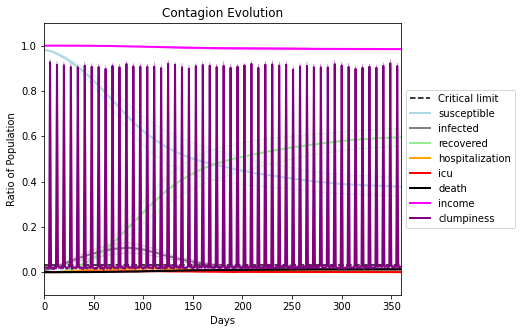

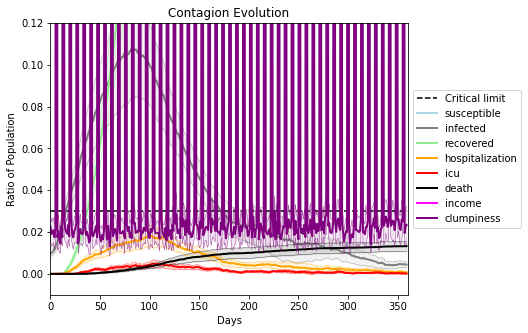

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 100
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 20,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 10, home_grid_width = 10, school_home_list = 
             [
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0)],
[(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9)],
[(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5)],
[(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],work_home_list = 
             
[
[(0,0),(0,1),(0,2),(0,3),(0,4),
(1,0),(1,1),(1,2),(1,3),(1,4),
(2,0),(2,1),(2,2),(2,3),(2,4),
(3,0),(3,1),
(4,0),(4,1),
(5,0),(5,1),
(6,0),(6,1),
(7,0),(7,1),
(8,0),(8,1),
(9,0),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,5),(1,6),(1,7),(1,8),(1,9),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,9),
(4,9),
(5,6),(5,7),(5,8),(5,9),
(6,6),(6,7),(6,8),(6,9),
(3,2),(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),
(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),
(5,2),(5,3),(5,4),(5,5),
(6,2),(6,3),(6,4),(6,5),
(7,2),(7,3),(7,4),(7,5),(7,6),(7,7),(7,8),(7,9),
(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),
(9,1),(9,2),(9,3),(9,4),(9,5),(9,6),(9,7),(9,8),(9,9)]
],listeners = listeners)